In [1]:
# These are the stim times for calcium traces (different from stim times for whole video)
import pandas as pd
import numpy as np
fps = 15.49/3
stim_times = pd.read_csv("stim_times_calcium_traces.csv")
stim_times = stim_times.drop(columns = "Unnamed: 0")
print(stim_times) 

     animal  s   stimulus  index  value
0         6  1      shock      0    277
1         6  1      shock      1    500
2         6  1      shock      2    835
3         6  1      shock      3    947
4         6  1      shock      4   1170
..      ... ..        ...    ...    ...
625      12  3  laserCTRL      5   4912
626      12  3  laserCTRL      6   5428
627      12  3  laserCTRL      7   5662
628      12  3  laserCTRL      8   6223
629      12  3  laserCTRL      9   7279

[630 rows x 5 columns]


In [2]:
traces_all = pd.read_csv("calcium_traces_all.csv")
traces_all = traces_all.drop(columns = "Unnamed: 0")
print(traces_all)

traces_stimulus = pd.read_csv("traces_stimulus_intervals_all.csv")
traces_stimulus = traces_stimulus.drop(columns = "Unnamed: 0")
print(traces_stimulus)

traces_stimulus_reordered = pd.read_csv("traces_stimulus_reordered_all.csv")
traces_stimulus_reordered = traces_stimulus_reordered.drop(columns = 'Unnamed: 0')
print(traces_stimulus_reordered)

traces_average = pd.read_csv("traces_average_batch1.csv", index_col = False)
traces_average = traces_average.drop(columns = 'Unnamed: 0')
print(traces_average)

traces_normalized = pd.read_csv("traces_normalized_batch1.csv")
traces_normalized = traces_normalized.drop(columns = 'Unnamed: 0')
print(traces_normalized)

traces_average_normalized = pd.read_csv("traces_average_normalized_batch1.csv")
traces_average_normalized = traces_average_normalized.drop(columns = 'Unnamed: 0')
print(traces_average_normalized)

       animal  s            0            1            2            3  \
0           6  1  4114.841896  5607.701966  8494.582906  1401.381623   
1           6  1  4114.841896  5607.701966  8180.927474  1401.381623   
2           6  1  4114.841896  5607.701966  9428.633285  1401.381623   
3           6  1  4114.841896  5607.701966  8980.097256  1401.381623   
4           6  1  4114.841896  5607.701966  8596.331527  1401.381623   
...       ... ..          ...          ...          ...          ...   
84289      12  3  2404.463864  3054.449810  5020.127681  4878.540746   
84290      12  3  2404.463864  3054.448868  4775.944319  4686.962164   
84291      12  3  2404.463864  3054.448113  4563.478406  4519.046290   
84292      12  3  2404.463864  3054.447359  4378.610935  4371.870934   
84293      12  3  2404.463864  3054.446793  4217.756581  4242.873975   

                  4            5             6             7  ...  608  609  \
0       9942.774702  3303.965932  10770.819952   5830.08

       animal  s          0             1            2            3  \
0           6  1 -46.163353  -8501.272362  2043.236604  3492.525481   
1           6  1 -49.454437 -10095.645769  1620.974983  2585.496385   
2           6  1 -52.313133  -8357.807019  1259.689325  2458.866429   
3           6  1 -54.796089  -9966.686544   950.574834  1665.321056   
4           6  1 -56.953233 -11412.887071   686.098347   958.897418   
...       ... ..        ...           ...          ...          ...   
32125      12  3   0.000000     25.397819  -717.189044  -295.271794   
32126      12  3   0.000000     21.656442  -717.710426   194.303025   
32127      12  3   0.000000     18.331257  -718.163972   131.041181   
32128      12  3   0.000000     15.375871  -718.558698    75.593300   
32129      12  3   0.000000     12.749176  -718.902188    26.994253   

                 4            5            6            7  ...  611  612  613  \
0      1143.641228 -1675.202037 -1267.619338 -1156.362584  ...  Na

In [3]:
# Reading significant neurons files
# Already check the values are correct (imported from matlab files)
#for animall in ["6","11","12"]:
#    for s in ["1","2","3"]:
#        neurons_sig = pd.DataFrame(columns = ["shock","shockCTRL","laserHI","laserLO","laserCTRL","all"], index = range(0,300))
#        neurons_over = pd.read_csv("sig_neurons/animal" + animall + "_s" + s + "_over_neurons.csv")
#        for stim in ["shock","shockCTRL","laserHI","laserLO","laserCTRL","all"]:
#            neurons_temp = pd.read_csv("sig_neurons/animal" + animall + "_s" + s + "_neurons_" + stim + ".csv")
#            neurons_sig[stim] = pd.Series(neurons_temp.columns.tolist())
#        for stim in neurons_over.columns:
#            neurons_sig[stim] = pd.Series(neurons_over[stim])
#        neurons_sig = neurons_sig.dropna(axis = 0, how = "all")
#        neurons_sig.to_csv("animal" + animall + "_s" + s + "_neurons_significant.csv")
neurons_sig = pd.read_csv("animal11_s2_neurons_significant.csv", index_col = 0)    
print(neurons_sig)


    shock  shockCTRL  laserHI  laserLO  laserCTRL  all  shockOVERctrl  \
0    13.0       79.0      1.0      1.0        1.0    1           20.0   
1    20.0      159.0      3.0      2.0        7.0    2           24.0   
2    24.0        NaN      4.0      7.0       23.0    3           53.0   
3    25.0        NaN      7.0     24.0       25.0    4           58.0   
4    26.0        NaN      8.0     27.0       27.0    7           78.0   
..    ...        ...      ...      ...        ...  ...            ...   
77    NaN        NaN      NaN      NaN        NaN  167            NaN   
78    NaN        NaN      NaN      NaN        NaN  168            NaN   
79    NaN        NaN      NaN      NaN        NaN  169            NaN   
80    NaN        NaN      NaN      NaN        NaN  170            NaN   
81    NaN        NaN      NaN      NaN        NaN  172            NaN   

    laserHIOVERctrl  ctrlOVERshock  ctrlOVERlaserHI  
0               1.0           66.0            169.0  
1              

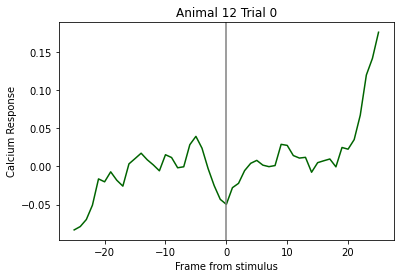

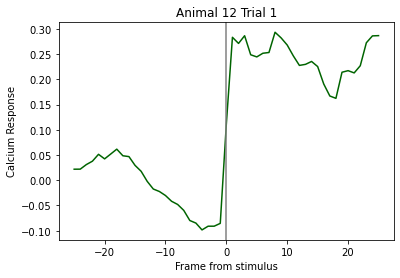

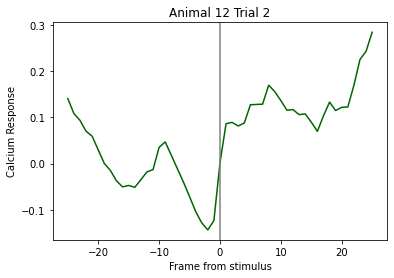

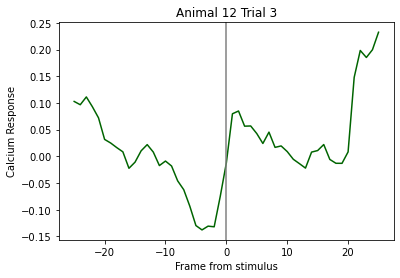

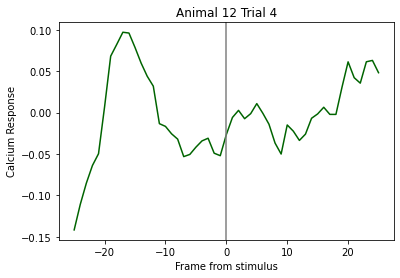

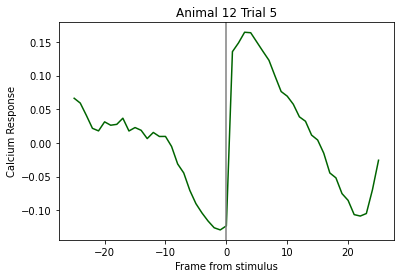

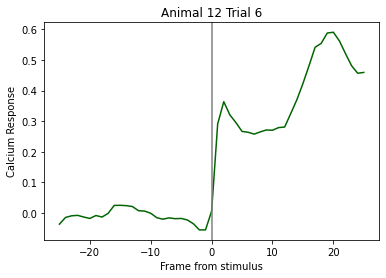

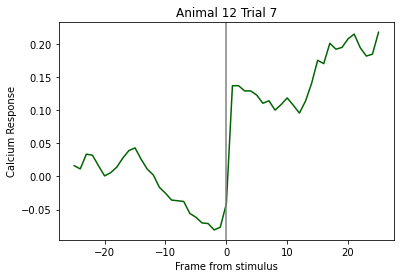

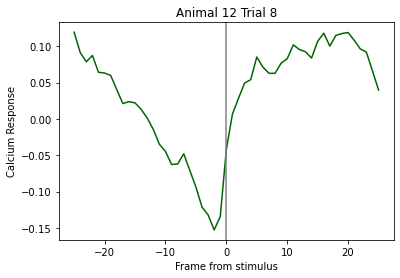

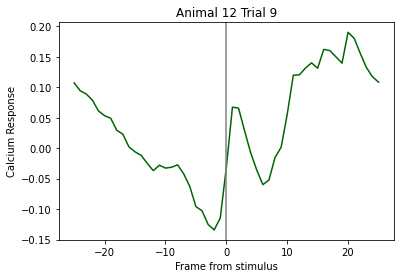

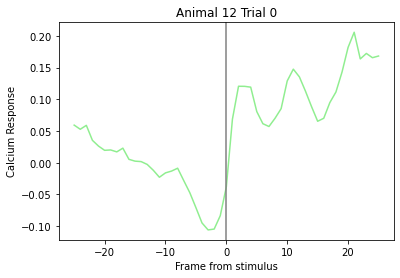

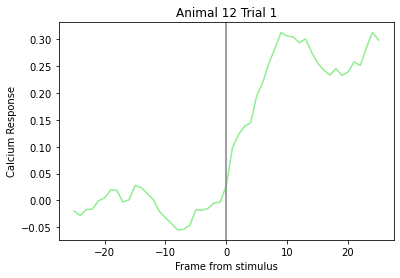

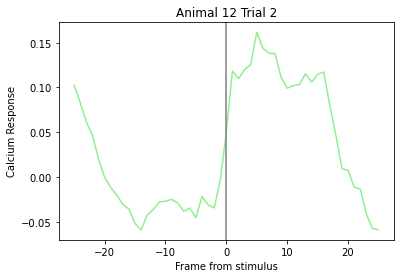

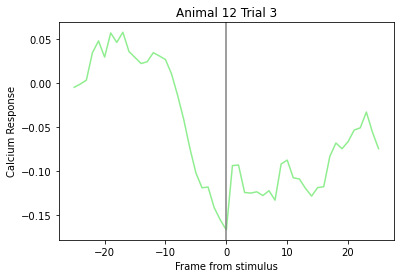

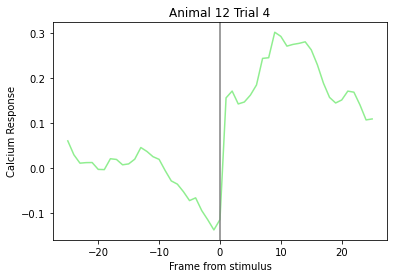

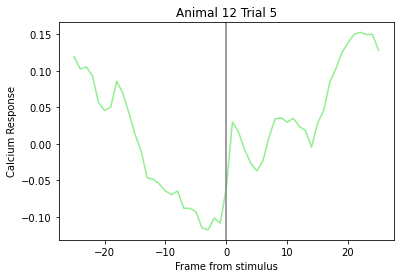

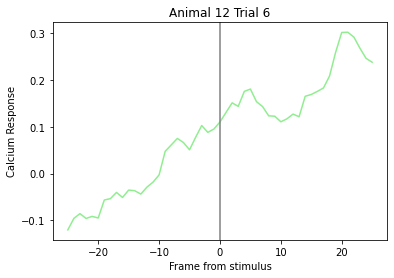

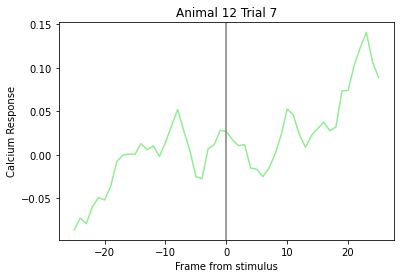

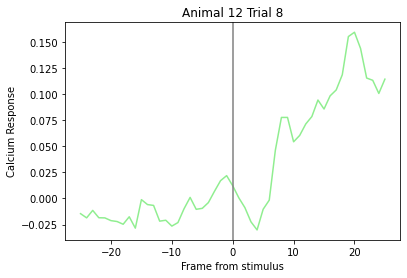

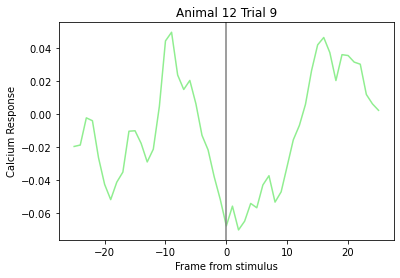

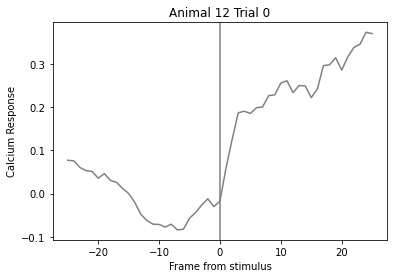

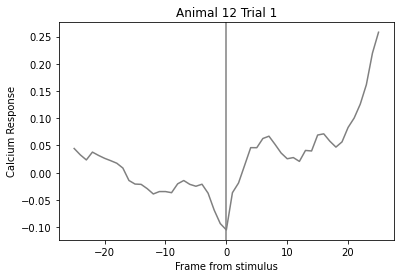

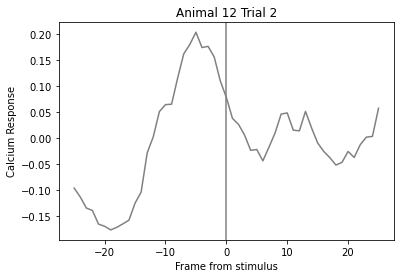

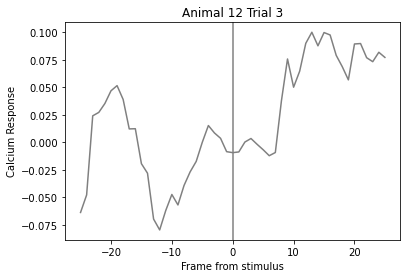

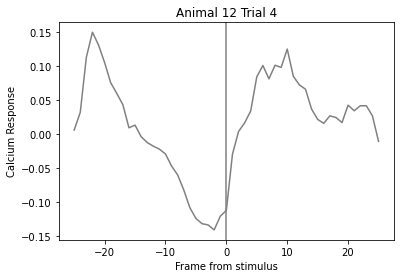

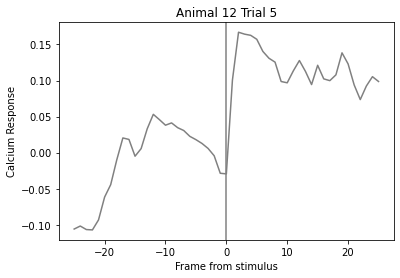

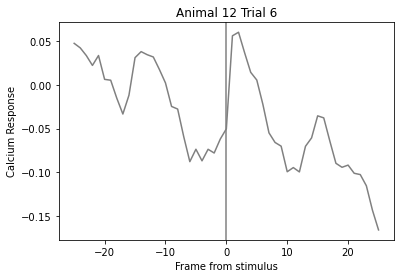

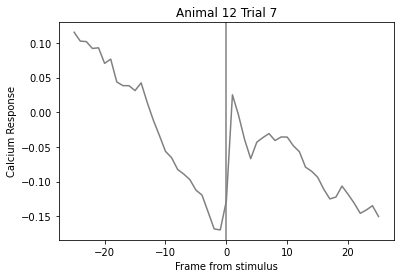

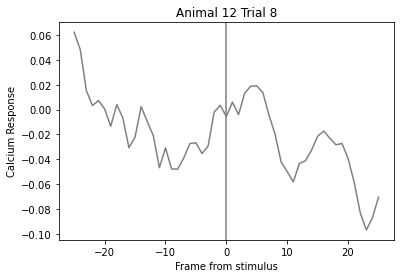

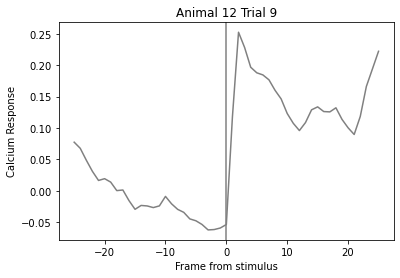

In [4]:
# plotting trials of laserHI significant neurons
import matplotlib.pyplot as plt
colors = {'baseline':'dodgerblue','laserHI': 'darkgreen', 'laserLO': 'lightgreen', 'laserCTRL': 'gray','shock':'red', 'shockCTRL': 'orange',
         'squeak' : 'purple', 'squeakCTRL': 'pink'}
def laserHI_significant_trials_visualisation(animall, typee):
    
    animal = pd.DataFrame()
    if(typee == "none"):
        for s in ["1","2","3"]:
            neurons_sig = pd.read_csv("animal" + animall + "_s" + s + "_neurons_significant.csv", index_col = 0)
            stemp = traces_stimulus_reordered[traces_stimulus_reordered['animal'] == int(animall)] 
            stemp = stemp[stemp['s'] == int(s)]
            stemp = stemp.dropna(axis='columns')
            stimm = stemp.loc[:,"stimulus"].tolist()
            stemp = stemp.drop(columns = ['animal','s',"stimulus","baseline","index"])
            keeping = neurons_sig.loc[:,"laserHI"].tolist()
            keeping = [x for x in keeping if x != np.nan and str(x) != 'nan']
            keeping = [str(int(x)) for x in keeping]
            dropping = list(set(stemp.columns).difference(keeping))
            dropping = [str(x) for x in dropping]
            for elem in dropping:
                stemp = stemp.drop(columns = [elem])
            stemp = stemp.add_suffix('.s' + s)
            stemp = stemp.reset_index(drop=True)
            animal = pd.concat([animal,stemp], axis = 1)
            
    elif(typee == "normalized"):
        for s in ["1","2","3"]:
            neurons_sig = pd.read_csv("animal" + animall + "_s" + s + "_neurons_significant.csv", index_col = 0)
            stemp = traces_normalized[traces_normalized['animal'] == int(animall)] 
            stemp = stemp[stemp['s'] == int(s)]
            stemp = stemp.dropna(axis='columns')
            stimm = stemp.loc[:,"stimulus"].tolist()
            stemp = stemp.drop(columns = ['animal','s',"stimulus","baseline","index"])
            keeping = neurons_sig.loc[:,"laserHI"].tolist()
            keeping = [x for x in keeping if x != np.nan and str(x) != 'nan']
            keeping = [str(int(x)) for x in keeping]
            dropping = list(set(stemp.columns).difference(keeping))
            dropping = [str(x) for x in dropping]
            for elem in dropping:
                stemp = stemp.drop(columns = [elem])
            stemp = stemp.add_suffix('.s' + s)
            stemp = stemp.reset_index(drop=True)
            animal = pd.concat([animal,stemp], axis = 1)
            
    from sklearn.preprocessing import StandardScaler
    scaled = StandardScaler().fit_transform(animal)
    animal_scaled = pd.DataFrame(scaled, columns = animal.columns)
    animal_scaled['stimulus'] = pd.Series(stimm) 
    
    temp1 = animal_scaled[animal_scaled['stimulus'] == 'laserHI']
    temp2 = animal_scaled[animal_scaled['stimulus'] == 'laserLO']
    temp3 = animal_scaled[animal_scaled['stimulus'] == 'laserCTRL']
    temp1 = temp1.reset_index(drop = True)
    temp2 = temp2.reset_index(drop = True)
    temp3 = temp3.reset_index(drop = True)
    temp1 = temp1.drop(columns = "stimulus")
    temp2 = temp2.drop(columns = "stimulus")
    temp3 = temp3.drop(columns = "stimulus")
    
    avg1 = pd.DataFrame(temp1.mean(axis = 1))
    avg2 = pd.DataFrame(temp2.mean(axis = 1))
    avg3 = pd.DataFrame(temp3.mean(axis = 1))
    values = pd.DataFrame(index = range(0,10), columns = ["laserHI","laserLO","laserCTRL"])
    for trial in [0,1,2,3,4,5,6,7,8,9]:
        plt.title("Animal " + animall + " Trial " + str(trial))
        plt.plot(range(-25,26), avg1.iloc[51*trial:51*trial+51,0], color = colors.get("laserHI"))
        plt.axvline(0, color = "gray")
        plt.ylabel("Calcium Response")
        plt.xlabel("Frame from stimulus")
        plt.show()
        #Looking at average in interval of 10 frames (1sec)
        #print(avg1.iloc[51*trial+start:51*trial+stop,0].mean())
        
    for trial in [0,1,2,3,4,5,6,7,8,9]:
        plt.title("Animal " + animall + " Trial " + str(trial))
        plt.plot(range(-25,26), avg2.iloc[51*trial:51*trial+51,0], color = colors.get("laserLO"))
        plt.axvline(0, color = "gray")
        plt.ylabel("Calcium Response")
        plt.xlabel("Frame from stimulus")
        plt.show()
        #Looking at average in interval of 10 frames (1sec)
        #print(avg2.iloc[51*trial+start:51*trial+stop].mean())
        
    for trial in [0,1,2,3,4,5,6,7,8,9]:
        plt.title("Animal " + animall + " Trial " + str(trial))
        plt.plot(range(-25,26), avg3.iloc[51*trial:51*trial+51,0], color = colors.get("laserCTRL"))
        plt.axvline(0, color = "gray")
        plt.ylabel("Calcium Response")
        plt.xlabel("Frame from stimulus")
        plt.show()
        #Looking at average in interval of 10 frames (1sec)
        #print(avg3.iloc[51*trial+start:51*trial+stop,0].mean())
        

laserHI_significant_trials_visualisation("12","normalized")

    
# do standard deviation and average across all trials (possibly to have one value per stimuli for PLSR)
    

In [5]:
# plotting trials of laserHI significant neurons
import matplotlib.pyplot as plt
colors = {'baseline':'dodgerblue','laserHI': 'darkgreen', 'laserLO': 'lightgreen', 'laserCTRL': 'gray','shock':'red', 'shockCTRL': 'orange',
         'squeak' : 'purple', 'squeakCTRL': 'pink'}
def laserHI_significant_trials_values(animall, typee, start, stop):
    
    animal = pd.DataFrame()
    if(typee == "none"):
        for s in ["1","2","3"]:
            neurons_sig = pd.read_csv("animal" + animall + "_s" + s + "_neurons_significant.csv", index_col = 0)
            stemp = traces_stimulus_reordered[traces_stimulus_reordered['animal'] == int(animall)] 
            stemp = stemp[stemp['s'] == int(s)]
            stemp = stemp.dropna(axis='columns')
            stimm = stemp.loc[:,"stimulus"].tolist()
            stemp = stemp.drop(columns = ['animal','s',"stimulus","baseline","index"])
            keeping = neurons_sig.loc[:,"laserHI"].tolist()
            keeping = [x for x in keeping if x != np.nan and str(x) != 'nan']
            keeping = [str(int(x)) for x in keeping]
            dropping = list(set(stemp.columns).difference(keeping))
            dropping = [str(x) for x in dropping]
            for elem in dropping:
                stemp = stemp.drop(columns = [elem])
            stemp = stemp.add_suffix('.s' + s)
            stemp = stemp.reset_index(drop=True)
            animal = pd.concat([animal,stemp], axis = 1)
            
    elif(typee == "normalized"):
        for s in ["1","2","3"]:
            neurons_sig = pd.read_csv("animal" + animall + "_s" + s + "_neurons_significant.csv", index_col = 0)
            stemp = traces_normalized[traces_normalized['animal'] == int(animall)] 
            stemp = stemp[stemp['s'] == int(s)]
            stemp = stemp.dropna(axis='columns')
            stimm = stemp.loc[:,"stimulus"].tolist()
            stemp = stemp.drop(columns = ['animal','s',"stimulus","baseline","index"])
            keeping = neurons_sig.loc[:,"laserHI"].tolist()
            keeping = [x for x in keeping if x != np.nan and str(x) != 'nan']
            keeping = [str(int(x)) for x in keeping]
            dropping = list(set(stemp.columns).difference(keeping))
            dropping = [str(x) for x in dropping]
            for elem in dropping:
                stemp = stemp.drop(columns = [elem])
            stemp = stemp.add_suffix('.s' + s)
            stemp = stemp.reset_index(drop=True)
            animal = pd.concat([animal,stemp], axis = 1)
            
    from sklearn.preprocessing import StandardScaler
    scaled = StandardScaler().fit_transform(animal)
    animal_scaled = pd.DataFrame(scaled, columns = animal.columns)
    animal_scaled['stimulus'] = pd.Series(stimm) 
    
    temp1 = animal_scaled[animal_scaled['stimulus'] == 'laserHI']
    temp2 = animal_scaled[animal_scaled['stimulus'] == 'laserLO']
    temp3 = animal_scaled[animal_scaled['stimulus'] == 'laserCTRL']
    temp1 = temp1.reset_index(drop = True)
    temp2 = temp2.reset_index(drop = True)
    temp3 = temp3.reset_index(drop = True)
    temp1 = temp1.drop(columns = "stimulus")
    temp2 = temp2.drop(columns = "stimulus")
    temp3 = temp3.drop(columns = "stimulus")
    
    avg1 = pd.DataFrame(temp1.mean(axis = 1))
    avg2 = pd.DataFrame(temp2.mean(axis = 1))
    avg3 = pd.DataFrame(temp3.mean(axis = 1))
    values = pd.DataFrame(index = range(0,10), columns = ["laserHI","laserLO","laserCTRL"])
    for trial in [0,1,2,3,4,5,6,7,8,9]:
        values.at[trial,"laserHI"] = avg1.iloc[51*trial+start:51*trial+stop,0].mean()
        
    for trial in [0,1,2,3,4,5,6,7,8,9]:
        values.at[trial,"laserLO"] = avg2.iloc[51*trial+start:51*trial+stop,0].mean()
     
    for trial in [0,1,2,3,4,5,6,7,8,9]:
        values.at[trial,"laserCTRL"] = avg3.iloc[51*trial+start:51*trial+stop,0].mean()
        
    listt = values.to_numpy().flatten().tolist()
    values = (values-min(listt))
    listt = values.to_numpy().flatten().tolist()
    values = values/max(listt)
    values = values.round(2)
    for row in values.index:
        for col in values.columns:
            values.at[row,col] = round(values.at[row,col],1)

            
    return values
        

laserHI_significant_trials_values("6","normalized", 45, 50)

    
# do standard deviation and average across all trials (possibly to have one value per stimuli for PLSR)
    

laserHI laserLO laserCTRL
0     0.4     0.5       0.5
1     0.3     0.5       0.3
2     0.8     0.6       0.4
3     0.7     0.8         0
4     0.8     0.5       0.6
5       1     0.4       0.5
6     0.6     0.2       0.7
7     0.3     0.3       0.4
8     0.6     0.2       0.1
9     0.7     0.3       0.1

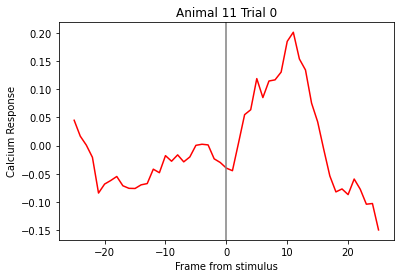

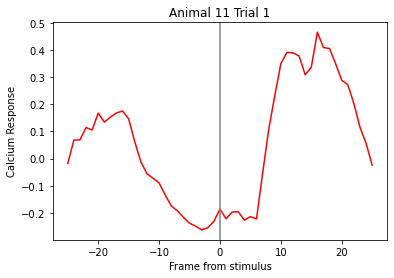

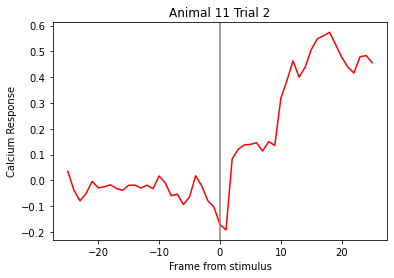

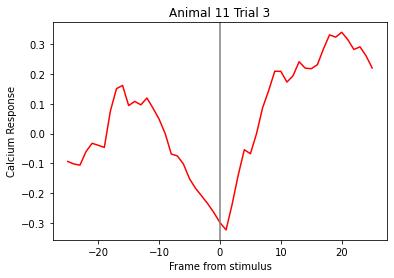

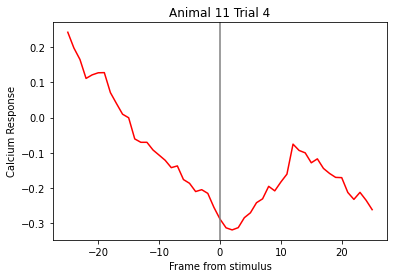

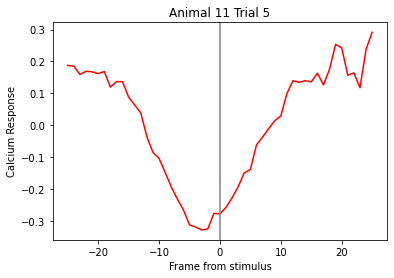

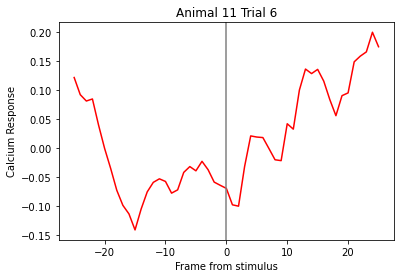

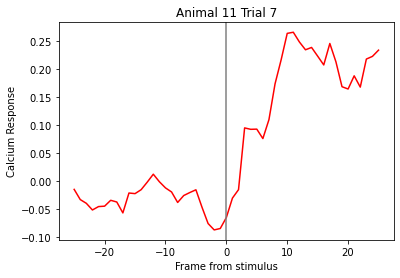

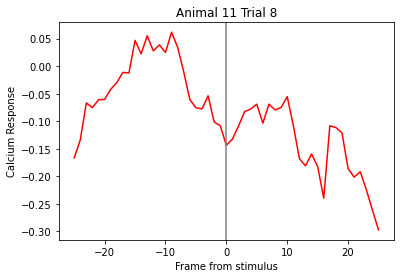

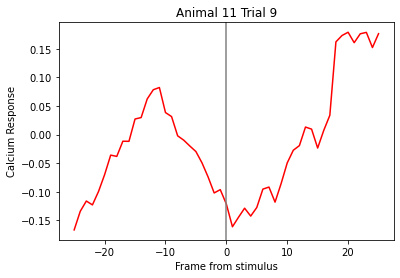

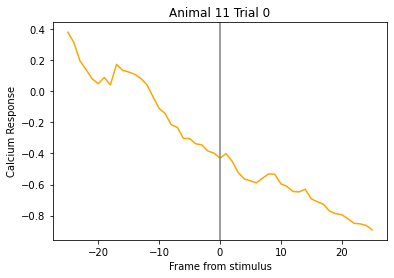

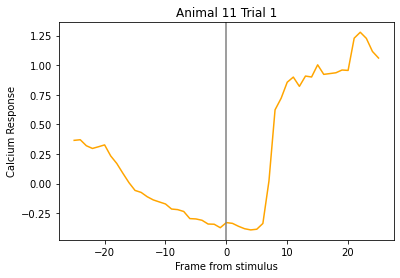

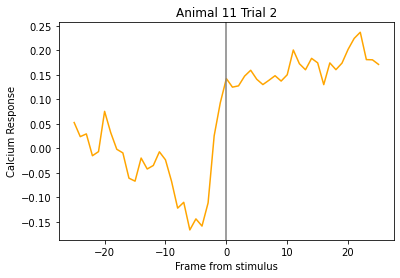

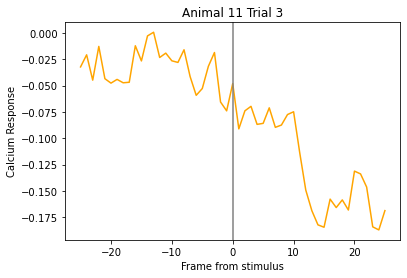

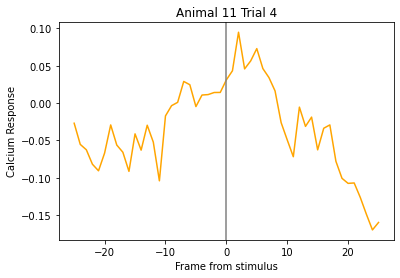

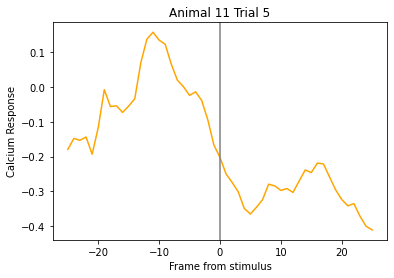

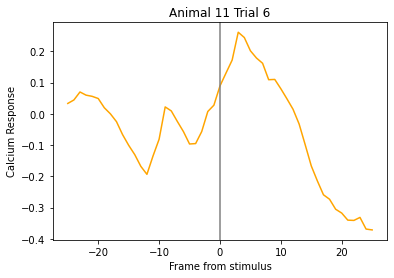

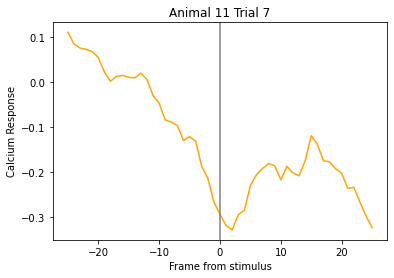

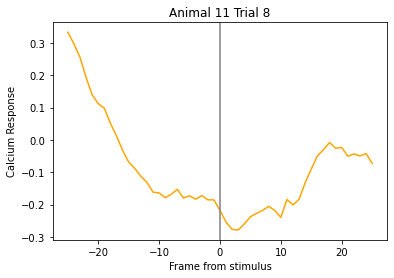

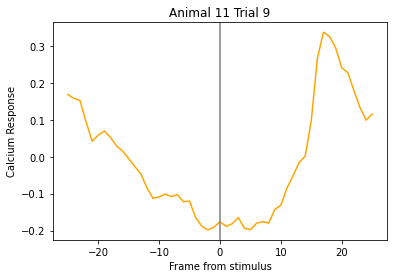

In [6]:
# plotting trials of laserHI significant neurons
def shock_significant_trials_visualisation(animall, typee):
    
    animal = pd.DataFrame()
    if(typee == "none"):
        for s in ["1","2","3"]:
            neurons_sig = pd.read_csv("animal" + animall + "_s" + s + "_neurons_significant.csv", index_col = 0)
            stemp = traces_stimulus_reordered[traces_stimulus_reordered['animal'] == int(animall)] 
            stemp = stemp[stemp['s'] == int(s)]
            stemp = stemp.dropna(axis='columns')
            stimm = stemp.loc[:,"stimulus"].tolist()
            stemp = stemp.drop(columns = ['animal','s',"stimulus","baseline","index"])
            keeping = neurons_sig.loc[:,"shock"].tolist()
            keeping = [x for x in keeping if x != np.nan and str(x) != 'nan']
            keeping = [str(int(x)) for x in keeping]
            dropping = list(set(stemp.columns).difference(keeping))
            dropping = [str(x) for x in dropping]
            for elem in dropping:
                stemp = stemp.drop(columns = [elem])
            stemp = stemp.add_suffix('.s' + s)
            stemp = stemp.reset_index(drop=True)
            animal = pd.concat([animal,stemp], axis = 1)
            
    elif(typee == "normalized"):
        for s in ["1","2","3"]:
            neurons_sig = pd.read_csv("animal" + animall + "_s" + s + "_neurons_significant.csv", index_col = 0)
            stemp = traces_normalized[traces_normalized['animal'] == int(animall)] 
            stemp = stemp[stemp['s'] == int(s)]
            stemp = stemp.dropna(axis='columns')
            stimm = stemp.loc[:,"stimulus"].tolist()
            stemp = stemp.drop(columns = ['animal','s',"stimulus","baseline","index"])
            keeping = neurons_sig.loc[:,"shock"].tolist()
            keeping = [x for x in keeping if x != np.nan and str(x) != 'nan']
            keeping = [str(int(x)) for x in keeping]
            dropping = list(set(stemp.columns).difference(keeping))
            dropping = [str(x) for x in dropping]
            for elem in dropping:
                stemp = stemp.drop(columns = [elem])
            stemp = stemp.add_suffix('.s' + s)
            stemp = stemp.reset_index(drop=True)
            animal = pd.concat([animal,stemp], axis = 1)
    
    from sklearn.preprocessing import StandardScaler
    scaled = StandardScaler().fit_transform(animal)
    animal_scaled = pd.DataFrame(scaled, columns = animal.columns)
    animal_scaled['stimulus'] = pd.Series(stimm) 
    
    temp1 = animal_scaled[animal_scaled['stimulus'] == 'shock']
    temp2 = animal_scaled[animal_scaled['stimulus'] == 'shockCTRL']
    temp1 = temp1.reset_index(drop = True)
    temp2 = temp2.reset_index(drop = True)
    temp1 = temp1.drop(columns = "stimulus")
    temp2 = temp2.drop(columns = "stimulus")
    avg1 = pd.DataFrame(temp1.mean(axis = 1))
    avg2 = pd.DataFrame(temp2.mean(axis = 1))
    
    for trial in [0,1,2,3,4,5,6,7,8,9]:
        plt.title("Animal " + animall + " Trial " + str(trial))
        plt.plot(range(-25,26), avg1.iloc[51*trial:51*trial+51,0], color = colors.get("shock"))
        plt.axvline(0, color = "gray")
        plt.ylabel("Calcium Response")
        plt.xlabel("Frame from stimulus")
        plt.show()
        
    for trial in [0,1,2,3,4,5,6,7,8,9]:
        plt.title("Animal " + animall + " Trial " + str(trial))
        plt.plot(range(-25,26), avg2.iloc[51*trial:51*trial+51,0], color = colors.get("shockCTRL"))
        plt.axvline(0, color = "gray")
        plt.ylabel("Calcium Response")
        plt.xlabel("Frame from stimulus")
        plt.show()
        
        
shock_significant_trials_visualisation("11","normalized")

    
# do standard deviation and average across all trials (possibly to have one value per stimuli for PLSR)
    

In [7]:
def shock_significant_trials_values(animall, typee, start, stop):
    
    animal = pd.DataFrame()
    if(typee == "none"):
        for s in ["1","2","3"]:
            neurons_sig = pd.read_csv("animal" + animall + "_s" + s + "_neurons_significant.csv", index_col = 0)
            stemp = traces_stimulus_reordered[traces_stimulus_reordered['animal'] == int(animall)] 
            stemp = stemp[stemp['s'] == int(s)]
            stemp = stemp.dropna(axis='columns')
            stimm = stemp.loc[:,"stimulus"].tolist()
            stemp = stemp.drop(columns = ['animal','s',"stimulus","baseline","index"])
            keeping = neurons_sig.loc[:,"shock"].tolist()
            keeping = [x for x in keeping if x != np.nan and str(x) != 'nan']
            keeping = [str(int(x)) for x in keeping]
            dropping = list(set(stemp.columns).difference(keeping))
            dropping = [str(x) for x in dropping]
            for elem in dropping:
                stemp = stemp.drop(columns = [elem])
            stemp = stemp.add_suffix('.s' + s)
            stemp = stemp.reset_index(drop=True)
            animal = pd.concat([animal,stemp], axis = 1)
            
    elif(typee == "normalized"):
        for s in ["1","2","3"]:
            neurons_sig = pd.read_csv("animal" + animall + "_s" + s + "_neurons_significant.csv", index_col = 0)
            stemp = traces_normalized[traces_normalized['animal'] == int(animall)] 
            stemp = stemp[stemp['s'] == int(s)]
            stemp = stemp.dropna(axis='columns')
            stimm = stemp.loc[:,"stimulus"].tolist()
            stemp = stemp.drop(columns = ['animal','s',"stimulus","baseline","index"])
            keeping = neurons_sig.loc[:,"shock"].tolist()
            keeping = [x for x in keeping if x != np.nan and str(x) != 'nan']
            keeping = [str(int(x)) for x in keeping]
            dropping = list(set(stemp.columns).difference(keeping))
            dropping = [str(x) for x in dropping]
            for elem in dropping:
                stemp = stemp.drop(columns = [elem])
            stemp = stemp.add_suffix('.s' + s)
            stemp = stemp.reset_index(drop=True)
            animal = pd.concat([animal,stemp], axis = 1)
            
    from sklearn.preprocessing import StandardScaler
    scaled = StandardScaler().fit_transform(animal)
    animal_scaled = pd.DataFrame(scaled, columns = animal.columns)
    animal_scaled['stimulus'] = pd.Series(stimm) 
    
    temp1 = animal_scaled[animal_scaled['stimulus'] == 'shock']
    temp2 = animal_scaled[animal_scaled['stimulus'] == 'shockCTRL']
    temp1 = temp1.reset_index(drop = True)
    temp2 = temp2.reset_index(drop = True)
    temp1 = temp1.drop(columns = "stimulus")
    temp2 = temp2.drop(columns = "stimulus")
    
    avg1 = pd.DataFrame(temp1.mean(axis = 1))
    avg2 = pd.DataFrame(temp2.mean(axis = 1))
    values = pd.DataFrame(index = range(0,10), columns = ["shock","shockCTRL"])
    for trial in [0,1,2,3,4,5,6,7,8,9]:
        values.at[trial,"shock"] = avg1.iloc[51*trial+start:51*trial+stop,0].mean()

    for trial in [0,1,2,3,4,5,6,7,8,9]:
        values.at[trial,"shockCTRL"] = avg2.iloc[51*trial+start:51*trial+stop,0].mean()
        
    listt = values.to_numpy().flatten().tolist()
    values = (values-min(listt))
    listt = values.to_numpy().flatten().tolist()
    values = values/max(listt)
    values = values.round(2)
    for row in values.index:
        for col in values.columns:
            values.at[row,col] = round(values.at[row,col],1)

            
    return values
        

shock_significant_trials_values("6","normalized", 30, 50)



shock shockCTRL
0     0         1
1   0.4       0.7
2   0.1       0.9
3   0.3       0.2
4   0.6       0.3
5     1       0.3
6   0.2       0.4
7   0.4       0.9
8   0.1       0.5
9   0.4       0.1

In [8]:
# k should be 4 (Christian)
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.model_selection import cross_val_predict, cross_val_score, KFold, permutation_test_score
from scipy.stats import pearsonr
import random
def my_kfold_plsr(X_model, y, k, n_components):
    
    kf = KFold(n_splits = k, random_state = 1, shuffle = True)
    kf.get_n_splits(X_model)
    r_repeated = []
    for train_index, test_index in kf.split(X_model):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X_model[train_index], X_model[test_index]
        y_train, y_test = y[train_index], y[test_index]
        pls = PLSRegression(n_components=n_components) 
        pls.fit(X_train,y_train)
        y_predicted = pls.predict(X_test)
        r,_ = pearsonr(y_predicted.flatten(),y_test.flatten())
        r_repeated.append(r)
    r_repeated = [x for x in r_repeated if str(x) != 'nan' and x != np.nan]
    # dropping nan values from r_repeated - happends when an input of pearson r is a constant array
    if(len(r_repeated) > 0):
        r_averaged = sum(r_repeated)/len(r_repeated)
    else:
        r_averaged = np.nan
    
    return r_averaged, r_repeated

def my_kfold_plsr_weights(X_model, y, k, n_components):
    
    kf = KFold(n_splits = k, random_state = 1, shuffle = True)
    weights_0 = []
    weights_1 = []
    weights_2 = []
    kf.get_n_splits(X_model)
    r_repeated = []
    for train_index, test_index in kf.split(X_model):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X_model[train_index], X_model[test_index]
        y_train, y_test = y[train_index], y[test_index]
        pls = PLSRegression(n_components=n_components) 
        pls.fit(X_train,y_train)
        y_predicted = pls.predict(X_test)
        r,_ = pearsonr(y_predicted.flatten(),y_test.flatten())
        r_repeated.append(r)
        w = pls.x_weights_
        weights_0 = weights_0 + w[:,0].tolist()
        weights_1 = weights_1 + w[:,1].tolist()
        weights_2 = weights_2 + w[:,2].tolist()
    
    return weights_0,weights_1,weights_2



def my_permutation_plsr(X_model, y, k, n_components, n_permutations):
    
    r_averaged,_ = my_kfold_plsr(X_model,y,k,n_components)
    
    r_permuted = []
    y_list = y.flatten().tolist()
    for permut in range(0,n_permutations):
        
        random.shuffle(y_list)
        y_perm = np.asarray(y_list)
        y_perm = y_perm.reshape((len(y_list),1))
        
        r,_ = my_kfold_plsr(X_model,y_perm,k,n_components)
        
        if(r_averaged != np.nan):
            r_permuted.append(r)
        
    #Calculating p value
    bad = [i for i in r_permuted if i >= r_averaged]
    p = len(bad)/len(r_permuted) 
    return r_permuted, p
    

In [9]:
def animal_none(animall):

    s1 = traces_stimulus_reordered[traces_stimulus_reordered['animal'] == animall] 
    s1 = s1[s1['s'] == 1]
    s1 = s1.dropna(axis='columns')
    s1 = s1.drop(columns = ['animal','s'])
    s1 = s1.add_suffix('.s1')
    s1 = s1.reset_index(drop=True)

    s2 = traces_stimulus_reordered[traces_stimulus_reordered['animal'] == animall] 
    s2 = s2[s2['s'] == 2]
    s2 = s2.dropna(axis='columns')
    s2 = s2.drop(columns = ['animal','s'])
    s2 = s2.add_suffix('.s2')
    s2 = s2.reset_index(drop=True)

    s3 = traces_stimulus_reordered[traces_stimulus_reordered['animal'] == animall] 
    s3 = s3[s3['s'] == 3]
    s3 = s3.dropna(axis='columns')
    s3 = s3.drop(columns = ['animal','s'])
    s3 = s3.add_suffix('.s3')
    s3 = s3.reset_index(drop=True)

    animal = pd.concat([s1,s2], axis = 1)
    animal = pd.concat([animal,s3], axis = 1)
    stim = list(animal['stimulus.s1'])
    animal = animal.drop(columns=['index.s1','index.s2','index.s3','stimulus.s1','stimulus.s2','stimulus.s3','baseline.s1','baseline.s2','baseline.s3'])
    animal['stimulus'] = pd.Series(stim)
    
    return animal

animal_none(1)


# subtracting baseline for each trial - NOT in chronological order
def animal_normalized(animall):

    s1 = traces_normalized[traces_normalized['animal'] == animall] 
    s1 = s1[s1['s'] == 1]
    s1 = s1.dropna(axis='columns')
    s1 = s1.drop(columns = ['animal','s'])
    s1 = s1.add_suffix('.s1')
    s1 = s1.reset_index(drop=True)

    s2 = traces_normalized[traces_normalized['animal'] == animall] 
    s2 = s2[s2['s'] == 2]
    s2 = s2.dropna(axis='columns')
    s2 = s2.drop(columns = ['animal','s'])
    s2 = s2.add_suffix('.s2')
    s2 = s2.reset_index(drop=True)

    s3 = traces_normalized[traces_normalized['animal'] == animall] 
    s3 = s3[s3['s'] == 3]
    s3 = s3.dropna(axis='columns')
    s3 = s3.drop(columns = ['animal','s'])
    s3 = s3.add_suffix('.s3')
    s3 = s3.reset_index(drop=True)

    animal = pd.concat([s1,s2], axis = 1)
    animal = pd.concat([animal,s3], axis = 1)
    stim = list(animal['stimulus.s1'])
    animal = animal.drop(columns=['index.s1','index.s2','index.s3','stimulus.s1','stimulus.s2','stimulus.s3','baseline.s1','baseline.s2','baseline.s3'])
    animal['stimulus'] = pd.Series(stim)
    
    return animal

animal_normalized(6)

<ipython-input-9-041626d3bb5e>:28: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  animal['stimulus'] = pd.Series(stim)


0.s1          1.s1         2.s1          3.s1         4.s1  \
0       -46.163353  -8501.272362  2043.236604   3492.525481  1143.641228   
1       -49.454437 -10095.645769  1620.974983   2585.496385  1607.268770   
2       -52.313133  -8357.807019  1259.689325   2458.866429  1342.968551   
3       -54.796089  -9966.686544   950.574834   1665.321056  1104.321814   
4       -56.953233 -11412.887071   686.098347    958.897418   888.837628   
...            ...           ...          ...           ...          ...   
3565  -8613.141351 -11645.536959   721.955283  -9269.727411  6040.573965   
3566  -9290.599750 -12686.594934  -149.415385 -10385.058678  5237.049332   
3567 -10308.885602 -13622.389494  -894.956682  -7141.700899  4511.515262   
3568 -11193.382446 -14463.561670 -1532.838214  -7101.331664  6499.035823   
3569 -11961.668124 -15219.680119 -2078.607665  -6134.972853  5651.013659   

              5.s1          6.s1         7.s1          8.s1         9.s1  ...  \
0     -1675.202037  -1267.619338 -1156.362584   2713.957885 -1123.008069  ...   
1     -1688.109993  -1279.471335 -1156.418686   2208.326351 -2308.292862  ...   
2     -1699.264477  -1290.083295 -1156.467470   1766.751320 -3374.530018  ...   
3     -1708.903010  -1299.585021 -1156.509981   1381.118288 -2774.792238  ...   
4     -1717.232202  -1308.092661 -1156.547266   1044.339054 -2927.502149  ...   
...            ...           ...          ...           ...          ...  ...   
3565  44953.457634  14863.207859 -2765.257175  19217.799918  4726.750443  ...   
3566  38711.310648  12967.770241 -2859.710526  21771.312991  3955.740795  ...   
3567  33317.302514  11270.641473 -2942.230630  18348.678302  8662.705846  ...   
3568  28656.187307   9751.072002 -3014.324215  15359.641439  7403.820608  ...   
3569  24628.391076   8390.487570 -3077.309144  12749.272286  6271.375332  ...   

        222.s3    223.s3    224.s3    225.s3    226.s3    227.s3    228.s3  \
0     0.244550  0.009469  0.014616 -0.026325  0.047836  0.177266 -0.173768   
1     0.182346 -0.002658 -0.025908  0.035297 -0.014319  0.059987 -0.080781   
2     0.183658  0.032677 -0.006802 -0.051787  0.019595  0.045763 -0.293387   
3     0.106425 -0.012625  0.020841 -0.067939 -0.048296  0.021666  0.027692   
4     0.030109 -0.067787  0.009845 -0.188570  0.043152 -0.125520 -0.179567   
...        ...       ...       ...       ...       ...       ...       ...   
3565 -0.036353 -0.043702  0.444450 -0.075222  0.135773  1.285932  0.074544   
3566 -0.019708 -0.094887  0.239052 -0.021737  0.047294  1.200944  0.095511   
3567 -0.089389 -0.088636  0.365445 -0.059809  0.044334  1.394701 -0.110240   
3568 -0.003790 -0.033028  0.179329 -0.022036  0.014505  1.144912 -0.052200   
3569 -0.011188  0.086537  0.167323 -0.096404  0.079485  1.030979  0.045266   

        229.s3    230.s3    stimulus  
0    -0.059289  0.103612       shock  
1    -0.081456 -0.020175       shock  
2    -0.067490 -0.082419       shock  
3    -0.079143  0.039555       shock  
4    -0.084761 -0.042177       shock  
...        ...       ...         ...  
3565  0.250674 -0.041250  squeakCTRL  
3566  0.281765  0.006926  squeakCTRL  
3567  0.172339 -0.012497  squeakCTRL  
3568  0.136818 -0.032684  squeakCTRL  
3569  0.244129  0.009712  squeakCTRL  

[3570 rows x 636 columns]

In [10]:
import warnings
warnings.filterwarnings('ignore')
#ignoring warnings because of Pearson Correlation
# adjusted laserCTRL and without laserLO
def PLSR_stimblocks_timepoints_adjusted_laserCTRL(animall, typee, time_point, n_components, n_permutations, k, laserLOincluded, start, stop):
    colors = {'baseline':'dodgerblue','laserHI': 'darkgreen', 'laserLO': 'lightgreen', 'laserCTRL': 'gray','shock':'red', 'shockCTRL': 'orange',
         'squeak' : 'purple', 'squeakCTRL': 'pink'}
    if(typee == 'none'):
        animal = animal_none(animall)
    elif(typee == 'normalized'):
        animal = animal_normalized(animall)
    elif(typee == 'normalized_ratio'):
        animal = animal_normalized_ratio(animall)   
        
    values = laserHI_significant_trials_values(str(animall),typee, start, stop)   
    #print(values)
    
    stim = pd.Series(animal['stimulus'])
    animal = animal.drop(columns = 'stimulus')    
    
    #Mean-Centering happens for time period of all trials from all stimuli
    from sklearn.preprocessing import StandardScaler
    scaled = StandardScaler().fit_transform(animal)
    animal_scaled = pd.DataFrame(scaled, columns = animal.columns)
    animal_scaled['stimulus'] = pd.Series(stim)
    
    if(laserLOincluded == "without"):
        temp1 = animal_scaled[animal_scaled['stimulus'] == 'laserHI']
        temp3 = animal_scaled[animal_scaled['stimulus'] == 'laserCTRL']
        temp1 = temp1.reset_index(drop = True)
        temp3 = temp3.reset_index(drop = True)
        keeping = [time_point + trial*51 for trial in [0,1,2,3,4,5,6,7,8,9]]
        temp1 = temp1.iloc[keeping,:]
        temp3 = temp3.iloc[keeping,:]
        temp = pd.concat([temp1,temp3])
        temp = temp.drop(columns = 'stimulus')
        X_model = np.array(temp)
         #10 trials of laserHI, then 10 of laserCTRL
        y = np.zeros([20,1])
        for trial in [0,1,2,3,4,5,6,7,8,9]:
            y[trial,0] = values.at[trial,"laserHI"]
        for trial in [10,11,12,13,14,15,16,17,18,19]:
            y[trial,0] = values.at[trial-10,"laserCTRL"]
            # maximal distance_baseline   /10 or /20 didnt work well    
            #elif(var == "distance_baseline"):
            #    if(animall == 11):
            #        dist_baseline_max_expr = pd.read_csv("Distance_baseline_maximal_expression_animal11.csv", index_col = 0)
            #    elif(animall == 12):
            #        dist_baseline_max_expr = pd.read_csv("Distance_baseline_maximal_expression_animal12.csv", index_col = 0)
            #    for trial in [0,1,2,3,4,5,6,7,8,9]:
            #        y[trial,0] = 1
            #    for trial in [10,11,12,13,14,15,16,17,18,19]:
            #        y[trial,0] = dist_baseline_max_expr.at[trial-10,"laserCTRL"]/10

        r_averaged, r_repeated = my_kfold_plsr(X_model, y, k, n_components)

        r_permuted, p = my_permutation_plsr(X_model, y, k, n_components, n_permutations)
        
        #print(X_model.shape)
        #print(y)
        return r_averaged, r_permuted, p
    
    elif(laserLOincluded == "with"):
        temp1 = animal_scaled[animal_scaled['stimulus'] == 'laserHI']
        temp2 = animal_scaled[animal_scaled['stimulus'] == 'laserLO']
        temp3 = animal_scaled[animal_scaled['stimulus'] == 'laserCTRL']
        temp1 = temp1.reset_index(drop = True)
        temp2 = temp2.reset_index(drop = True)
        temp3 = temp3.reset_index(drop = True)
        keeping = [time_point + trial*51 for trial in [0,1,2,3,4,5,6,7,8,9]]
        temp1 = temp1.iloc[keeping,:]
        temp2 = temp2.iloc[keeping,:]
        temp3 = temp3.iloc[keeping,:]
        temp = pd.concat([temp1,temp2,temp3])
        temp = temp.drop(columns = 'stimulus')
        X_model = np.array(temp)
         #10 trials of laserHI, then 10 of laserCTRL
        y = np.zeros([30,1])
        for trial in [0,1,2,3,4,5,6,7,8,9]:
            y[trial,0] = values.at[trial,"laserHI"]
        for trial in [10,11,12,13,14,15,16,17,18,19]:
            y[trial,0] = values.at[trial-10,"laserLO"]
        for trial in [20,21,22,23,24,25,26,27,28,29]:
            y[trial,0] = values.at[trial-20,"laserCTRL"]
            # maximal distance_baseline   /10 or /20 didnt work well    
            #elif(var == "distance_baseline"):
            #    if(animall == 11):
            #        dist_baseline_max_expr = pd.read_csv("Distance_baseline_maximal_expression_animal11.csv", index_col = 0)
            #    elif(animall == 12):
            #        dist_baseline_max_expr = pd.read_csv("Distance_baseline_maximal_expression_animal12.csv", index_col = 0)
            #    for trial in [0,1,2,3,4,5,6,7,8,9]:
            #        y[trial,0] = 1
            #    for trial in [10,11,12,13,14,15,16,17,18,19]:
            #        y[trial,0] = dist_baseline_max_expr.at[trial-10,"laserCTRL"]/10

        r_averaged, r_repeated = my_kfold_plsr(X_model, y, k, n_components)

        r_permuted, p = my_permutation_plsr(X_model, y, k, n_components, n_permutations)
        
        
        return r_averaged, r_permuted, p
    
    
PLSR_stimblocks_timepoints_adjusted_laserCTRL(12, 'normalized', 30, 3, 1000, 4, "without", 30, 40)

(0.5844362074771392,
 [0.40359072345332925,
  0.05124141860578871,
  -0.14424005398564108,
  0.023615915084554726,
  0.04515258109590026,
  0.15739275900881294,
  -0.3555087580846639,
  -0.10167969297509963,
  -0.1650862906220235,
  -0.649571402755931,
  -0.45710260032157957,
  0.3262626299409358,
  -0.18575050159267442,
  0.07416457322846656,
  0.3920235506235515,
  -0.35543380390280854,
  0.03018190480672564,
  0.3982902806296171,
  -0.04475974625648423,
  -0.20397430029467345,
  0.2119503551763967,
  -0.10628666249467103,
  -0.2629960901030804,
  -0.4317124113098023,
  -0.3745177072571175,
  0.41336790444432003,
  -0.6180118855851032,
  0.11692754555830592,
  0.029754591002459918,
  -0.259555087546973,
  -0.08606976660708039,
  -0.2259994254787736,
  0.1318217123203656,
  0.30274374971225104,
  0.3066945357793067,
  0.4418529115486263,
  0.15678954258770056,
  -0.5226956329456414,
  -0.005214684818870753,
  0.3218971318129823,
  0.12435472183371796,
  0.7025326913754835,
  -0.032581

In [11]:
import warnings
warnings.filterwarnings('ignore')
#ignoring warnings because of Pearson Correlation
# adjusted laserCTRL and without laserLO
def PLSR_stimblocks_timepoints_adjusted_shock(animall, typee, time_point, n_components, n_permutations, k,start, stop):
    colors = {'baseline':'dodgerblue','laserHI': 'darkgreen', 'laserLO': 'lightgreen', 'laserCTRL': 'gray','shock':'red', 'shockCTRL': 'orange',
         'squeak' : 'purple', 'squeakCTRL': 'pink'}
    if(typee == 'none'):
        animal = animal_none(animall)
    elif(typee == 'normalized'):
        animal = animal_normalized(animall)
    elif(typee == 'normalized_ratio'):
        animal = animal_normalized_ratio(animall)   
        
    values = shock_significant_trials_values(str(animall),typee, start, stop)   
    #print(values)
    
    stim = pd.Series(animal['stimulus'])
    animal = animal.drop(columns = 'stimulus')    
    
    #Mean-Centering happens for time period of all trials from all stimuli
    from sklearn.preprocessing import StandardScaler
    scaled = StandardScaler().fit_transform(animal)
    animal_scaled = pd.DataFrame(scaled, columns = animal.columns)
    animal_scaled['stimulus'] = pd.Series(stim)
    
    temp1 = animal_scaled[animal_scaled['stimulus'] == 'shock']
    temp3 = animal_scaled[animal_scaled['stimulus'] == 'shockCTRL']
    temp1 = temp1.reset_index(drop = True)
    temp3 = temp3.reset_index(drop = True)
    keeping = [time_point + trial*51 for trial in [0,1,2,3,4,5,6,7,8,9]]
    temp1 = temp1.iloc[keeping,:]
    temp3 = temp3.iloc[keeping,:]
    temp = pd.concat([temp1,temp3])
    temp = temp.drop(columns = 'stimulus')
    X_model = np.array(temp)
     #10 trials of laserHI, then 10 of laserCTRL
    y = np.zeros([20,1])
    for trial in [0,1,2,3,4,5,6,7,8,9]:
        y[trial,0] = values.at[trial,"shock"]
    for trial in [10,11,12,13,14,15,16,17,18,19]:
        y[trial,0] = values.at[trial-10,"shockCTRL"]
    r_averaged, r_repeated = my_kfold_plsr(X_model, y, k, n_components)

    r_permuted, p = my_permutation_plsr(X_model, y, k, n_components, n_permutations)
    #print(X_model.shape)
    #print(y)
    
    
    return r_averaged, r_permuted, p
    
    
    
PLSR_stimblocks_timepoints_adjusted_shock(12, 'normalized', 30, 3, 1000, 4, 30, 40)

(-0.26950098785517956,
 [-0.24837499308664746,
  -0.44575644957444494,
  -0.31119554582811315,
  -0.5370104662280759,
  -0.7305714112105276,
  -0.08102168847165947,
  -0.05274735605097654,
  -0.4327109173557461,
  -0.401165304609325,
  0.4933494472245693,
  0.16775525051891632,
  -0.06185696097178836,
  -0.12445949469826775,
  0.20016513693368812,
  0.09686722334720116,
  0.09339729794671278,
  0.18021734877121978,
  -0.35805787240698417,
  0.42392659087493967,
  0.09991602484747876,
  -0.134924416701193,
  -0.05276973072524746,
  -0.20639804684225832,
  -0.020735386555712602,
  -0.3892503019284516,
  0.1825152024871208,
  -0.6037510864274541,
  0.4774967161319612,
  0.2788576895985953,
  0.3387188996589594,
  -0.30053849887709,
  -0.045958731155587185,
  0.4909296083594239,
  0.03208546630366782,
  -0.20025068548204122,
  -0.1574400960199685,
  0.44159184064038304,
  -0.3943470083149936,
  0.20402191026602629,
  0.06029443049522659,
  0.16384896448474712,
  -0.14741972235474762,
  0.3

Start 25
Stop 30


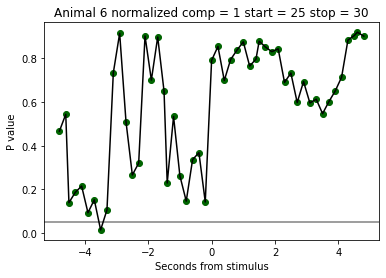

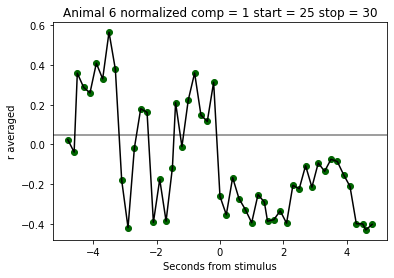

Start 30
Stop 35


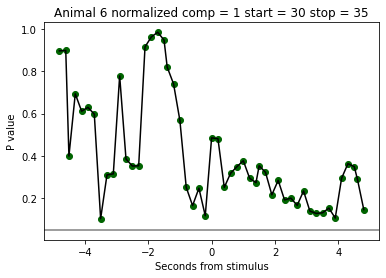

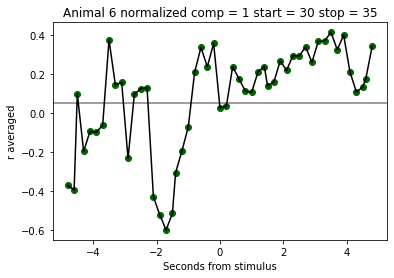

Start 35
Stop 40


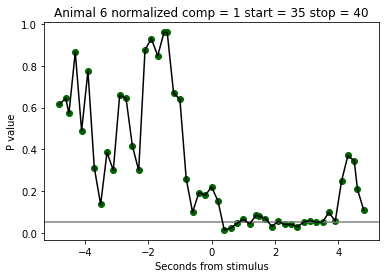

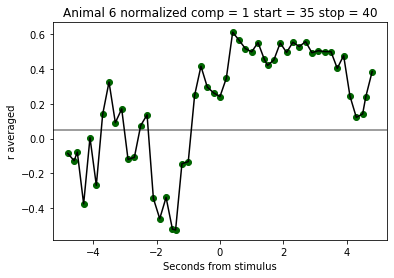

Start 40
Stop 45


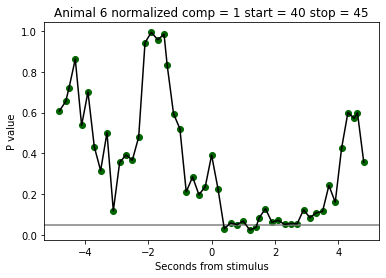

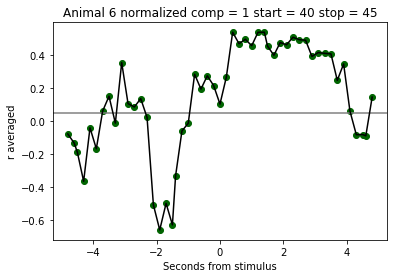

Start 45
Stop 50


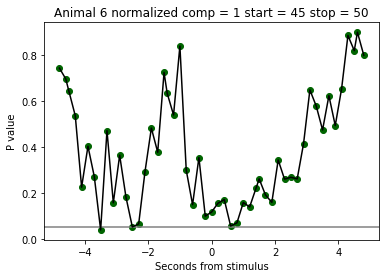

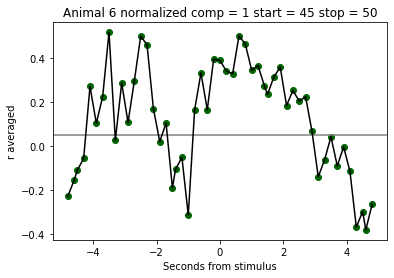

Start 25
Stop 35


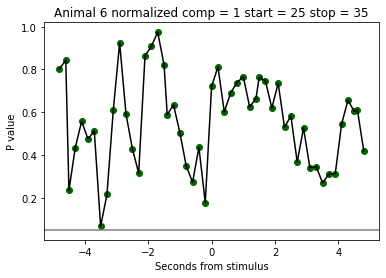

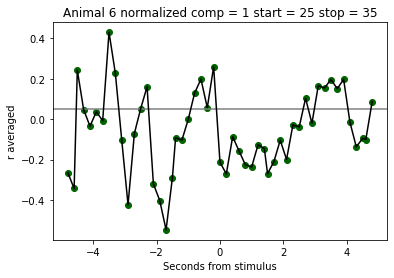

Start 30
Stop 40


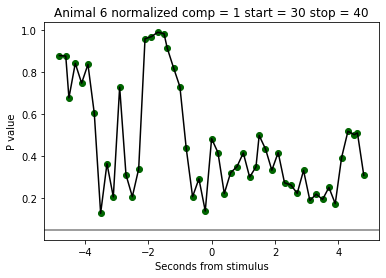

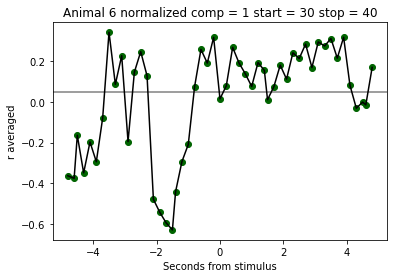

Start 35
Stop 45


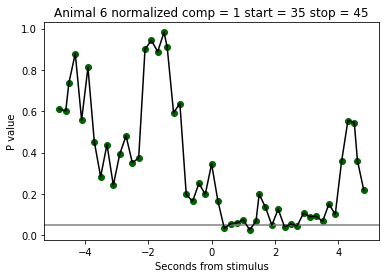

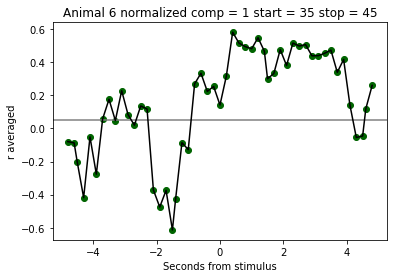

Start 40
Stop 50


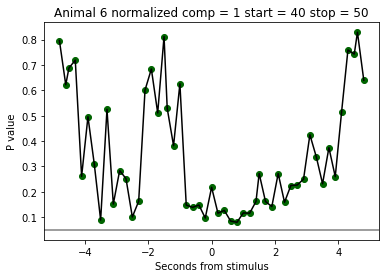

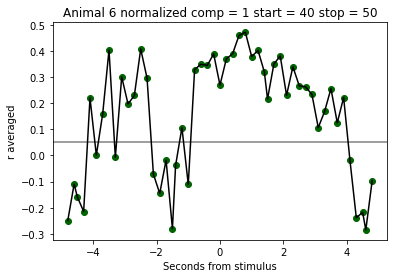

Start 25
Stop 30


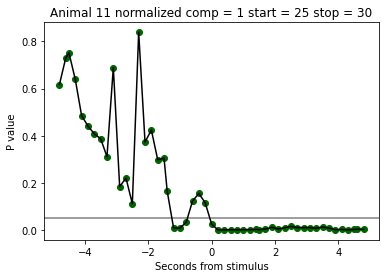

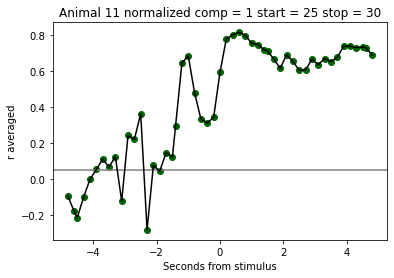

Start 30
Stop 35


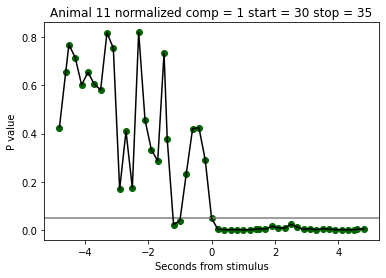

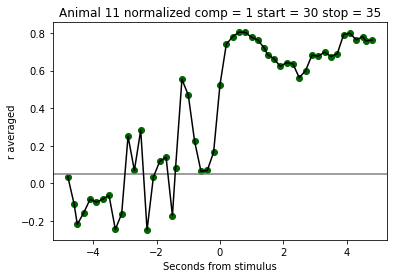

Start 35
Stop 40


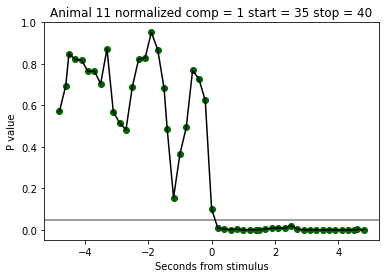

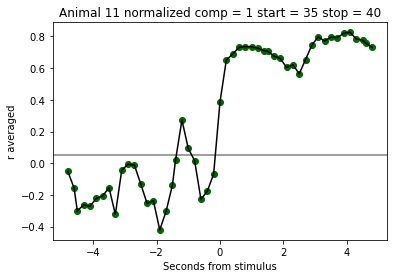

Start 40
Stop 45


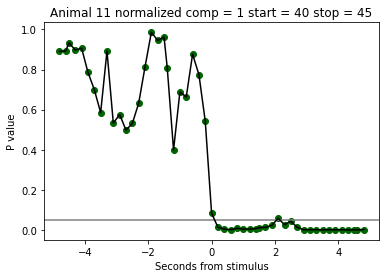

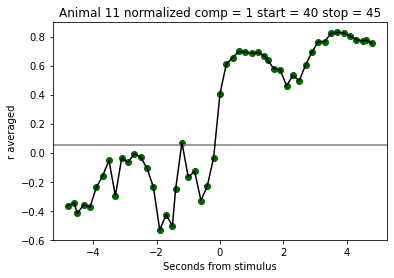

Start 45
Stop 50


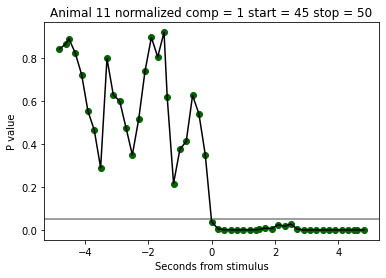

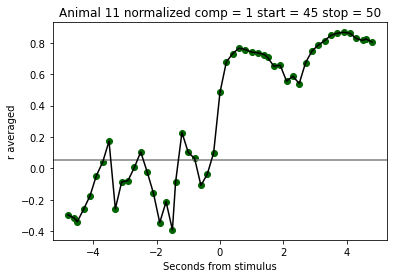

Start 25
Stop 35


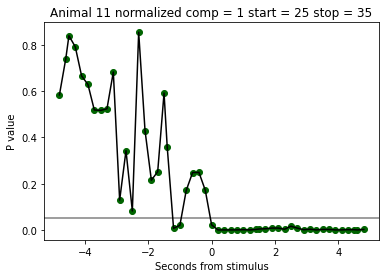

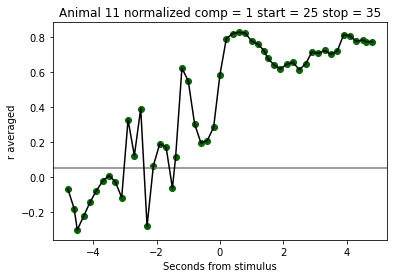

Start 30
Stop 40


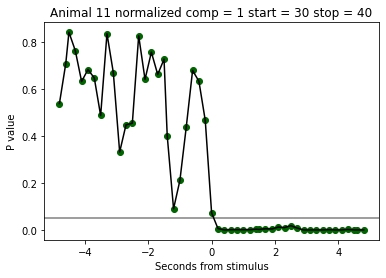

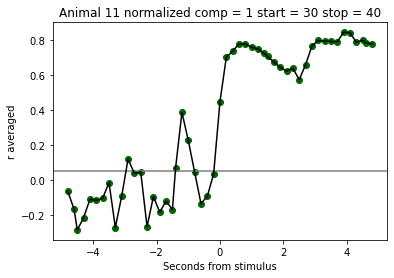

Start 35
Stop 45


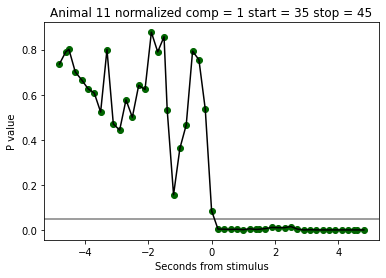

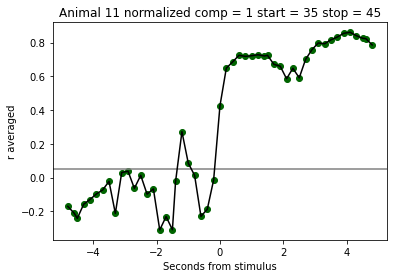

Start 40
Stop 50


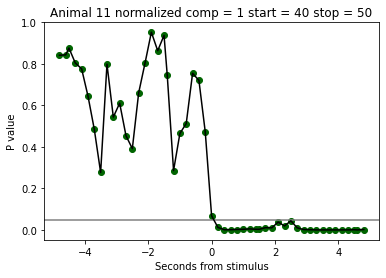

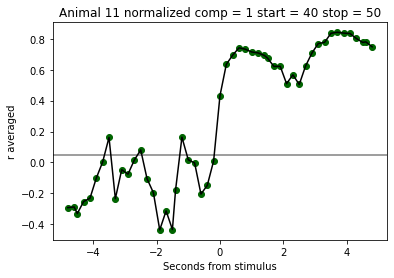

Start 25
Stop 30


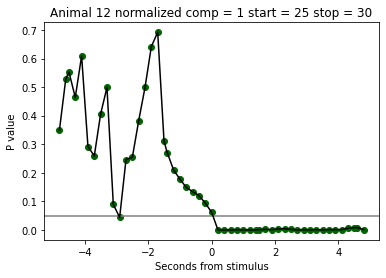

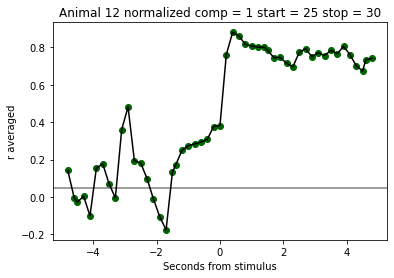

Start 30
Stop 35


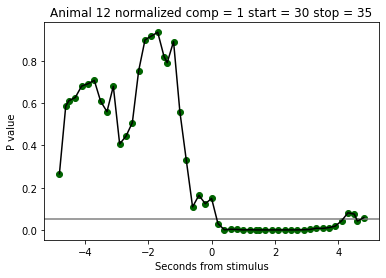

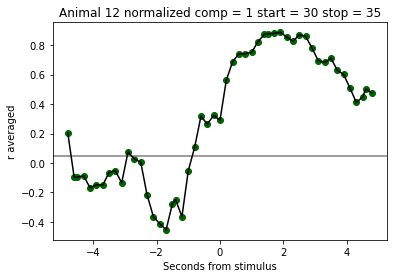

Start 35
Stop 40


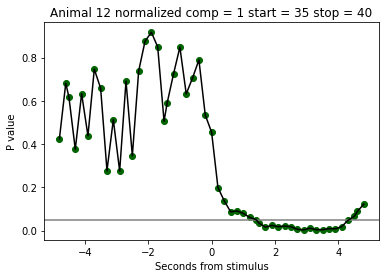

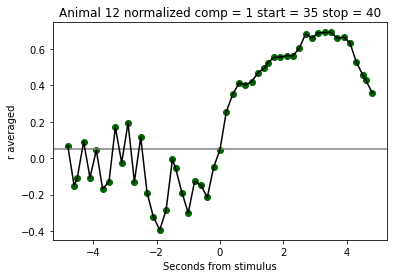

Start 40
Stop 45


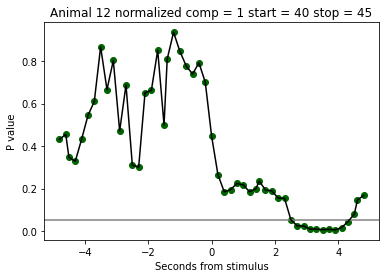

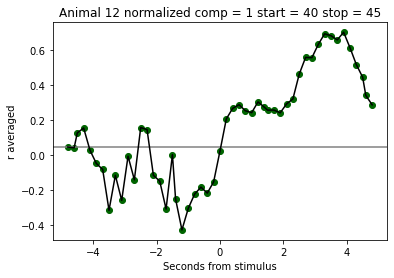

Start 45
Stop 50


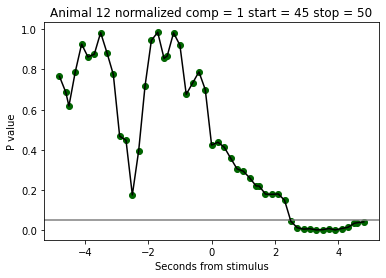

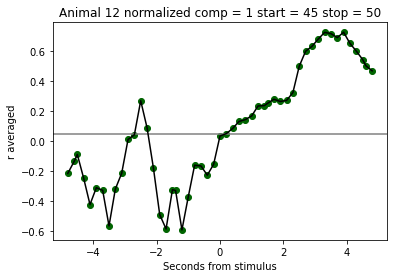

Start 25
Stop 35


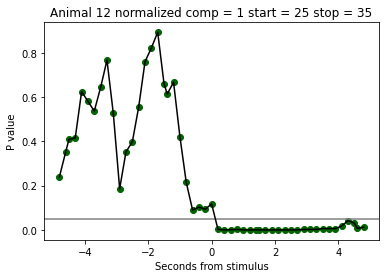

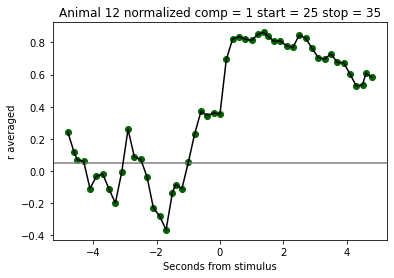

Start 30
Stop 40


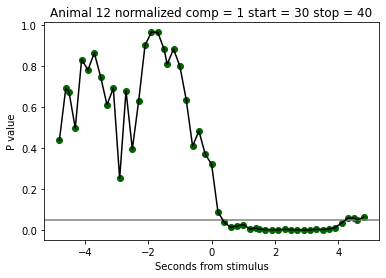

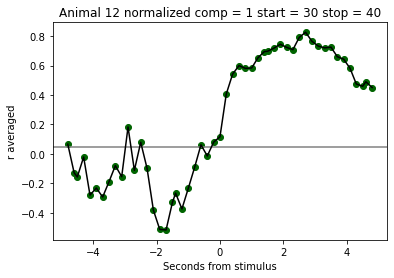

Start 35
Stop 45


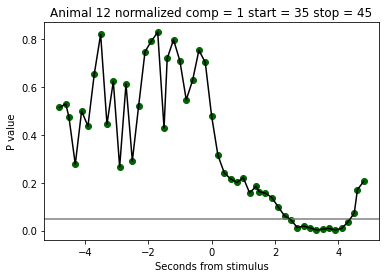

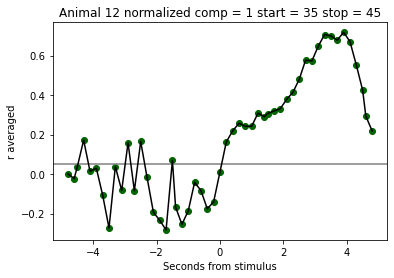

Start 40
Stop 50


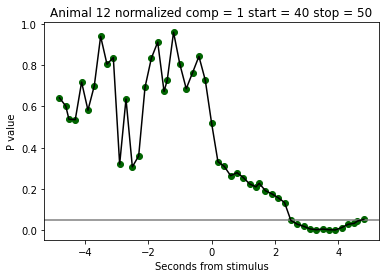

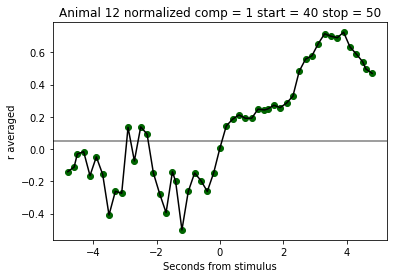

In [12]:
import numpy as np
# these values can be played with
n_permutations = 1000
k = 4
for typee in ["normalized"]: # "none",
    for animall in [6,11,12]:
        for comp in [1]: #3
            for (start,stop) in [(25,30),(30,35),(35,40),(40,45),(45,50),(25,35),(30,40),(35,45),(40,50)]:
                print("Start", start)
                print("Stop", stop)

                time_stim = []
                r_real = []
                pvalues = []
                for time_point in range(0,51):
                    time_stim.append(float("{0:.1f}".format((time_point-25) / fps)))
                    r,_, p = PLSR_stimblocks_timepoints_adjusted_laserCTRL(animall, typee, time_point, comp, n_permutations, k, "without",start, stop)     
                    r_real.append(r)
                    pvalues.append(p)

                plt.axhline(0.05, c = 'gray')
                plt.plot(time_stim, pvalues, c = 'black')
                plt.scatter(time_stim, pvalues, c = colors.get("laserHI"))
                plt.title("Animal " + str(animall) + " " + typee + " comp = " + str(comp) + " start = " + str(start) + " stop = " + str(stop))
                plt.ylabel("P value")
                plt.xlabel("Seconds from stimulus")
                plt.show()
                
                plt.axhline(0.05, c = 'gray')
                plt.plot(time_stim, r_real, c = 'black')
                plt.scatter(time_stim, r_real, c = colors.get("laserHI"))
                plt.title("Animal " + str(animall) + " " + typee + " comp = " + str(comp) + " start = " + str(start) + " stop = " + str(stop))
                plt.ylabel("r averaged")
                plt.xlabel("Seconds from stimulus")
                plt.show()

In [ ]:


# Doing Same Thing for Shock??????




# Apply it to other things from Part 3 (e.g. crossmodalities)

Start 25
Stop 50


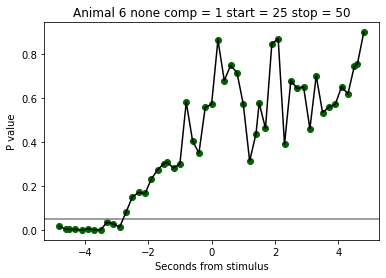

Start 25
Stop 45


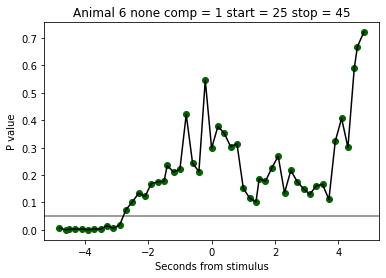

Start 30
Stop 45


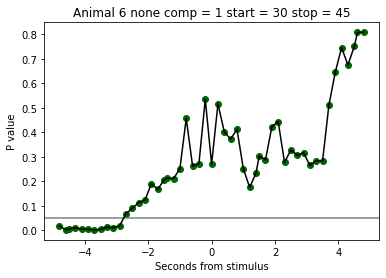

Start 25
Stop 50


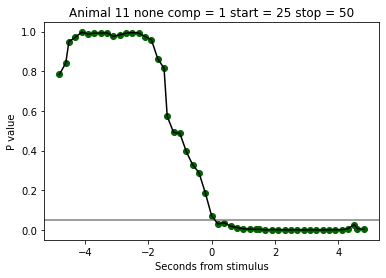

Start 25
Stop 45


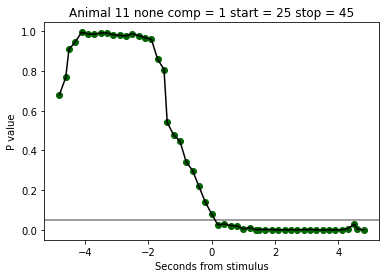

Start 30
Stop 45


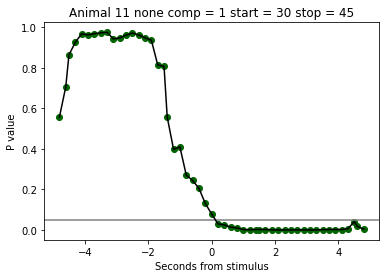

Start 25
Stop 50


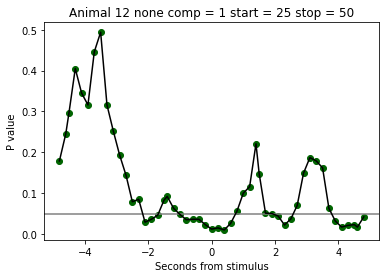

Start 25
Stop 45


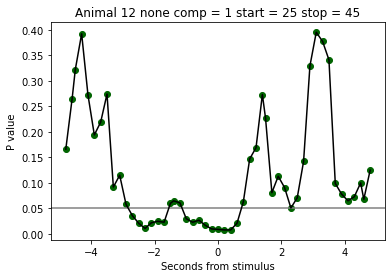

Start 30
Stop 45


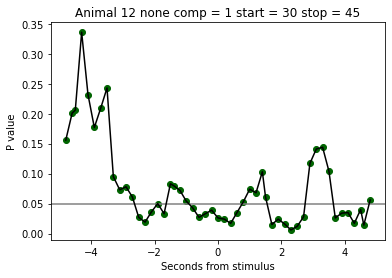

Start 25
Stop 50


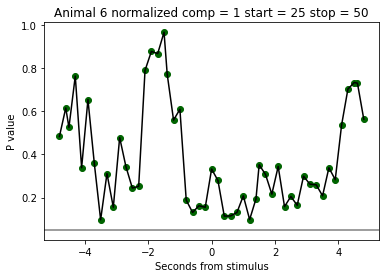

Start 25
Stop 45


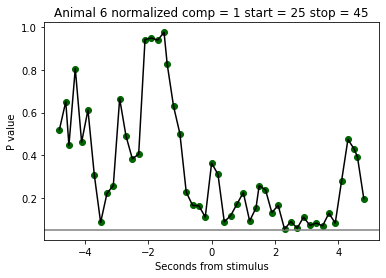

Start 30
Stop 45


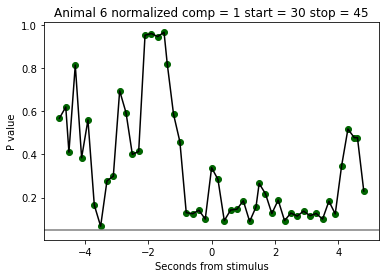

Start 25
Stop 50


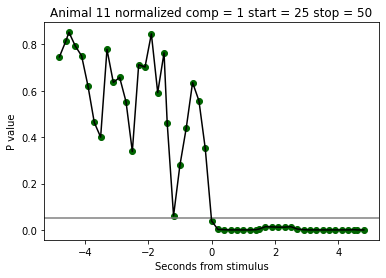

Start 25
Stop 45


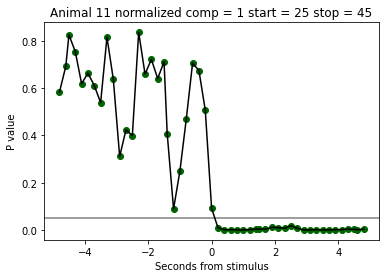

Start 30
Stop 45


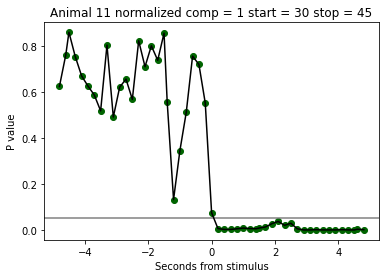

Start 25
Stop 50


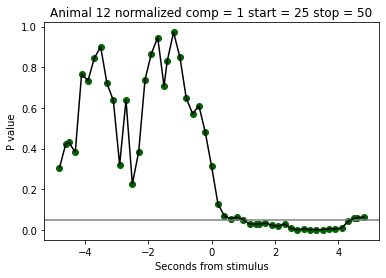

Start 25
Stop 45


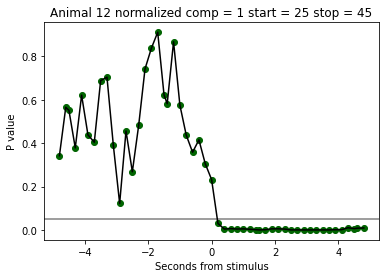

Start 30
Stop 45


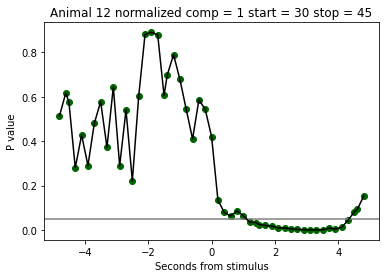

In [22]:
import numpy as np
# these values can be played with
n_permutations = 1000
k = 4
for typee in ["none","normalized"]: # "none",
    for animall in [6,11,12]:
        for comp in [1]: #3
            for (start,stop) in [(25,50),(25,45),(30,45),]:#[(25,30),(30,35),(35,40),(40,45),(45,50),(25,35),(30,40),(35,45),(40,50)]:
                print("Start", start)
                print("Stop", stop)

                time_stim = []
                r_real = []
                pvalues = []
                for time_point in range(0,51):
                    time_stim.append(float("{0:.1f}".format((time_point-25) / fps)))
                    r,_, p = PLSR_stimblocks_timepoints_adjusted_laserCTRL(animall, typee, time_point, comp, n_permutations, k, "without",start, stop)     
                    r_real.append(r)
                    pvalues.append(p)

                plt.axhline(0.05, c = 'gray')
                plt.plot(time_stim, pvalues, c = 'black')
                plt.scatter(time_stim, pvalues, c = colors.get("laserHI"))
                plt.title("Animal " + str(animall) + " " + typee + " comp = " + str(comp) + " start = " + str(start) + " stop = " + str(stop))
                plt.ylabel("P value")
                plt.xlabel("Seconds from stimulus")
                plt.show()

Start 25
Stop 50


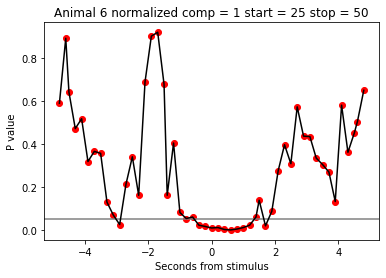

Start 25
Stop 45


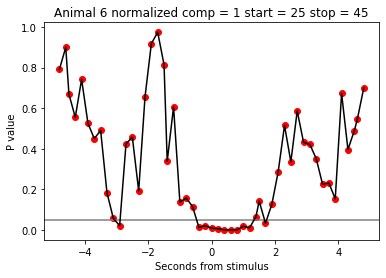

Start 30
Stop 45


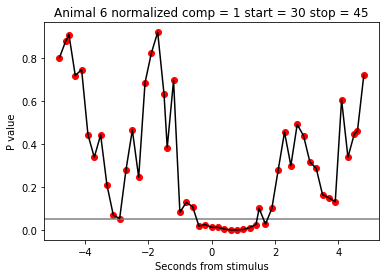

Start 30
Stop 50


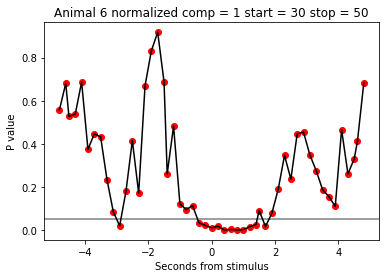

Start 35
Stop 50


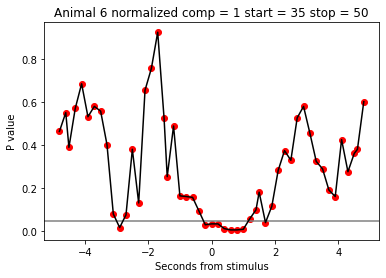

Start 25
Stop 30


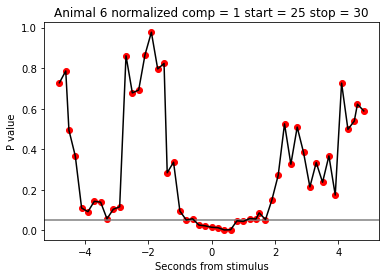

Start 30
Stop 35


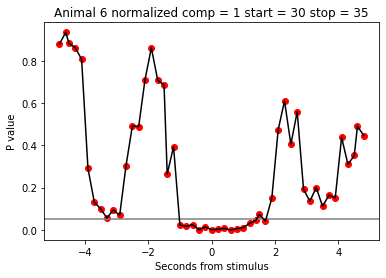

Start 35
Stop 40


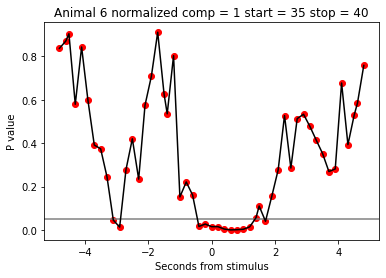

Start 40
Stop 45


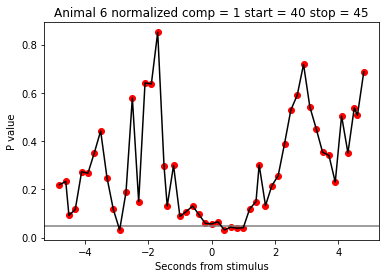

Start 45
Stop 50


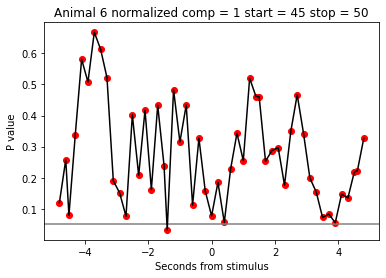

Start 25
Stop 35


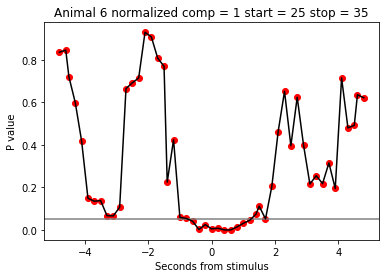

Start 30
Stop 40


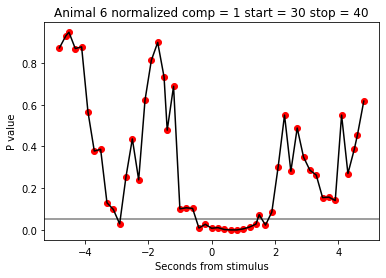

Start 35
Stop 45


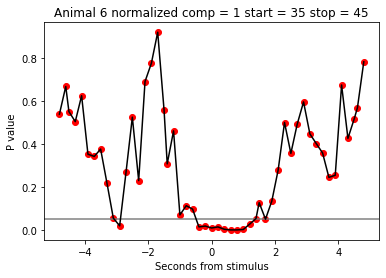

Start 40
Stop 50


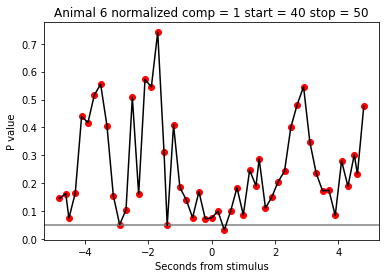

Start 25
Stop 50


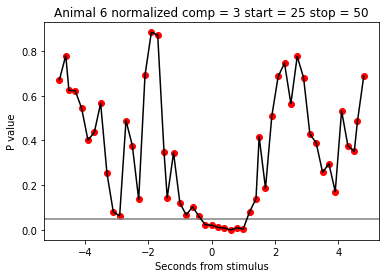

Start 25
Stop 45


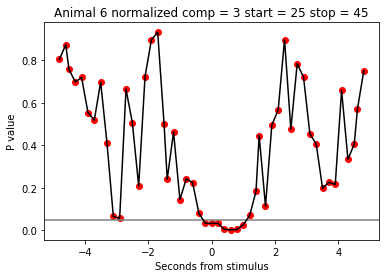

Start 30
Stop 45


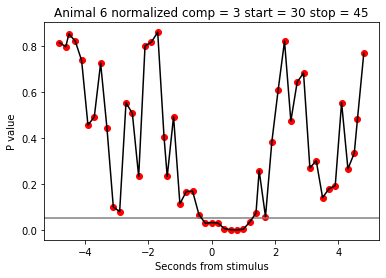

Start 30
Stop 50


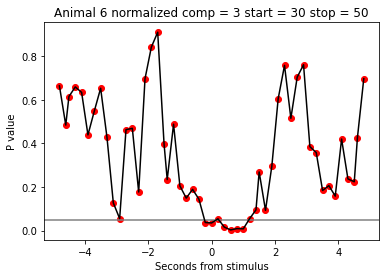

Start 35
Stop 50


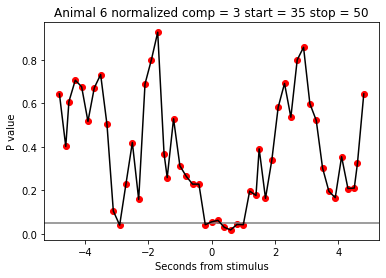

Start 25
Stop 30


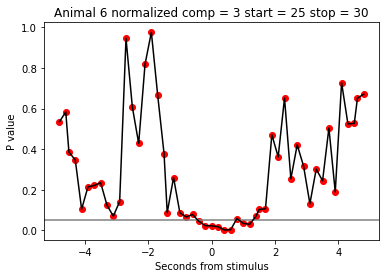

Start 30
Stop 35


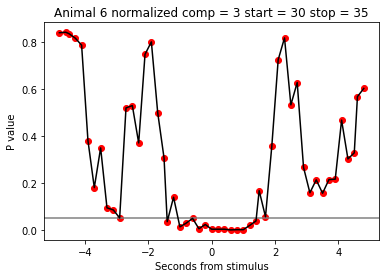

Start 35
Stop 40


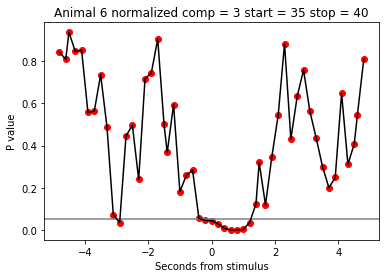

Start 40
Stop 45


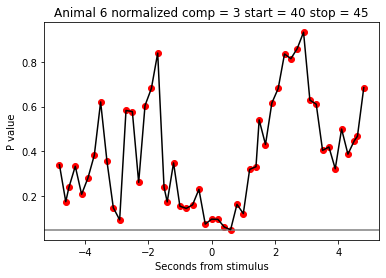

Start 45
Stop 50


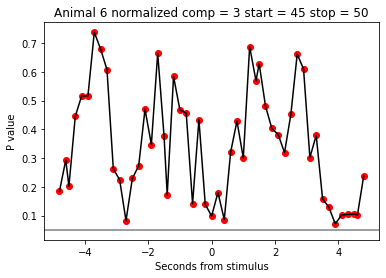

Start 25
Stop 35


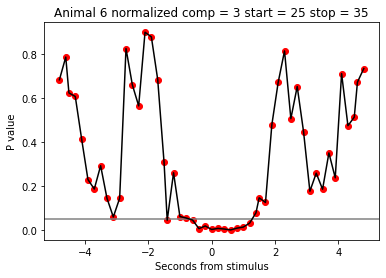

Start 30
Stop 40


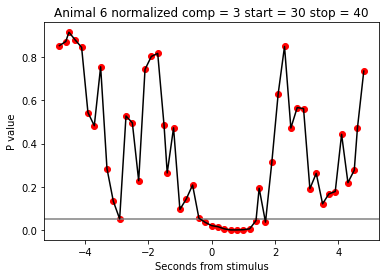

Start 35
Stop 45


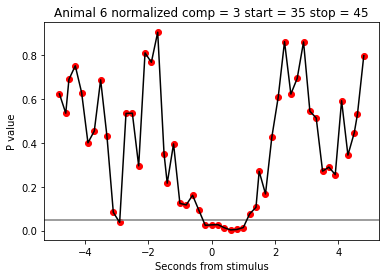

Start 40
Stop 50


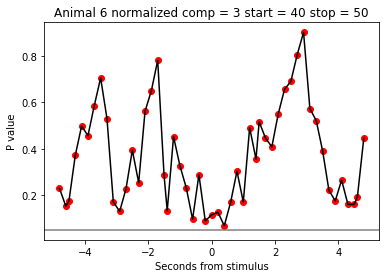

Start 25
Stop 50


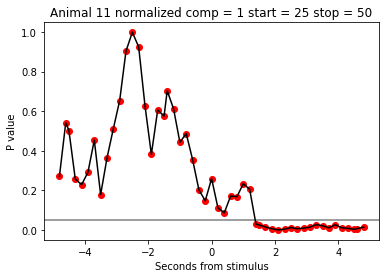

Start 25
Stop 45


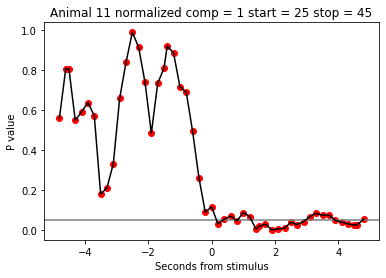

Start 30
Stop 45


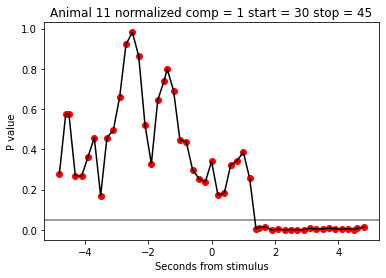

Start 30
Stop 50


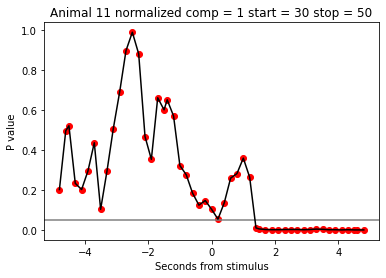

Start 35
Stop 50


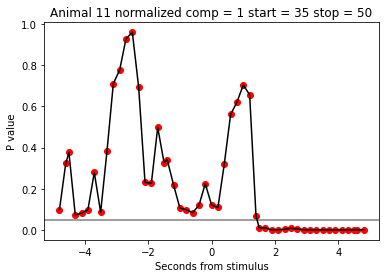

Start 25
Stop 30


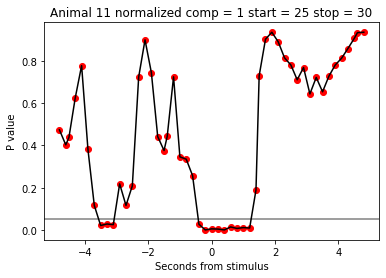

Start 30
Stop 35


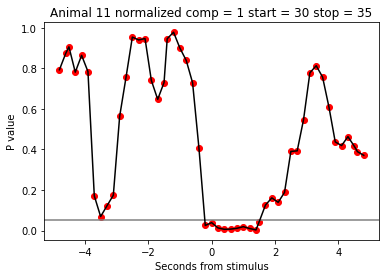

Start 35
Stop 40


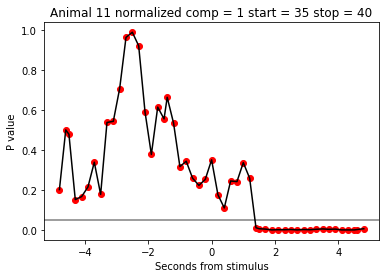

Start 40
Stop 45


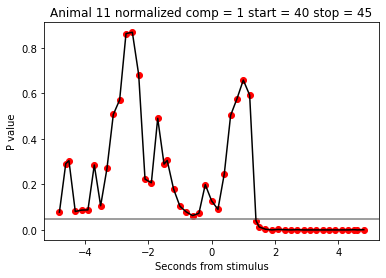

Start 45
Stop 50


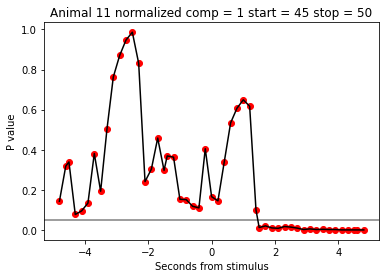

Start 25
Stop 35


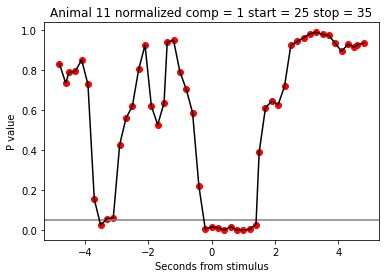

Start 30
Stop 40


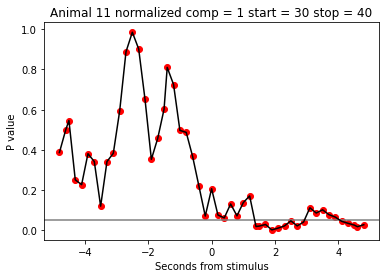

Start 35
Stop 45


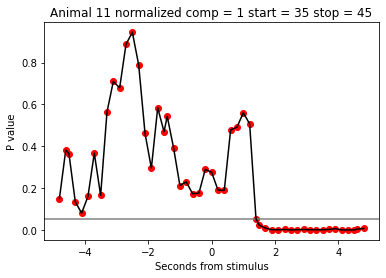

Start 40
Stop 50


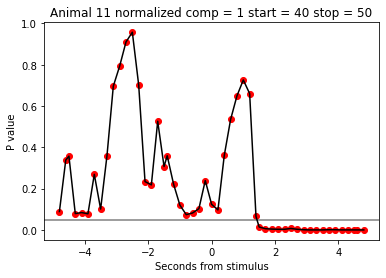

Start 25
Stop 50


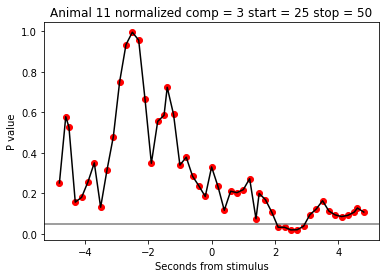

Start 25
Stop 45


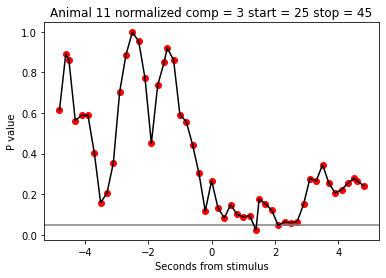

Start 30
Stop 45


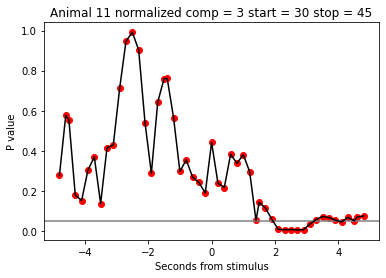

Start 30
Stop 50


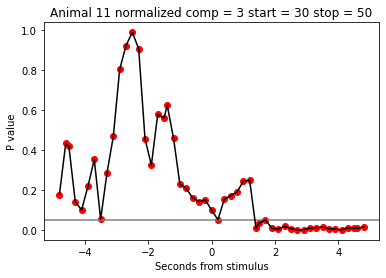

Start 35
Stop 50


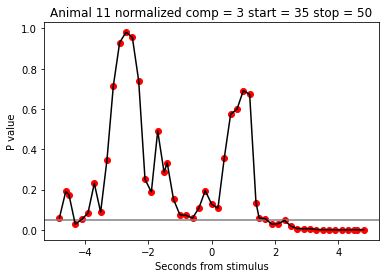

Start 25
Stop 30


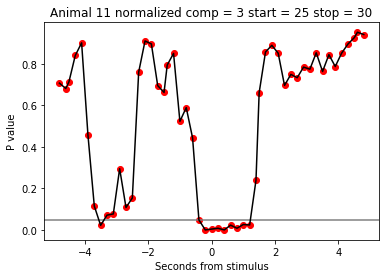

Start 30
Stop 35


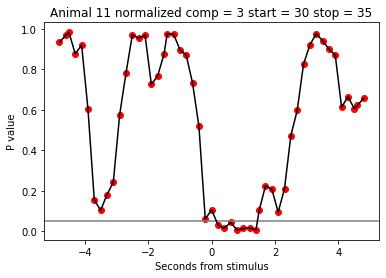

Start 35
Stop 40


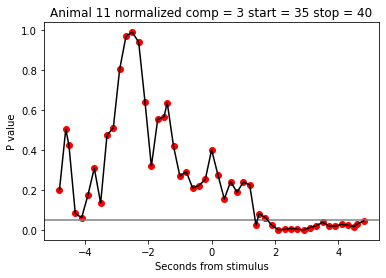

Start 40
Stop 45


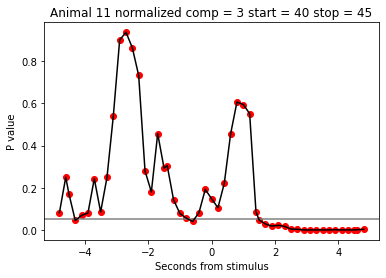

Start 45
Stop 50


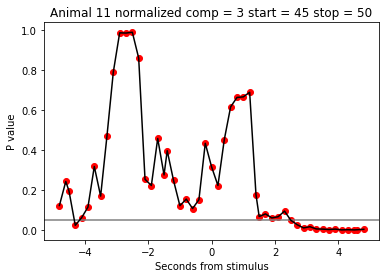

Start 25
Stop 35


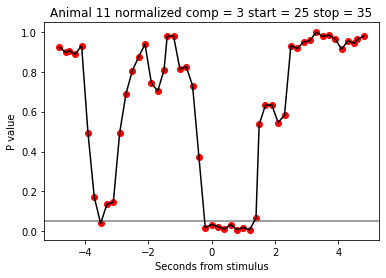

Start 30
Stop 40


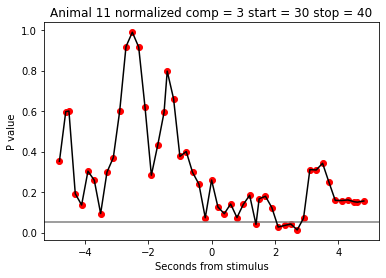

Start 35
Stop 45


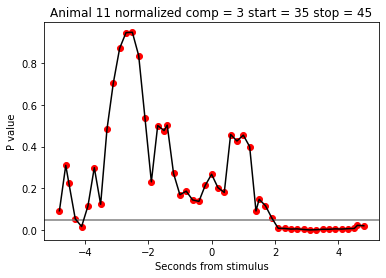

Start 40
Stop 50


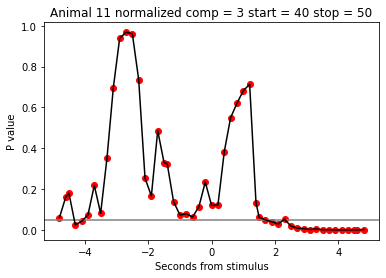

Start 25
Stop 50


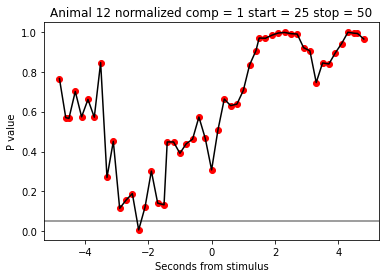

Start 25
Stop 45


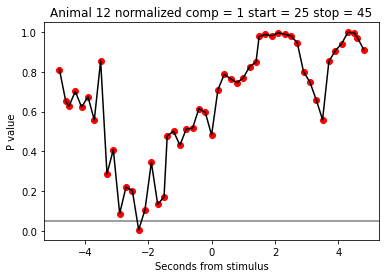

Start 30
Stop 45


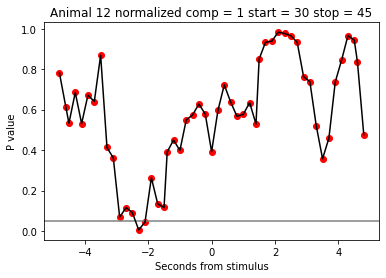

Start 30
Stop 50


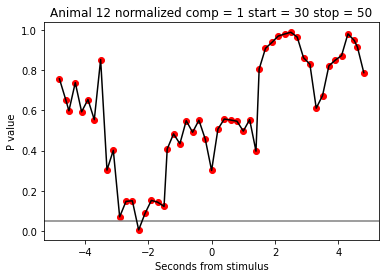

Start 35
Stop 50


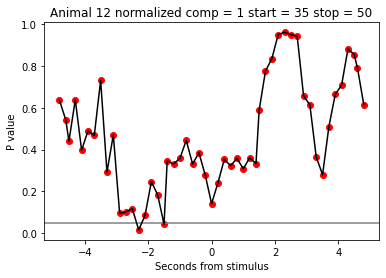

Start 25
Stop 30


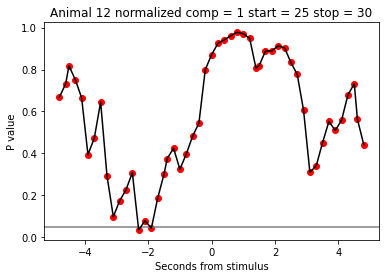

Start 30
Stop 35


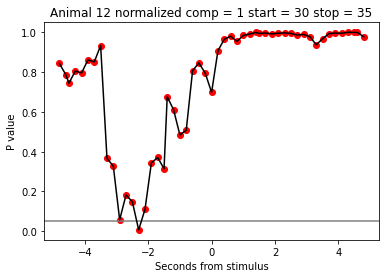

Start 35
Stop 40


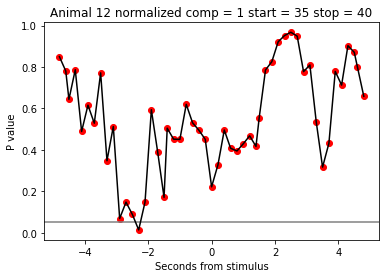

Start 40
Stop 45


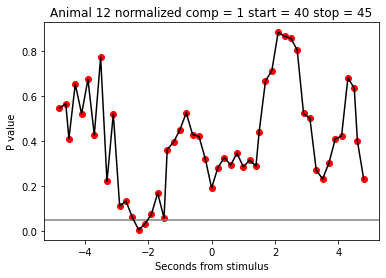

Start 45
Stop 50


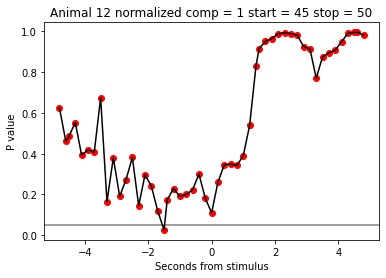

Start 25
Stop 35


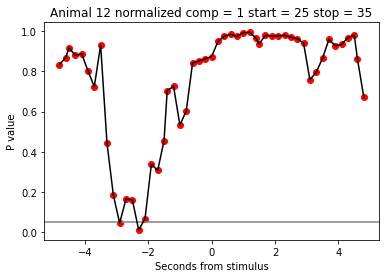

Start 30
Stop 40


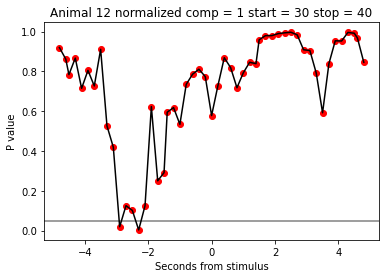

Start 35
Stop 45


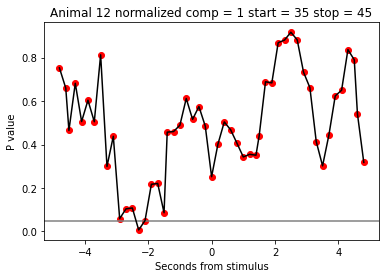

Start 40
Stop 50


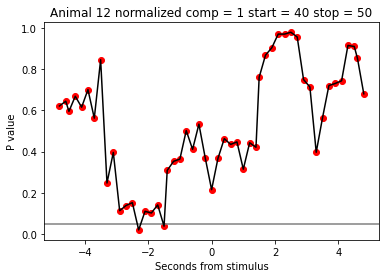

Start 25
Stop 50


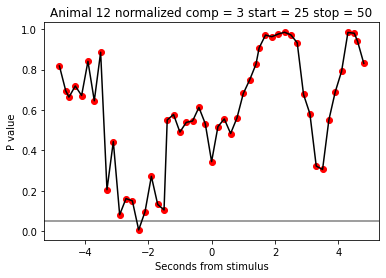

Start 25
Stop 45


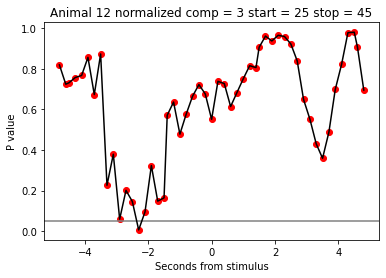

Start 30
Stop 45


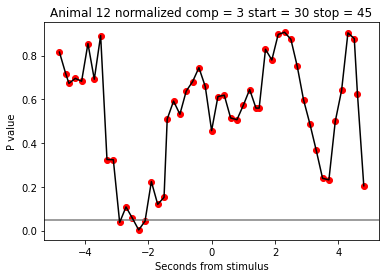

Start 30
Stop 50


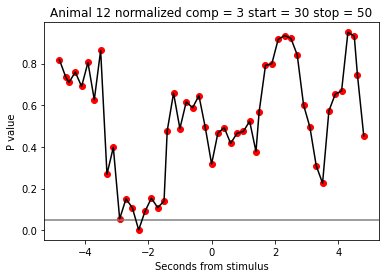

Start 35
Stop 50


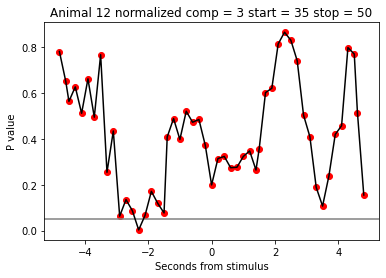

Start 25
Stop 30


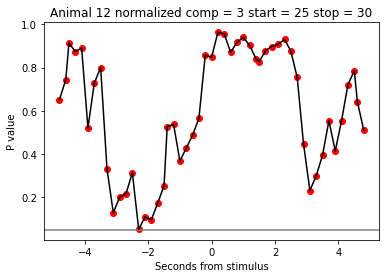

Start 30
Stop 35


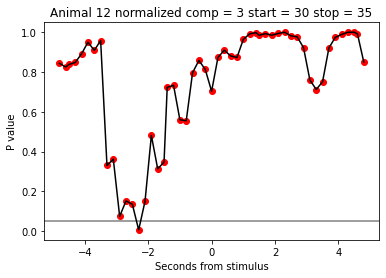

Start 35
Stop 40


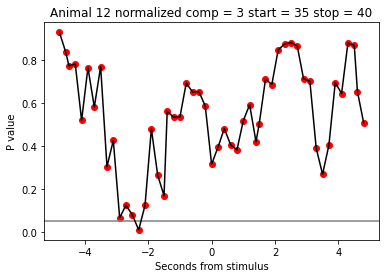

Start 40
Stop 45


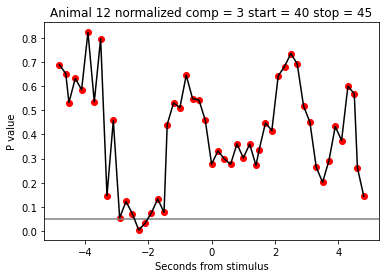

Start 45
Stop 50


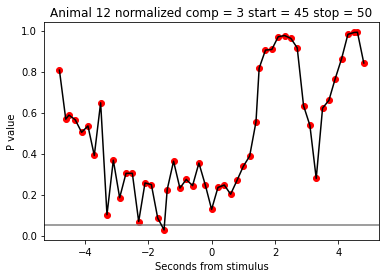

Start 25
Stop 35


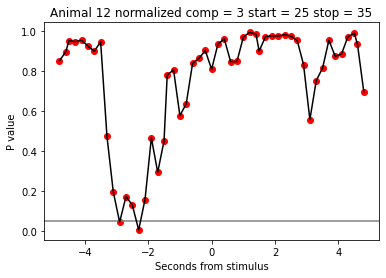

Start 30
Stop 40


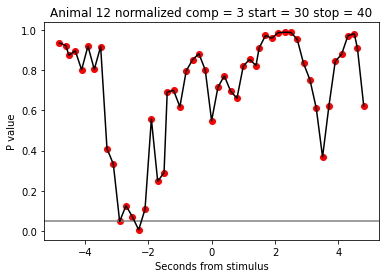

Start 35
Stop 45


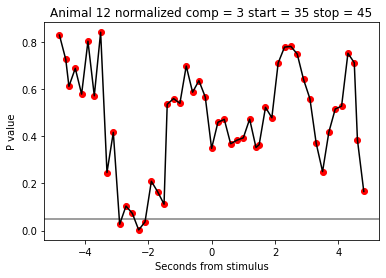

Start 40
Stop 50


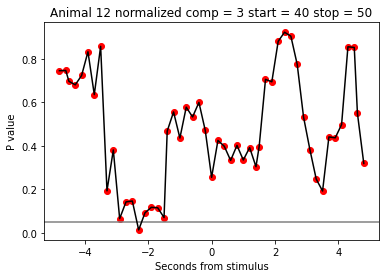

Start 25
Stop 50


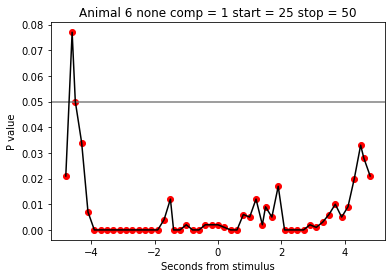

Start 25
Stop 45


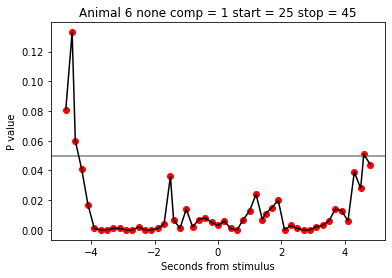

Start 30
Stop 45


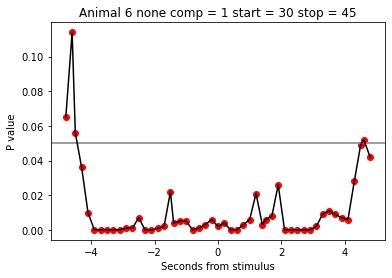

Start 30
Stop 50


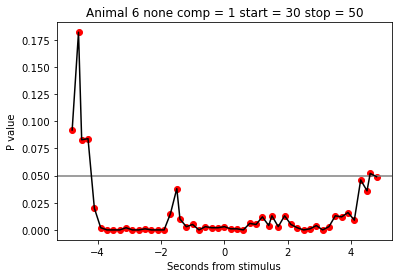

Start 35
Stop 50


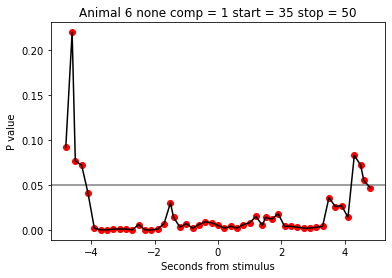

Start 25
Stop 30


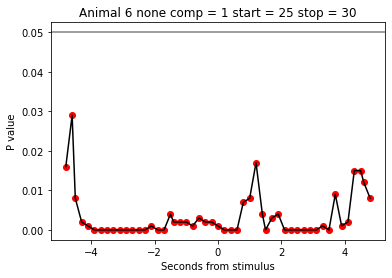

Start 30
Stop 35


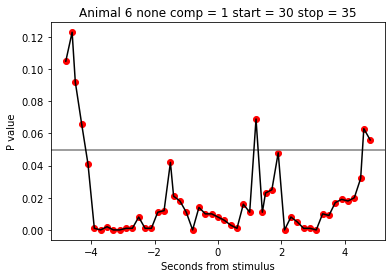

Start 35
Stop 40


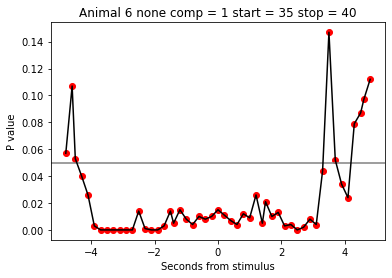

Start 40
Stop 45


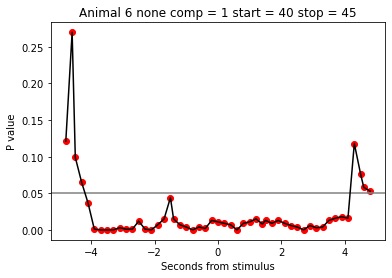

Start 45
Stop 50


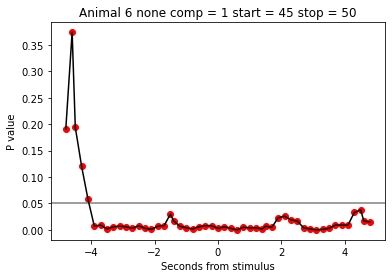

Start 25
Stop 35


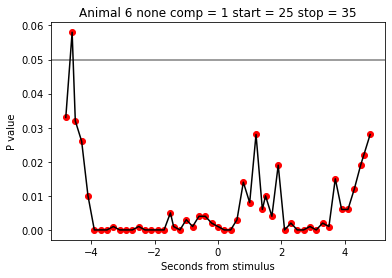

Start 30
Stop 40


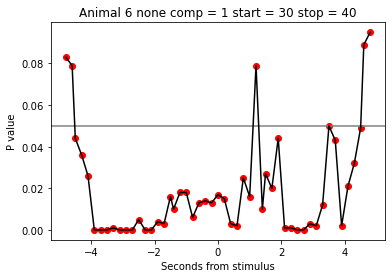

Start 35
Stop 45


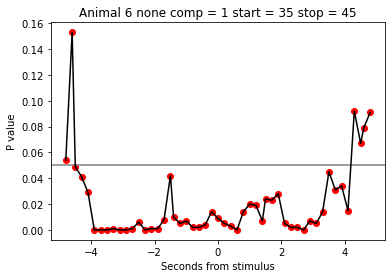

Start 40
Stop 50


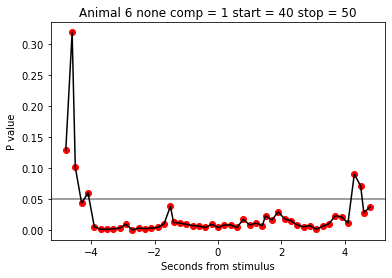

Start 25
Stop 50


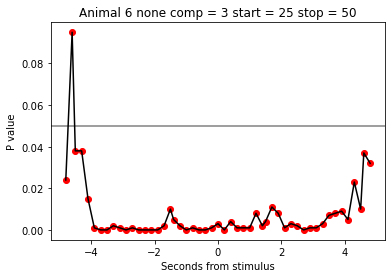

Start 25
Stop 45


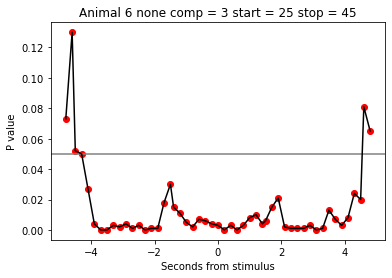

Start 30
Stop 45


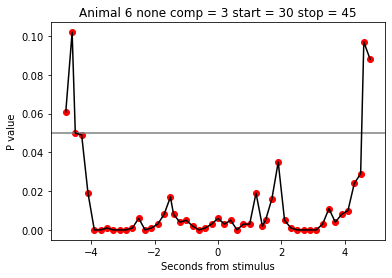

Start 30
Stop 50


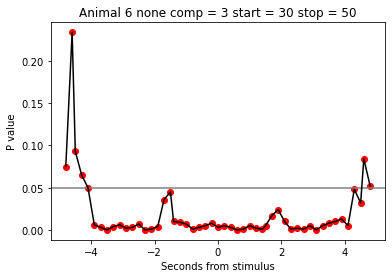

Start 35
Stop 50


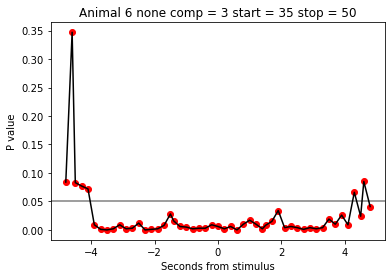

Start 25
Stop 30


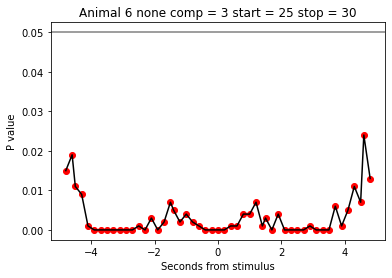

Start 30
Stop 35


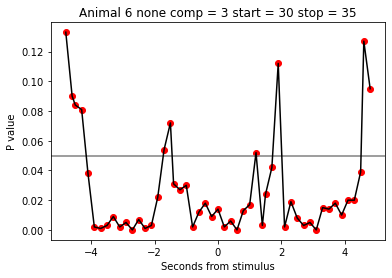

Start 35
Stop 40


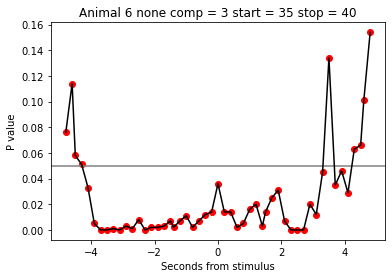

Start 40
Stop 45


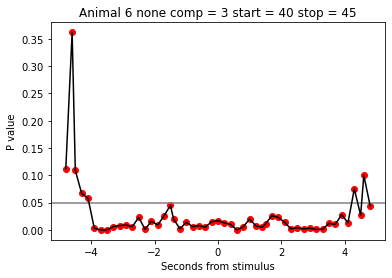

Start 45
Stop 50


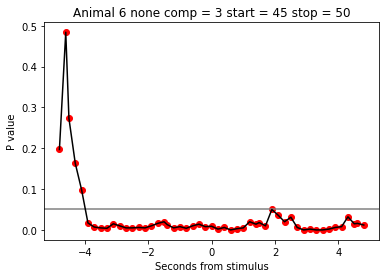

Start 25
Stop 35


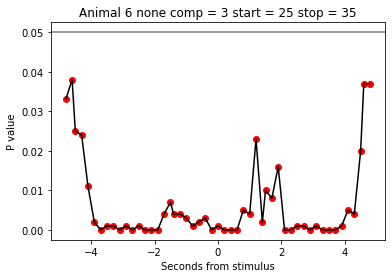

Start 30
Stop 40


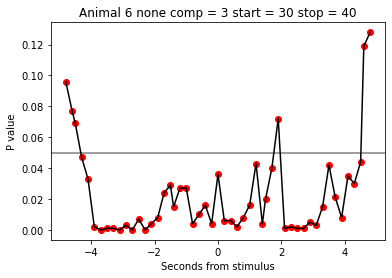

Start 35
Stop 45


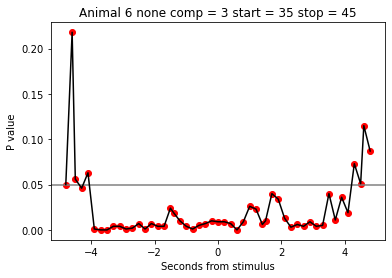

Start 40
Stop 50


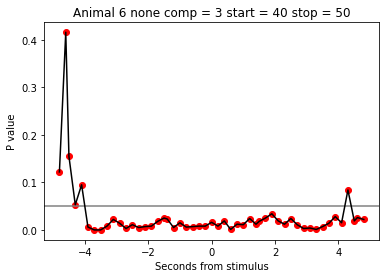

Start 25
Stop 50


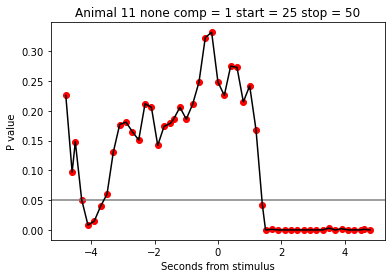

Start 25
Stop 45


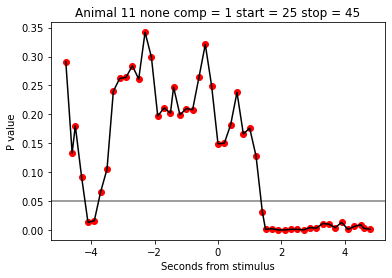

Start 30
Stop 45


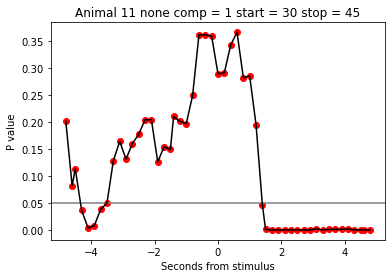

Start 30
Stop 50


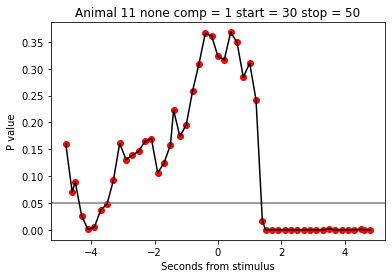

Start 35
Stop 50


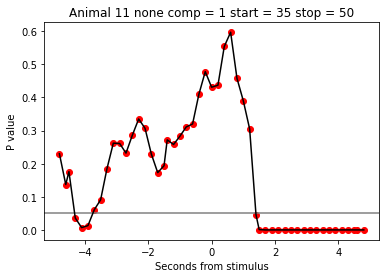

Start 25
Stop 30


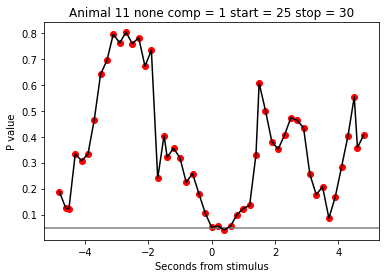

Start 30
Stop 35


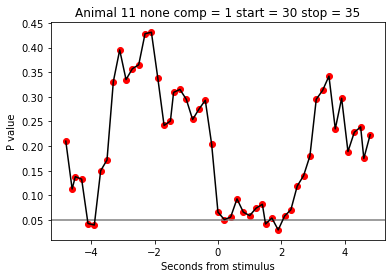

Start 35
Stop 40


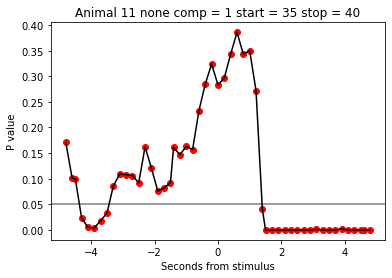

Start 40
Stop 45


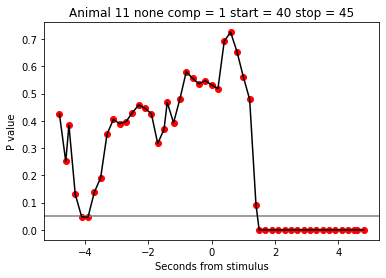

Start 45
Stop 50


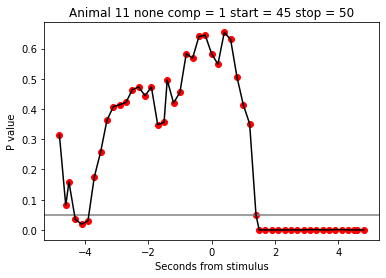

Start 25
Stop 35


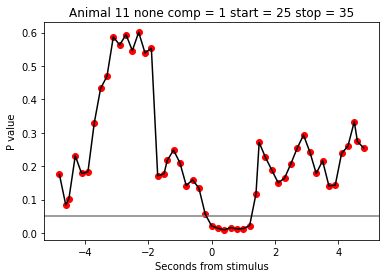

Start 30
Stop 40


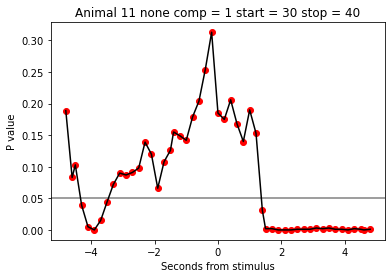

Start 35
Stop 45


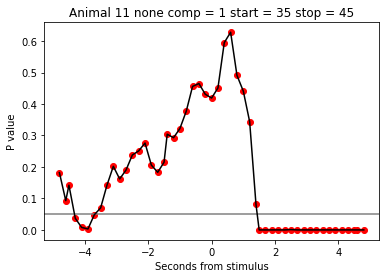

Start 40
Stop 50


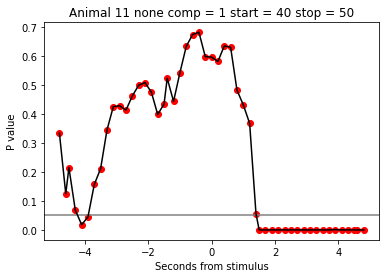

Start 25
Stop 50


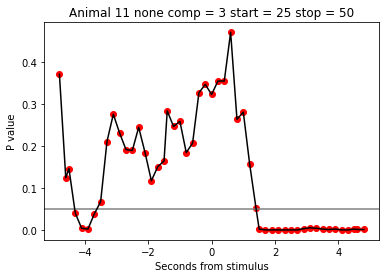

Start 25
Stop 45


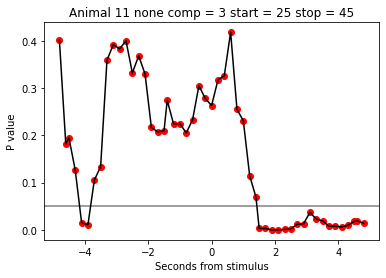

Start 30
Stop 45


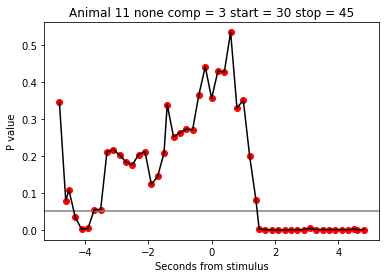

Start 30
Stop 50


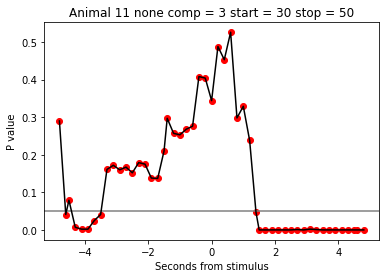

Start 35
Stop 50


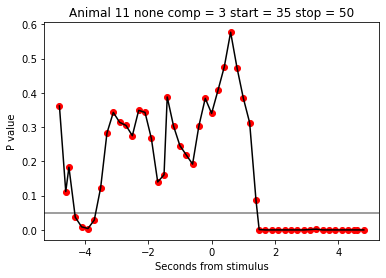

Start 25
Stop 30


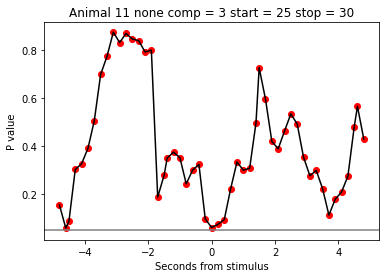

Start 30
Stop 35


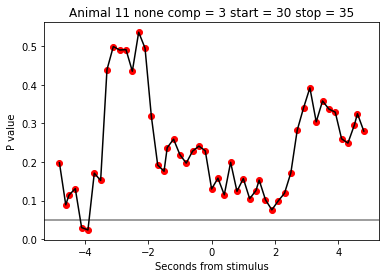

Start 35
Stop 40


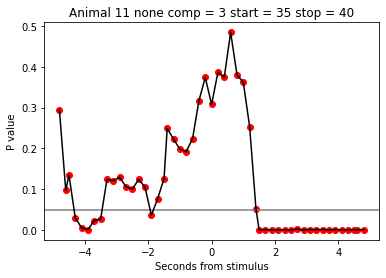

Start 40
Stop 45


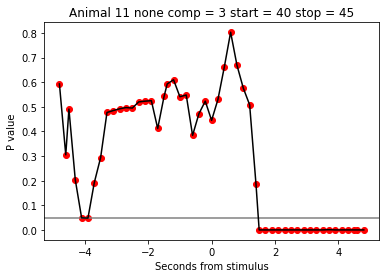

Start 45
Stop 50


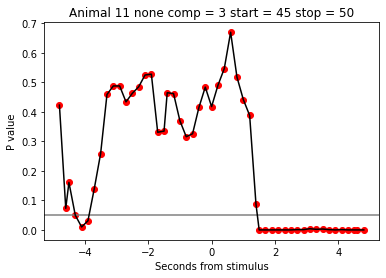

Start 25
Stop 35


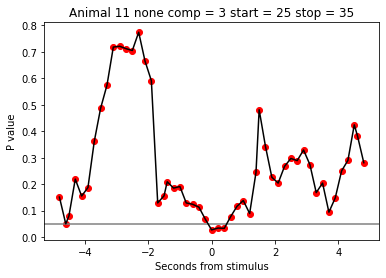

Start 30
Stop 40


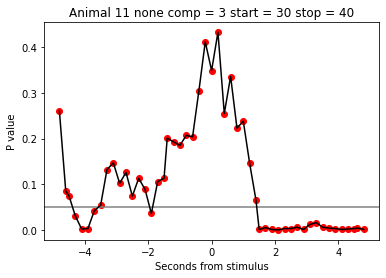

Start 35
Stop 45


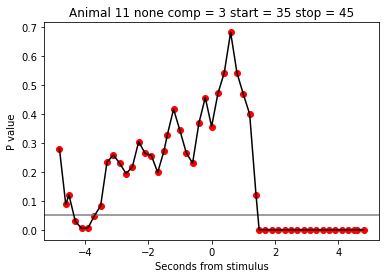

Start 40
Stop 50


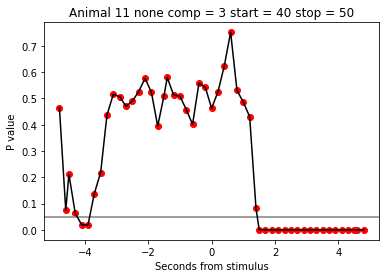

Start 25
Stop 50


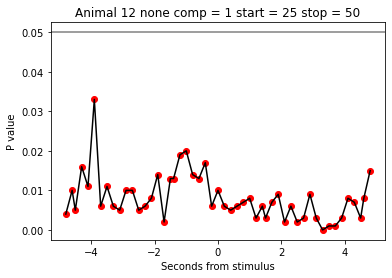

Start 25
Stop 45


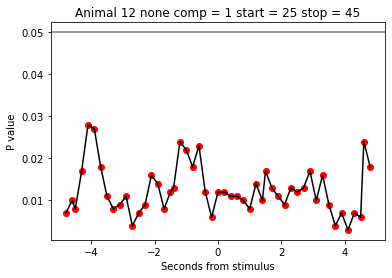

Start 30
Stop 45


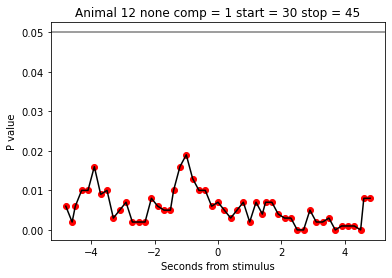

Start 30
Stop 50


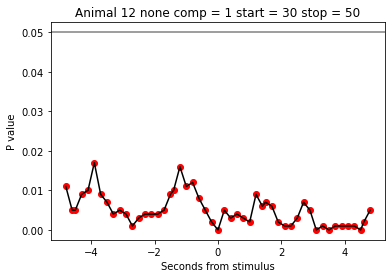

Start 35
Stop 50


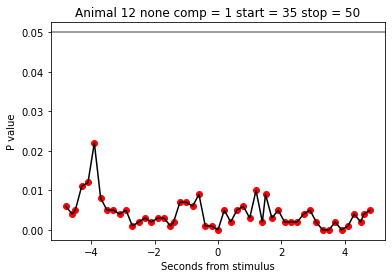

Start 25
Stop 30


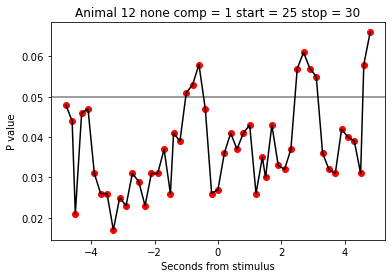

Start 30
Stop 35


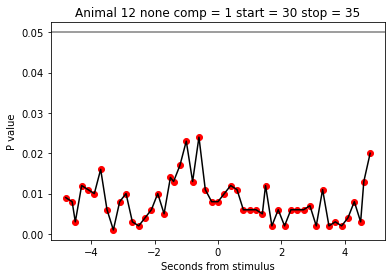

Start 35
Stop 40


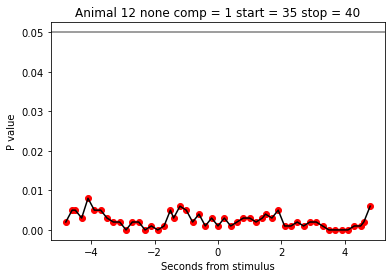

Start 40
Stop 45


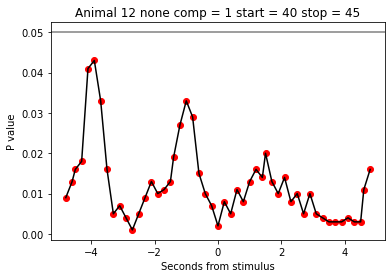

Start 45
Stop 50


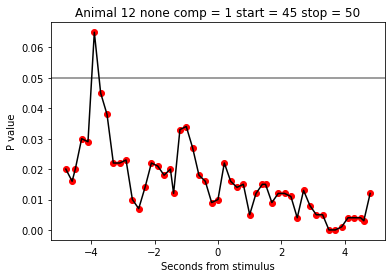

Start 25
Stop 35


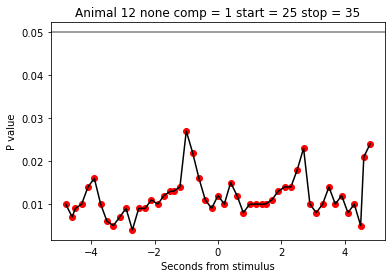

Start 30
Stop 40


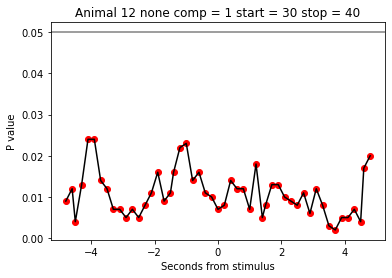

Start 35
Stop 45


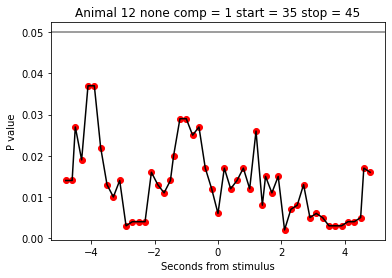

Start 40
Stop 50


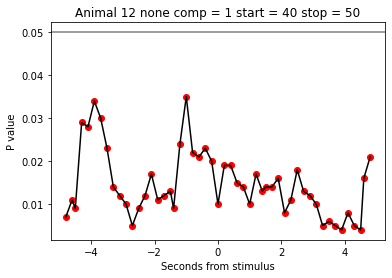

Start 25
Stop 50


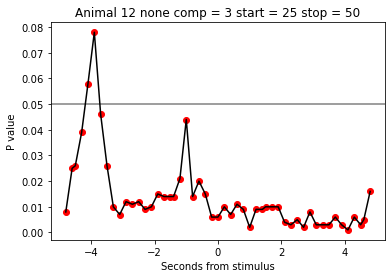

Start 25
Stop 45


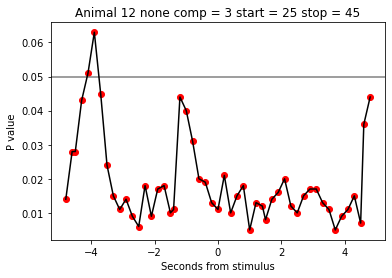

Start 30
Stop 45


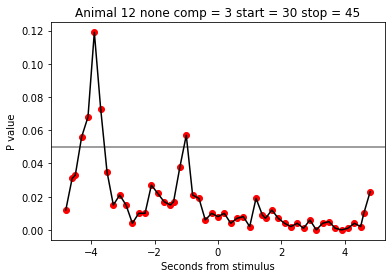

Start 30
Stop 50


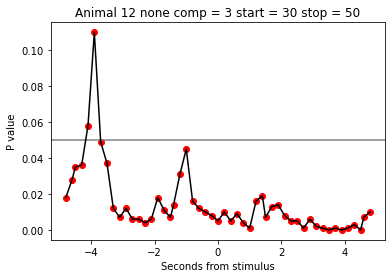

Start 35
Stop 50


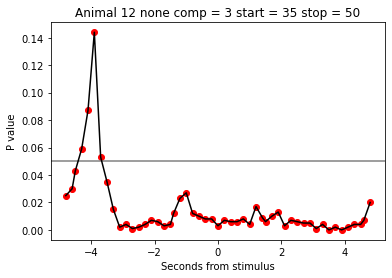

Start 25
Stop 30


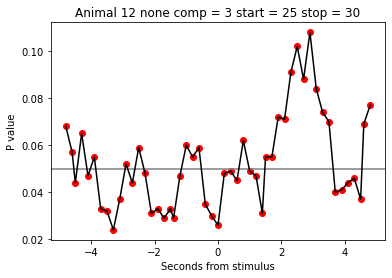

Start 30
Stop 35


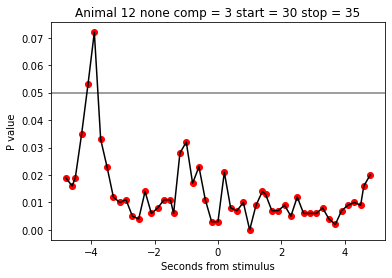

Start 35
Stop 40


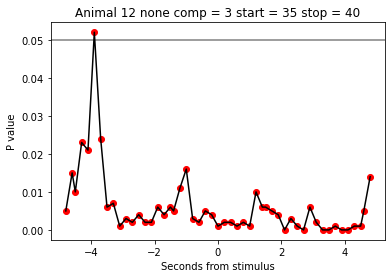

Start 40
Stop 45


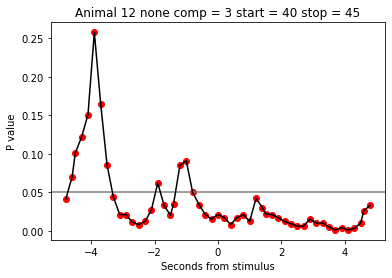

Start 45
Stop 50


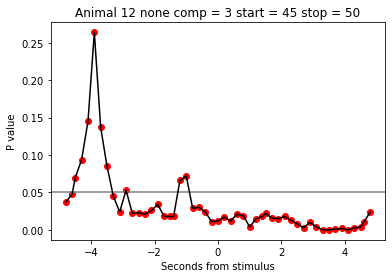

Start 25
Stop 35


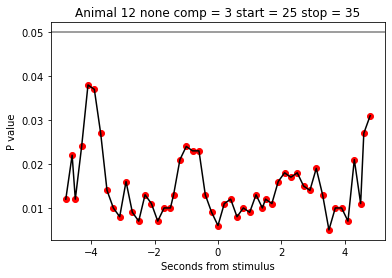

Start 30
Stop 40


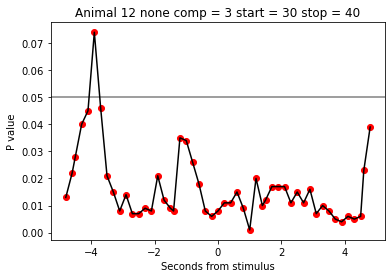

Start 35
Stop 45


In [ ]:
import numpy as np
# these values can be played with
n_permutations = 1000
k = 4
for typee in ["normalized","none"]: # "none",
    for animall in [6,11,12]: # 11
        for comp in [1,3]: #3
            for (start,stop) in [(25,50),(25,45),(30,45),(30,50),(35,50),(25,30),(30,35),(35,40),(40,45),(45,50),(25,35),(30,40),(35,45),(40,50)]:
                print("Start", start)
                print("Stop", stop)

                time_stim = []
                r_real = []
                pvalues = []
                for time_point in range(0,51):
                    time_stim.append(float("{0:.1f}".format((time_point-25) / fps)))
                    r,_, p = PLSR_stimblocks_timepoints_adjusted_shock(animall, typee, time_point, comp, n_permutations, k, start, stop)     
                    r_real.append(r)
                    pvalues.append(p)

                plt.axhline(0.05, c = 'gray')
                plt.plot(time_stim, pvalues, c = 'black')
                plt.scatter(time_stim, pvalues, c = colors.get("shock"))
                plt.title("Animal " + str(animall) + " " + typee + " comp = " + str(comp) + " start = " + str(start) + " stop = " + str(stop))
                plt.ylabel("P value")
                plt.xlabel("Seconds from stimulus")
                plt.show()

In [59]:
#checking if something in the environment lets the animal predicts between a shock and a shockCTRL upcoming trial
# t-test for the fluorescence values during baseline of shock vs shockCTRL trials
from scipy import stats
def baseline_t_test_checking_environment(animall,stimm,typee):
    print("Animal " + str(animall) + " " + str(stimm))
    if(typee == "allneurons"):
        print("All Neurons")
        animal = animal_none(animall)
        stim = pd.Series(animal['stimulus'])
        animal = animal.drop(columns = 'stimulus')    
    
        #Mean-Centering happens for time period of all trials from all stimuli
        from sklearn.preprocessing import StandardScaler
        scaled = StandardScaler().fit_transform(animal)
        animal_scaled = pd.DataFrame(scaled, columns = animal.columns)
        animal_scaled['stimulus'] = pd.Series(stim)
        
        if(stimm == "laserHI"):
            temp1 = animal_scaled[animal_scaled["stimulus"]== "laserHI"]
            temp1 = temp1.reset_index(drop = True)
            temp2 = animal_scaled[animal_scaled["stimulus"]== "laserCTRL"]
            temp2 = temp2.reset_index(drop = True)
        if(stimm == "shock"):
            temp1 = animal_scaled[animal_scaled["stimulus"]== "shock"]
            temp1 = temp1.reset_index(drop = True)
            temp2 = animal_scaled[animal_scaled["stimulus"]== "shockCTRL"]
            temp2 = temp2.reset_index(drop = True)
        
        avg_neurons1 = temp1.mean(axis = 1).tolist()
        avg_neurons2 = temp2.mean(axis = 1).tolist()
        avg_trials1 = []
        avg_trials2 = []
        #Averaging baseline values
        for trial in [0,1,2,3,4,5,6,7,8,9]:
            avg_trials1.append(sum(avg_neurons1[trial*51:trial*51+25])/len(avg_neurons1[trial*51:trial*51+25]))
            avg_trials2.append(sum(avg_neurons2[trial*51:trial*51+25])/len(avg_neurons2[trial*51:trial*51+25]))
            
        _,p = stats.wilcoxon(avg_trials1,avg_trials2)
        print("Wilcoxon p = ", p)
        
    elif(typee == "significant"):
        print("Significant Neurons")
        animal = pd.DataFrame()
        for s in ["1","2","3"]:
            neurons_sig = pd.read_csv("animal" + str(animall) + "_s" + s + "_neurons_significant.csv", index_col = 0)
            stemp = traces_stimulus_reordered[traces_stimulus_reordered['animal'] == int(animall)] 
            stemp = stemp[stemp['s'] == int(s)]
            stemp = stemp.dropna(axis='columns')
            stim = stemp.loc[:,"stimulus"].tolist()
            stemp = stemp.drop(columns = ['animal','s',"stimulus","baseline","index"])
            if(stimm == "shock"):
                keeping = neurons_sig.loc[:,'shock'].tolist()
            elif(stimm == "laserHI"):
                keeping = neurons_sig.loc[:,'laserHI'].tolist()
            keeping = [x for x in keeping if x != np.nan and str(x) != 'nan']
            keeping = [str(int(x)) for x in keeping]
            dropping = list(set(stemp.columns).difference(keeping))
            dropping = [str(x) for x in dropping]
            for elem in dropping:
                stemp = stemp.drop(columns = [elem])
            stemp = stemp.add_suffix('.s' + s)
            stemp = stemp.reset_index(drop=True)
            animal = pd.concat([animal,stemp], axis = 1)
         
        #Mean-Centering
        from sklearn.preprocessing import StandardScaler
        scaled = StandardScaler().fit_transform(animal)
        animal_scaled = pd.DataFrame(scaled, columns = animal.columns)
        animal_scaled['stimulus'] = pd.Series(stim) 
        
        if(stimm == "laserHI"):
            temp1 = animal_scaled[animal_scaled["stimulus"]== "laserHI"]
            temp1 = temp1.reset_index(drop = True)
            temp2 = animal_scaled[animal_scaled["stimulus"]== "laserCTRL"]
            temp2 = temp2.reset_index(drop = True)
        if(stimm == "shock"):
            temp1 = animal_scaled[animal_scaled["stimulus"]== "shock"]
            temp1 = temp1.reset_index(drop = True)
            temp2 = animal_scaled[animal_scaled["stimulus"]== "shockCTRL"]
            temp2 = temp2.reset_index(drop = True)
        
        avg_neurons1 = temp1.mean(axis = 1).tolist()
        avg_neurons2 = temp2.mean(axis = 1).tolist()
        avg_trials1 = []
        avg_trials2 = []
        #Averaging baseline values
        for trial in [0,1,2,3,4,5,6,7,8,9]:
            avg_trials1.append(sum(avg_neurons1[trial*51:trial*51+25])/len(avg_neurons1[trial*51:trial*51+25]))
            avg_trials2.append(sum(avg_neurons2[trial*51:trial*51+25])/len(avg_neurons2[trial*51:trial*51+25]))
            
        _,p = stats.wilcoxon(avg_trials1,avg_trials2)
        print("Wilcoxon p = ", p)
        
    print("")
        
        
for animall in [6,11,12]:
    for typee in ["allneurons","significant"]:
        for stim in ["shock","laserHI"]:
            baseline_t_test_checking_environment(animall,stim,typee)
    
        
        
    

Animal 6 shock
All Neurons
Wilcoxon p =  0.130859375

Animal 6 laserHI
All Neurons
Wilcoxon p =  0.048828125

Animal 6 shock
Significant Neurons
Wilcoxon p =  1.0

Animal 6 laserHI
Significant Neurons
Wilcoxon p =  0.048828125

Animal 11 shock
All Neurons
Wilcoxon p =  0.625

Animal 11 laserHI
All Neurons
Wilcoxon p =  0.322265625

Animal 11 shock
Significant Neurons
Wilcoxon p =  0.76953125

Animal 11 laserHI
Significant Neurons
Wilcoxon p =  1.0

Animal 12 shock
All Neurons
Wilcoxon p =  1.0

Animal 12 laserHI
All Neurons
Wilcoxon p =  0.064453125

Animal 12 shock
Significant Neurons
Wilcoxon p =  0.4921875

Animal 12 laserHI
Significant Neurons
Wilcoxon p =  0.275390625



Animal 6 shock
All Neurons


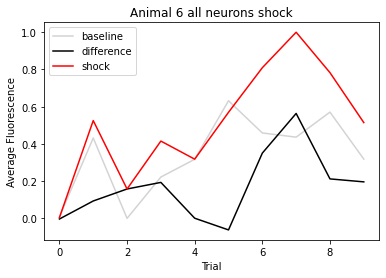

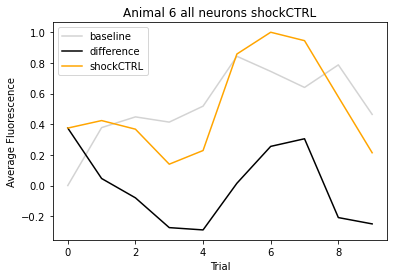

Animal 6 laserHI
All Neurons


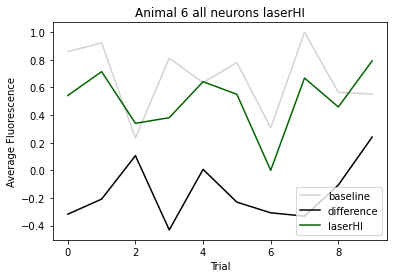

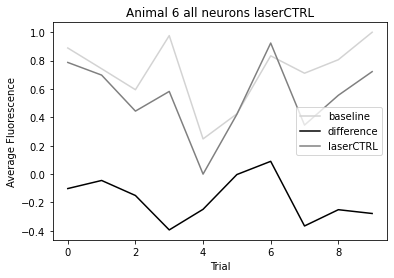

Animal 11 shock
All Neurons


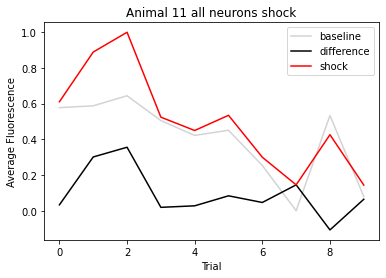

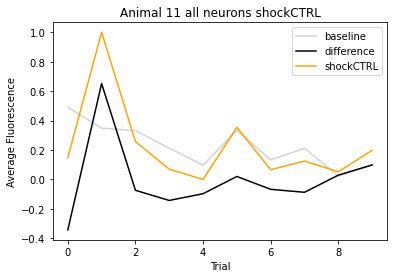

Animal 11 laserHI
All Neurons


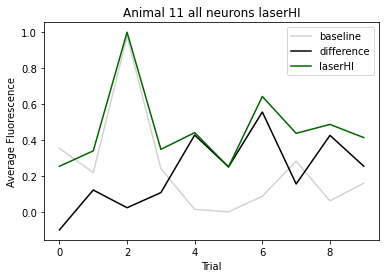

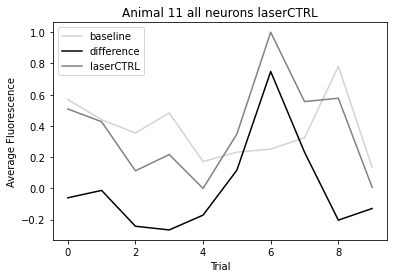

Animal 12 shock
All Neurons


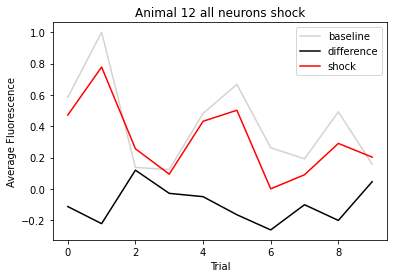

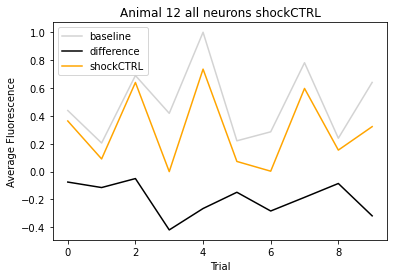

Animal 12 laserHI
All Neurons


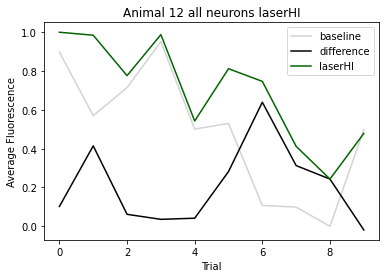

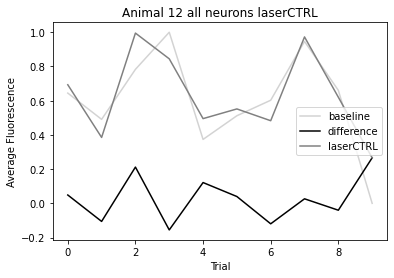

Animal 6 shock
Significant Neurons


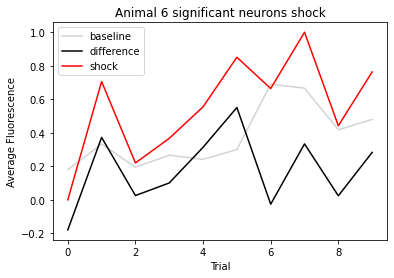

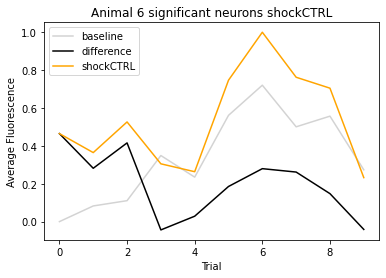

Animal 6 laserHI
Significant Neurons


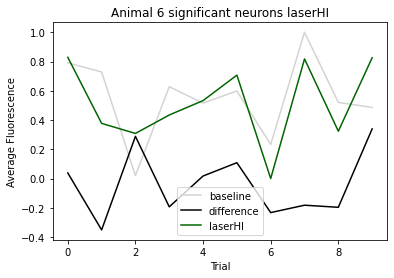

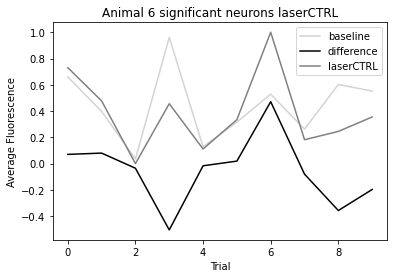

Animal 11 shock
Significant Neurons


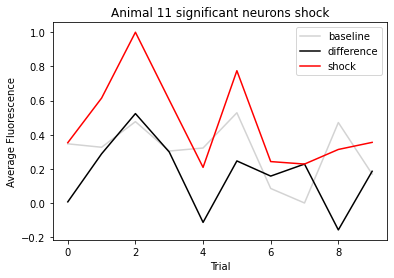

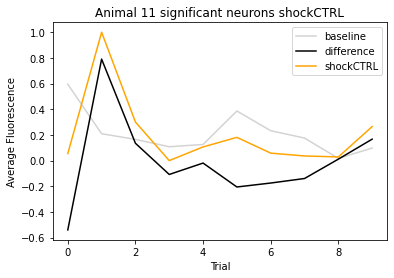

Animal 11 laserHI
Significant Neurons


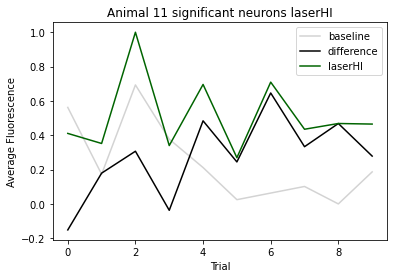

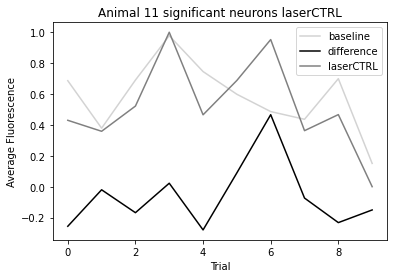

Animal 12 shock
Significant Neurons


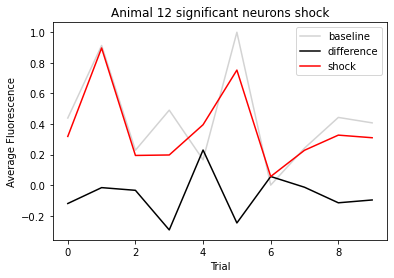

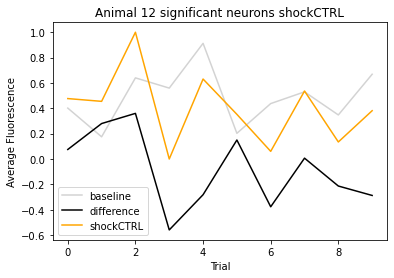

Animal 12 laserHI
Significant Neurons


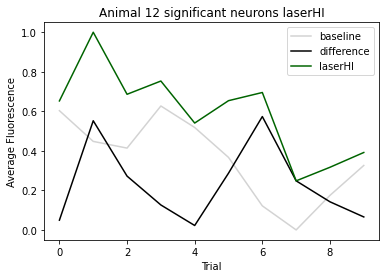

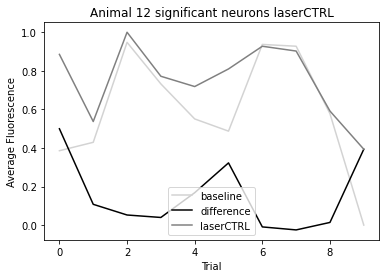

In [72]:
#checking why normalized or none performs worse sometimes (additive vs constant response)
#- Christian's hypothesis for shock is that baseline increases but response remains constant
# t-test for the fluorescence values during baseline of shock vs shockCTRL trials
from scipy import stats
def additive_response_hypothesis(animall,stimm,typee):
    print("Animal " + str(animall) + " " + str(stimm))
    if(typee == "all neurons"):
        print("All Neurons")
        animal = animal_none(animall)
        stim = pd.Series(animal['stimulus'])
        animal = animal.drop(columns = 'stimulus')    
    
        #Mean-Centering happens for time period of all trials from all stimuli
        from sklearn.preprocessing import StandardScaler
        scaled = StandardScaler().fit_transform(animal)
        animal_scaled = pd.DataFrame(scaled, columns = animal.columns)
        animal_scaled['stimulus'] = pd.Series(stim)
        
        if(stimm == "laserHI"):
            temp1 = animal_scaled[animal_scaled["stimulus"]== "laserHI"]
            temp1 = temp1.reset_index(drop = True)
            temp2 = animal_scaled[animal_scaled["stimulus"]== "laserCTRL"]
            temp2 = temp2.reset_index(drop = True)
        if(stimm == "shock"):
            temp1 = animal_scaled[animal_scaled["stimulus"]== "shock"]
            temp1 = temp1.reset_index(drop = True)
            temp2 = animal_scaled[animal_scaled["stimulus"]== "shockCTRL"]
            temp2 = temp2.reset_index(drop = True)
        
        avg_neurons1 = temp1.mean(axis = 1).tolist()
        avg_neurons2 = temp2.mean(axis = 1).tolist()
        avg_base1 = []
        avg_base2 = []
        avg_response1 = []
        avg_response2 = []
        #Averaging baseline values
        for trial in [0,1,2,3,4,5,6,7,8,9]:
            #averaging baseline
            avg_base1.append(sum(avg_neurons1[trial*51:trial*51+25])/len(avg_neurons1[trial*51:trial*51+25]))
            avg_base2.append(sum(avg_neurons2[trial*51:trial*51+25])/len(avg_neurons2[trial*51:trial*51+25]))
            # averaging window [0.1s,2.1s] for laser and [3s,5s] for shock
            if(stimm == 'laserHI'):
                avg_response1.append(sum(avg_neurons1[trial*51+26:trial*51+37])/len(avg_neurons1[trial*51+26:trial*51+37]))
                avg_response2.append(sum(avg_neurons2[trial*51+26:trial*51+37])/len(avg_neurons2[trial*51+26:trial*51+37]))
            elif(stimm == 'shock'):
                avg_response1.append(sum(avg_neurons1[trial*51+40:trial*51+51])/len(avg_neurons1[trial*51+40:trial*51+51]))
                avg_response2.append(sum(avg_neurons2[trial*51+40:trial*51+51])/len(avg_neurons2[trial*51+40:trial*51+51]))
        
        #scaling to [0,1]
        minn1 = min(min(avg_base1),min(avg_response1))
        avg_base1 = [x-minn1 for x in avg_base1]
        avg_response1 = [x-minn1 for x in avg_response1]
        maxx1 = max(max(avg_base1),max(avg_response1))
        avg_base1 = [x/maxx1 for x in avg_base1]
        avg_response1 = [x/maxx1 for x in avg_response1]
        
        #scaling to [0,1]
        minn2 = min(min(avg_base2),min(avg_response2))
        avg_base2 = [x-minn2 for x in avg_base2]
        avg_response2 = [x-minn2 for x in avg_response2]
        maxx2 = max(max(avg_base2),max(avg_response2))
        avg_base2 = [x/maxx2 for x in avg_base2]
        avg_response2 = [x/maxx2 for x in avg_response2]  
        
        avg_diff1 = []
        avg_diff2 = []
        for ind in range(0,len(avg_base1)):
            avg_diff1.append(avg_response1[ind]-avg_base1[ind])
            avg_diff2.append(avg_response2[ind]-avg_base2[ind])
            
        plt.title("Animal " + str(animall) + " " + str(typee) + " " + str(stimm))
        plt.plot(range(0,10),avg_base1,"lightgray", label = "baseline")
        plt.plot(range(0,10),avg_diff1, "black", label = "difference")
        plt.plot(range(0,10),avg_response1,colors.get(stimm), label = stimm)
        plt.xlabel("Trial")
        plt.ylabel("Average Fluorescence")
        plt.legend()
        plt.show()
        
        plt.plot(range(0,10),avg_base2,"lightgray", label = "baseline")
        plt.plot(range(0,10),avg_diff2, "black", label = "difference")
        if(stimm == "shock"):
            plt.title("Animal " + str(animall) + " " + str(typee) + " " + str("shockCTRL"))
            plt.plot(range(0,10),avg_response2,colors.get("shockCTRL"), label = "shockCTRL")
        elif(stimm == "laserHI"):
            plt.title("Animal " + str(animall) + " " + str(typee) + " " + str("laserCTRL"))
            plt.plot(range(0,10),avg_response2,colors.get("laserCTRL"), label = "laserCTRL")
        plt.xlabel("Trial")
        plt.ylabel("Average Fluorescence")
        plt.legend()
        plt.show()
        
    elif(typee == "significant neurons"):
        print("Significant Neurons")
        animal = pd.DataFrame()
        for s in ["1","2","3"]:
            neurons_sig = pd.read_csv("animal" + str(animall) + "_s" + s + "_neurons_significant.csv", index_col = 0)
            stemp = traces_stimulus_reordered[traces_stimulus_reordered['animal'] == int(animall)] 
            stemp = stemp[stemp['s'] == int(s)]
            stemp = stemp.dropna(axis='columns')
            stim = stemp.loc[:,"stimulus"].tolist()
            stemp = stemp.drop(columns = ['animal','s',"stimulus","baseline","index"])
            if(stimm == "shock"):
                keeping = neurons_sig.loc[:,'shock'].tolist()
            elif(stimm == "laserHI"):
                keeping = neurons_sig.loc[:,'laserHI'].tolist()
            keeping = [x for x in keeping if x != np.nan and str(x) != 'nan']
            keeping = [str(int(x)) for x in keeping]
            dropping = list(set(stemp.columns).difference(keeping))
            dropping = [str(x) for x in dropping]
            for elem in dropping:
                stemp = stemp.drop(columns = [elem])
            stemp = stemp.add_suffix('.s' + s)
            stemp = stemp.reset_index(drop=True)
            animal = pd.concat([animal,stemp], axis = 1)
         
        #Mean-Centering
        from sklearn.preprocessing import StandardScaler
        scaled = StandardScaler().fit_transform(animal)
        animal_scaled = pd.DataFrame(scaled, columns = animal.columns)
        animal_scaled['stimulus'] = pd.Series(stim) 
        
        if(stimm == "laserHI"):
            temp1 = animal_scaled[animal_scaled["stimulus"]== "laserHI"]
            temp1 = temp1.reset_index(drop = True)
            temp2 = animal_scaled[animal_scaled["stimulus"]== "laserCTRL"]
            temp2 = temp2.reset_index(drop = True)
        if(stimm == "shock"):
            temp1 = animal_scaled[animal_scaled["stimulus"]== "shock"]
            temp1 = temp1.reset_index(drop = True)
            temp2 = animal_scaled[animal_scaled["stimulus"]== "shockCTRL"]
            temp2 = temp2.reset_index(drop = True)
        
        avg_neurons1 = temp1.mean(axis = 1).tolist()
        avg_neurons2 = temp2.mean(axis = 1).tolist()
        avg_base1 = []
        avg_base2 = []
        avg_response1 = []
        avg_response2 = []
        #Averaging baseline values
        for trial in [0,1,2,3,4,5,6,7,8,9]:
            #averaging baseline
            avg_base1.append(sum(avg_neurons1[trial*51:trial*51+25])/len(avg_neurons1[trial*51:trial*51+25]))
            avg_base2.append(sum(avg_neurons2[trial*51:trial*51+25])/len(avg_neurons2[trial*51:trial*51+25]))
            # averaging window [0.1s,2.1s] for laser and [3s,5s] for shock
            if(stimm == 'laserHI'):
                avg_response1.append(sum(avg_neurons1[trial*51+26:trial*51+37])/len(avg_neurons1[trial*51+26:trial*51+37]))
                avg_response2.append(sum(avg_neurons2[trial*51+26:trial*51+37])/len(avg_neurons2[trial*51+26:trial*51+37]))
            elif(stimm == 'shock'):
                avg_response1.append(sum(avg_neurons1[trial*51+40:trial*51+51])/len(avg_neurons1[trial*51+40:trial*51+51]))
                avg_response2.append(sum(avg_neurons2[trial*51+40:trial*51+51])/len(avg_neurons2[trial*51+40:trial*51+51]))
        
        #scaling to [0,1]
        minn1 = min(min(avg_base1),min(avg_response1))
        avg_base1 = [x-minn1 for x in avg_base1]
        avg_response1 = [x-minn1 for x in avg_response1]
        maxx1 = max(max(avg_base1),max(avg_response1))
        avg_base1 = [x/maxx1 for x in avg_base1]
        avg_response1 = [x/maxx1 for x in avg_response1]
        
        #scaling to [0,1]
        minn2 = min(min(avg_base2),min(avg_response2))
        avg_base2 = [x-minn2 for x in avg_base2]
        avg_response2 = [x-minn2 for x in avg_response2]
        maxx2 = max(max(avg_base2),max(avg_response2))
        avg_base2 = [x/maxx2 for x in avg_base2]
        avg_response2 = [x/maxx2 for x in avg_response2]  
        
        avg_diff1 = []
        avg_diff2 = []
        for ind in range(0,len(avg_base1)):
            avg_diff1.append(avg_response1[ind]-avg_base1[ind])
            avg_diff2.append(avg_response2[ind]-avg_base2[ind])
            
        plt.title("Animal " + str(animall) + " " + str(typee) + " " + str(stimm))
        plt.plot(range(0,10),avg_base1,"lightgray", label = "baseline")
        plt.plot(range(0,10),avg_diff1, "black", label = "difference")
        plt.plot(range(0,10),avg_response1,colors.get(stimm), label = stimm)
        plt.xlabel("Trial")
        plt.ylabel("Average Fluorescence")
        plt.legend()
        plt.show()
        
        plt.plot(range(0,10),avg_base2,"lightgray", label = "baseline")
        plt.plot(range(0,10),avg_diff2, "black", label = "difference")
        if(stimm == "shock"):
            plt.title("Animal " + str(animall) + " " + str(typee) + " " + str("shockCTRL"))
            plt.plot(range(0,10),avg_response2,colors.get("shockCTRL"), label = "shockCTRL")
        elif(stimm == "laserHI"):
            plt.title("Animal " + str(animall) + " " + str(typee) + " " + str("laserCTRL"))
            plt.plot(range(0,10),avg_response2,colors.get("laserCTRL"), label = "laserCTRL")
        plt.xlabel("Trial")
        plt.ylabel("Average Fluorescence")
        plt.legend()
        plt.show()
        
        
 
for typee in ["all neurons","significant neurons"]:
    for animall in [6,11,12]:
        for stim in ["shock","laserHI"]:
            additive_response_hypothesis(animall,stim,typee)
    
      #

In [ ]:
#for animal 11, check if shock happens more often next to each other so that it would increase predictability
#and explain why before stimulus model performs well
for animall in [6,11,12]:  
    shocks = pd.read_csv('animal' + str(animall) + "_s1_shock.csv", header = None)
    CTRL = pd.read_csv('animal' + str(animall) + "_s1_shockCTRL.csv", header = None)
    plt.title("Animal " + str(animall))
    plt.scatter(shocks.loc[:,0],[0,0,0,0,0,0,0,0,0,0], c = "red")
    plt.scatter(CTRL.loc[:,0],[0,0,0,0,0,0,0,0,0,0], c = "orange")
    plt.show()
    

In [15]:
# Cross Modalities!!!


#time window that most robustly represents shock and laser - 2 second intervals
window_shock = [38,39,40,41,42,43,44,45,46,47,48,49] # (+2.5s,+4.5s)
window_laser = [26,27,28,29,30,31,32,33,34,35,36,37] # (+0.2s,+2.2s)
order_trials = ["shock","shockCTRL","laserHI","laserLO","laserCTRL","squeak","squeakCTRL"]
def averaging_window_shock(animall, typee):
    if(typee == 'none'):
        df = animal_none(animall)
    elif(typee == 'normalized'):
        df = animal_normalized(animall)
    df = df.drop(columns = "stimulus")
    df = df.astype("float")
    #Mean-Centering happens for time period of all trials from all stimuli
    from sklearn.preprocessing import StandardScaler
    scaled = StandardScaler().fit_transform(df)
    df_scaled = pd.DataFrame(scaled, columns = df.columns)
    averaged = pd.DataFrame(index = range(0,70), columns = df.columns)
    for trial in range(0,70):
        averaged.iloc[trial] = 0
        for neuron in df_scaled.columns:
            for frame in window_shock:
                averaged.at[trial,neuron] = averaged.loc[trial,neuron] + df_scaled.at[trial*51+frame,neuron]
            averaged.at[trial,neuron] = averaged.at[trial,neuron]/len(window_shock)
    for stim_type in [0,1,2,3,4,5,6]:
        averaged.loc[stim_type*10:stim_type*10+10,"stimulus"] = order_trials[stim_type]
    return averaged
def averaging_window_laser(animall, typee):
    if(typee == 'none'):
        df = animal_none(animall)
    elif(typee == 'normalized'):
        df = animal_normalized(animall)
    df = df.drop(columns = "stimulus")
    df = df.astype("float")
    #Mean-Centering happens for time period of all trials from all stimuli
    from sklearn.preprocessing import StandardScaler
    scaled = StandardScaler().fit_transform(df)
    df_scaled = pd.DataFrame(scaled, columns = df.columns)
    averaged = pd.DataFrame(index = range(0,70), columns = df.columns)
    for trial in range(0,70):
        averaged.iloc[trial] = 0
        for neuron in df_scaled.columns:
            for frame in window_laser:
                averaged.at[trial,neuron] = averaged.loc[trial,neuron] + df_scaled.at[trial*51+frame,neuron]
            averaged.at[trial,neuron] = averaged.at[trial,neuron]/len(window_laser)
    for stim_type in [0,1,2,3,4,5,6]:
        averaged.loc[stim_type*10:stim_type*10+10,"stimulus"] = order_trials[stim_type]
    return averaged
print(averaging_window_shock(6,'none'))



         0.s1       1.s1      2.s1      3.s1       4.s1       5.s1      6.s1  \
0    -0.58179   0.271996 -0.771877 -0.735155   -0.50774  0.0357148  -0.80548   
1   -0.581998   0.882966 -0.191085 -0.825515  -0.425986  -0.687304 -0.808529   
2   -0.581879  -0.593036 -0.522729 -0.595653   0.071635   -0.30123 -0.676216   
3     1.01107   0.145002 -0.658313 -0.614326   -0.16592  0.0364289 -0.166478   
4    -0.54076  -0.427906 -0.784816 -0.353244  -0.721016    0.32366 -0.583053   
..        ...        ...       ...       ...        ...        ...       ...   
65    1.56663  -0.410993  0.258729 -0.200476   -0.11814   -0.54819  -0.22847   
66 -0.0350847    1.43752  0.455011  -0.37102  0.0382955  0.0294158 -0.630055   
67    1.54228    1.11488  -0.41378  0.933692  -0.594583  -0.623542 -0.654107   
68  -0.366638 -0.0891009   1.83537 -0.290166  -0.344658    1.75935 -0.764109   
69   0.511176   0.256523   2.33883 -0.125771  -0.385007    4.47425  -0.38554   

         7.s1       8.s1       9.s1  ..

In [24]:
def PLSR_averaged_window(stim_model, animall, typee, n_components, start, stop):
    if(stim_model == "shock"):
        animal_scaled = averaging_window_shock(animall,typee)
    elif(stim_model == "laserHI"):
        animal_scaled = averaging_window_laser(animall,typee)   
    
    if(stim_model == 'shock'):
        # go for 1s and 0s for shock
        temp1 = animal_scaled[animal_scaled['stimulus'] == 'shock']
        temp2 = animal_scaled[animal_scaled['stimulus'] == 'shockCTRL']
        temp1 = temp1.reset_index(drop = True)
        temp2 = temp2.reset_index(drop = True)
        temp = pd.concat([temp1,temp2])
        temp = temp.drop(columns = 'stimulus')
        X_model = np.array(temp)
        #10 trials of shock, then 10 trials of shockCTRL
        values = shock_significant_trials_values(str(animall),typee, start, stop)
        y = np.zeros([20,1])
        for trial in [0,1,2,3,4,5,6,7,8,9]:
            y[trial,0] = 1 #values.at[trial,"shock"]
        for trial in [10,11,12,13,14,15,16,17,18,19]:
            y[trial,0] = 0 #values.at[trial-10,"shockCTRL"]  
    elif(stim_model == "laserHI"):
        temp1 = animal_scaled[animal_scaled['stimulus'] == 'laserHI']
        temp2 = animal_scaled[animal_scaled['stimulus'] == 'laserLO']
        temp3 = animal_scaled[animal_scaled['stimulus'] == 'laserCTRL']
        temp = pd.concat([temp1,temp2,temp3])
        temp = temp.drop(columns = 'stimulus')
        X_model = np.array(temp)
        #10 trials of laserHI, then 10 trials of laserLO, then 10 of laserCTRL
        values = laserHI_significant_trials_values(str(animall),typee, start, stop)
        y = np.zeros([30,1])
        for trial in [0,1,2,3,4,5,6,7,8,9]:
            y[trial,0] = values.at[trial,"laserHI"]
        for trial in [10,11,12,13,14,15,16,17,18,19]:
            y[trial,0] = values.at[trial-10,"laserLO"]
        for trial in [20,21,22,23,24,25,26,27,28,29]:
            y[trial,0] = values.at[trial-20,"laserCTRL"]
            
    pls = PLSRegression(n_components=n_components) 
    pls.fit(X_model,y)
    
    return X_model,y,pls,pls.x_weights_

PLSR_averaged_window("shock", 11, "normalized", 3, 25, 25)
    
    

(array([[5.916095844482797, 0.0958523065123816, -0.6626407562834902, ...,
         -0.3481232007253927, 5.636046760746999, 1.0744011608591515],
        [1.5351131888928142, 0.9431807459388706, 1.6965758652733378, ...,
         0.41642759164289594, -3.6377144533148926, 0.7886840518684598],
        [1.6487903679862523, 0.21543036905230603, 0.4491866826741336, ...,
         0.01903021478186844, 1.3533074383129822, 0.16954994890027553],
        ...,
        [0.5664435316023271, -2.047913350418801, -4.071945605189285, ...,
         -0.4705099971697926, -0.31752888068209323, 0.16798905964426933],
        [0.09274604340372038, 0.25676123794365185, 0.6162786902635201,
         ..., -2.1903784987380424, -1.2193864945066897,
         -0.1811156656993457],
        [0.9223923578073648, 0.3895761746677416, -0.7857033945597052, ...,
         -0.8027146344383023, -0.28557371364999623, 0.81664090075564]],
       dtype=object),
 array([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
     

In [25]:
def PLSR_testing_crossmodalities(stim_model, animall, typee, n_components, start, stop):
    
    # time point doesnt matter here
    _,_,pls,_ = PLSR_averaged_window(stim_model, animall, typee, n_components, start, stop)
        
    if(typee == 'none'):
        animal = animal_none(animall)
    elif(typee == 'normalized'):
        animal = animal_normalized(animall)
    
    stim = pd.Series(animal['stimulus'])
    animal = animal.drop(columns = 'stimulus')    
    
    #Mean-Centering happens for time period of all trials from all stimuli
    from sklearn.preprocessing import StandardScaler
    scaled = StandardScaler().fit_transform(animal)
    animal_scaled = pd.DataFrame(scaled, columns = animal.columns)
    animal_scaled['stimulus'] = pd.Series(stim)
    animal_scaled = animal_scaled[animal_scaled["stimulus"].isin(["shock","shockCTRL","laserHI","laserLO","laserCTRL"])]
    
    animal_scaled = animal_scaled.drop(columns = "stimulus")
    X_test = np.array(animal_scaled)
    
    
    X_shock_window,_,_,_ = PLSR_averaged_window("shock", animall, typee, n_components, start, stop)
    X_laser_window,_,_,_ = PLSR_averaged_window("laserHI", animall, typee, n_components, start, stop)
    X_window = np.concatenate((X_shock_window,X_laser_window), axis = 0)
    
    
    #after discussion with Leo, we keep X x loadings to be the projection onto the latent component
    loadings = pls.x_loadings_
    
    LX_window = np.dot(X_window,loadings)
    
    LX_test = np.dot(X_test,loadings)
    #x_scores_test = pls.transform(X_test)

    
    return LX_test,LX_window
            
PLSR_testing_crossmodalities("shock", animall, typee, comp, 30, 40)

(array([[-1.21925642,  4.54393712,  9.77009435],
        [-0.95012632,  4.4288283 ,  9.63478711],
        [-0.70794774,  4.20205311,  9.51969391],
        ...,
        [ 1.65527754, -1.47099301, -0.78777922],
        [ 1.77479633, -1.61698992, -0.59865006],
        [ 2.02543947, -1.73859907, -0.51757005]]),
 array([[10.61123983452872, 3.946237504769929, 15.5075173797904],
        [11.933435755360849, -7.83800466047767, 7.644846618795892],
        [10.394150371359201, -1.6808947418905973, 0.8561990606902401],
        [7.136527267104269, 8.158840307677043, 2.1022759737532155],
        [12.765859351100907, -5.664309851219524, 3.04620809595368],
        [15.806666180055304, -15.636880445304671, -1.2589245246400256],
        [2.8913346206242974, 9.090289256582755, -7.762499338956308],
        [5.72012664541682, 3.1620530010053347, -10.274588621839696],
        [7.2187742968670845, 4.184647266398367, -3.8195854868071413],
        [8.030062522337438, 5.626792951062916, 3.7363644115912145],
  

Pearson Correlation: x axis vs y axis - Shocks: r =  -0.02
Pearson Correlation: x axis vs y axis - Lasers: r =   0.02
Wilcoxon Signed-rank: Shock vs ShockCTRL on Laser Axis: p =  1.00
Wilcoxon Signed-rank: LaserHI vs LaserCTRL on Shock Axis: p =  0.62


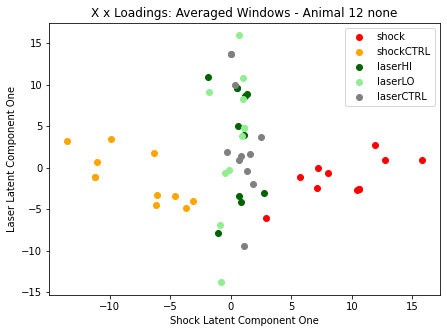

Pearson Correlation: x axis vs y axis - Shocks: r =  0.48
Pearson Correlation: x axis vs y axis - Lasers: r =   0.84
Wilcoxon Signed-rank: Shock vs ShockCTRL on Laser Axis: p =  0.23
Wilcoxon Signed-rank: LaserHI vs LaserCTRL on Shock Axis: p =  0.13


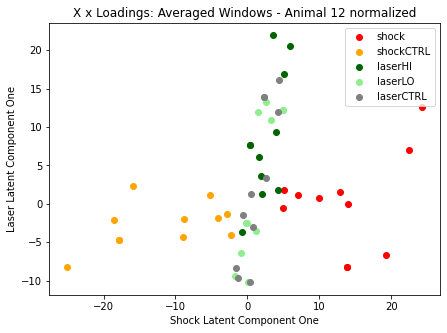

In [26]:
# Cross Modalities - averaged windows
# Testing 
from scipy import stats
comp = 3 # number of components to keep
for typee in ["none","normalized"]: # "normalized"
    for animall in [12]:#11,12
    
        # start stop can be changes depending on how models perform
        # only animal 11 has both good
        if(typee == "none"):
            _,LX_window_shock = PLSR_testing_crossmodalities("shock", animall, typee, comp, 45, 50)
            _,LX_window_laser = PLSR_testing_crossmodalities("laserHI", animall, typee, comp, 45, 50)
        elif(typee == "normalized"):
            _,LX_window_shock = PLSR_testing_crossmodalities("shock", animall, typee, comp, 30, 40)
            _,LX_window_laser = PLSR_testing_crossmodalities("laserHI", animall, typee, comp, 30, 40)
            
        
        #Flipping signs of loadings when necessary
        if(LX_window_laser[20:30,0].mean() < 0):
            LX_window_laser = LX_window_laser * -1
        if(LX_window_shock[0:10,0].mean() < 0):
            LX_window_shock = LX_window_shock * -1
        
        plt.figure(figsize = (7,5))
            
        r,_ = pearsonr(LX_window_laser[0:20,0],LX_window_shock[0:20,0])
        print("Pearson Correlation: x axis vs y axis - Shocks: r = ", "{:.2f}".format(r))
        
        r,_ = pearsonr(LX_window_laser[20:50,0],LX_window_shock[20:50,0])
        print("Pearson Correlation: x axis vs y axis - Lasers: r =  ", "{:.2f}".format(r))
        
        #The paired t–test assumes that the differences between pairs are normally distributed???
        #_,p = stats.shapiro(LX_window_laser[0:10,0])
        #print("Shapiro Normality Test Shock on Laser Axis: p = ", "{:.2f}".format(p))
        #_,p = stats.shapiro(LX_window_laser[10:20,0])
        #print("Shapiro Normality Test ShockCTRL on Laser Axis: p = ", "{:.2f}".format(p))
        _,p = stats.wilcoxon(LX_window_laser[0:10,0], LX_window_laser[10:20,0])
        print("Wilcoxon Signed-rank: Shock vs ShockCTRL on Laser Axis: p = ", "{:.2f}".format(p))
        
        #_,p = stats.shapiro(LX_window_shock[20:30,0])
        #print("Shapiro Normality Test LaserHI on Shock Axis: p = ", "{:.2f}".format(p))
        #_,p = stats.shapiro(LX_window_shock[30:40,0])
        #print("Shapiro Normality Test LaserLO on Shock Axis: p = ", "{:.2f}".format(p))
        #_,p = stats.shapiro(LX_window_shock[40:50,0])
        #print("Shapiro Normality Test LaserCTRL on Shock Axis: p = ", "{:.2f}".format(p))
        _,p = stats.wilcoxon(LX_window_shock[20:30,0], LX_window_shock[40:50,0])
        print("Wilcoxon Signed-rank: LaserHI vs LaserCTRL on Shock Axis: p = ", "{:.2f}".format(p))
            
        for trial in range(0,50):
            plt.scatter(LX_window_shock[trial,0],LX_window_laser[trial,0], color = colors.get(order_trials[int(trial/10)]))
            if(trial % 10 == 0):
                plt.scatter(LX_window_shock[trial,0],LX_window_laser[trial,0], label = order_trials[int(trial/10)], color = colors.get(order_trials[int(trial/10)]))
        
        plt.legend()     
        plt.xlabel("Shock Latent Component One")
        plt.ylabel("Laser Latent Component One")
        plt.title("X x Loadings: Averaged Windows - Animal " + str(animall) + " " + str(typee))
        plt.show()
        
           



P-values Animal 6 normalized


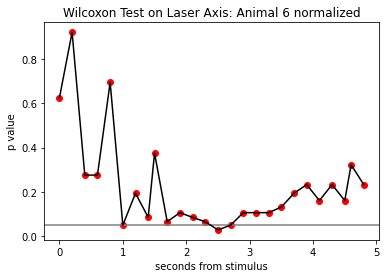

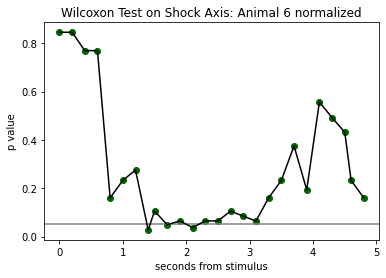


Paired T-Test all points Shock vs ShockCTRL on Laser axis: p =  0.00

Paired T-Test all points laserHI vs laserCTRL on Shock Axis: p =  0.00

Pearson r - x axis vs y axis for all Shocks 0.19
Pearson r - x axis vs y axis for all Lasers 0.34


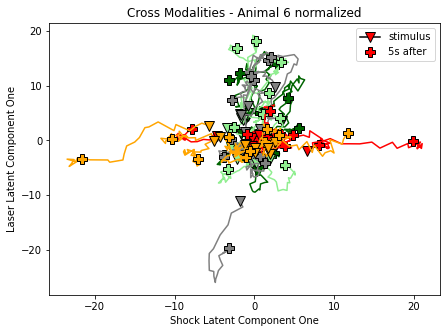

P-values Animal 11 normalized


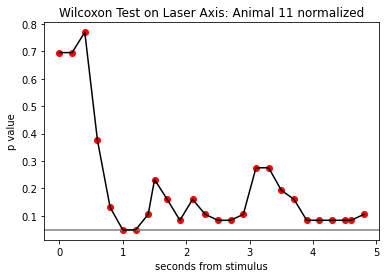

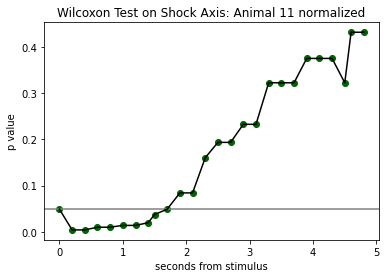


Paired T-Test all points Shock vs ShockCTRL on Laser axis: p =  0.00

Paired T-Test all points laserHI vs laserCTRL on Shock Axis: p =  0.00

Pearson r - x axis vs y axis for all Shocks 0.94
Pearson r - x axis vs y axis for all Lasers 0.94


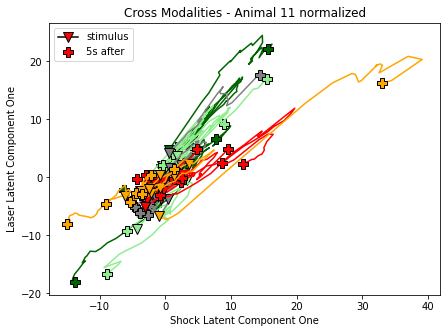

P-values Animal 12 normalized


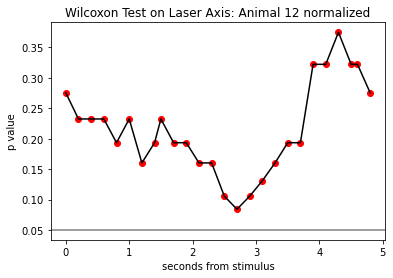

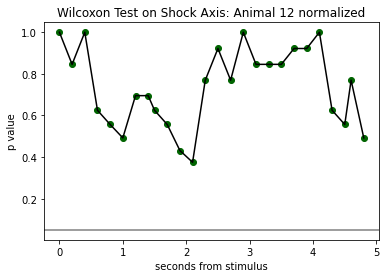


Paired T-Test all points Shock vs ShockCTRL on Laser axis: p =  0.00

Paired T-Test all points laserHI vs laserCTRL on Shock Axis: p =  0.03

Pearson r - x axis vs y axis for all Shocks -0.21
Pearson r - x axis vs y axis for all Lasers -0.46


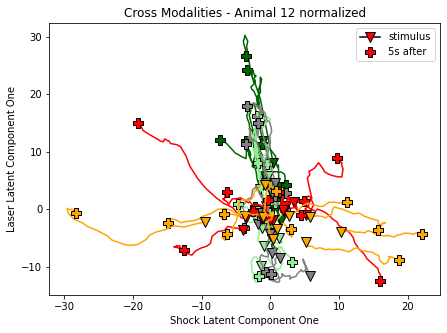

P-values Animal 6 none


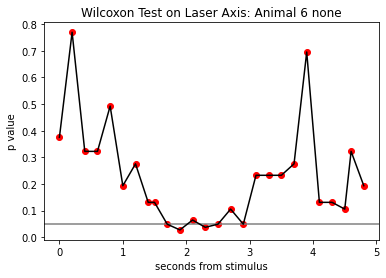

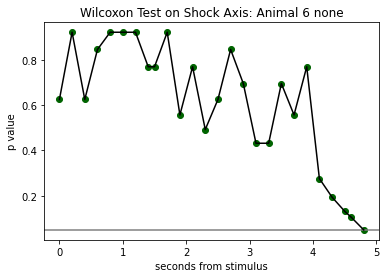


Paired T-Test all points Shock vs ShockCTRL on Laser axis: p =  0.00

Paired T-Test all points laserHI vs laserCTRL on Shock Axis: p =  0.18

Pearson r - x axis vs y axis for all Shocks 0.67
Pearson r - x axis vs y axis for all Lasers 0.65


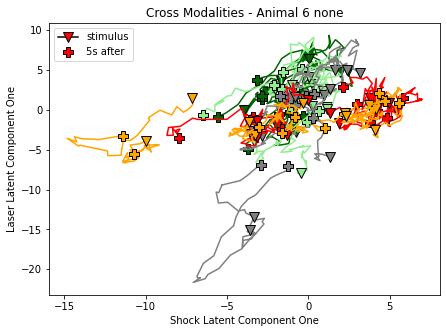

P-values Animal 11 none


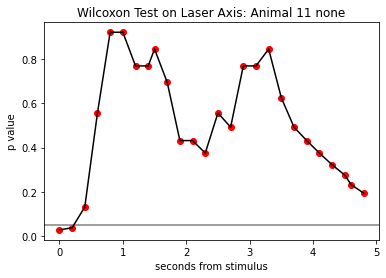

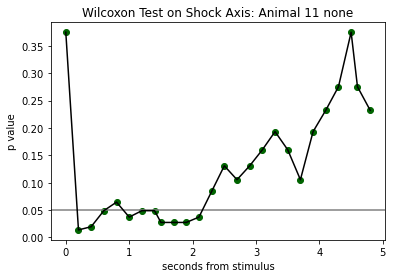


Paired T-Test all points Shock vs ShockCTRL on Laser axis: p =  0.13

Paired T-Test all points laserHI vs laserCTRL on Shock Axis: p =  0.00

Pearson r - x axis vs y axis for all Shocks 0.94
Pearson r - x axis vs y axis for all Lasers 0.96


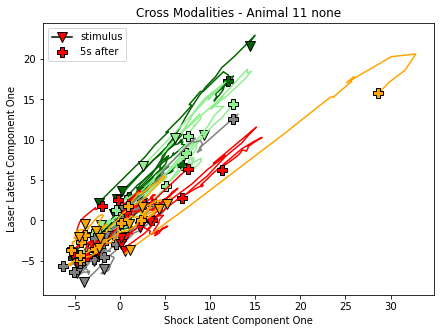

P-values Animal 12 none


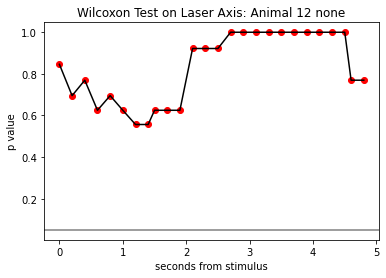

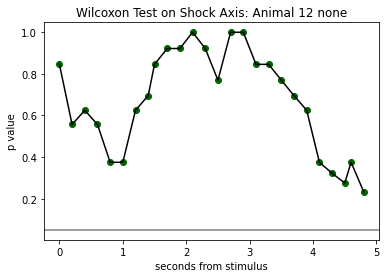


Paired T-Test all points Shock vs ShockCTRL on Laser axis: p =  0.45

Paired T-Test all points laserHI vs laserCTRL on Shock Axis: p =  0.01

Pearson r - x axis vs y axis for all Shocks -0.89
Pearson r - x axis vs y axis for all Lasers -0.77


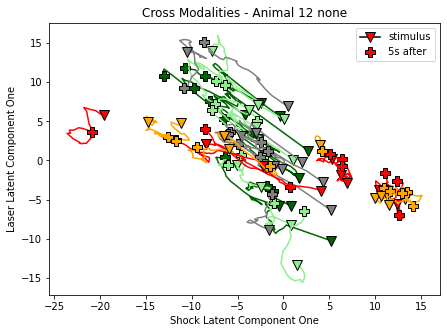

In [31]:
# "None" traces
# Cross modalities - all trials
pd.options.display.float_format = "{:,.2f}".format
for typee in ["normalized", "none"]: #"normalized"
    for animall in [6,11,12]: #11,12
        if(typee == "none"):
            #only animal 11 has both good
            LX_shock, _ = PLSR_testing_crossmodalities("shock", animall, typee, 3, 25, 45)
            LX_laser, _ = PLSR_testing_crossmodalities("laserHI", animall, typee, 3, 25, 50)
        elif(typee == "normalized"):
            #only animal 11 has both good
            LX_shock, _ = PLSR_testing_crossmodalities("shock", animall, typee, 3, 30, 45)
            LX_laser, _ = PLSR_testing_crossmodalities("laserHI", animall, typee, 3, 25, 45)
        
        #Flipping signs of loadings when necessary
        if(LX_laser[20*51:30*51,0].mean() < 0):
            LX_laser = LX_laser * -1
        if(LX_shock[0*51:10*51,0].mean() < 0):
            LX_shock = LX_shock * -1
            
        #Statistics Test on Trajectories
        #Var1: for each time point
        time_stim = []
        pvals = pd.DataFrame(index = range(25,51),columns = ["Normality Shock","Normality ShockCTRL","Wilcoxon Test"])
        for time_point in range(25,51):
            time_stim.append(float("{0:.1f}".format((time_point-25) / fps)))
            shocks = []
            shockCTRL = []
            for trial in range(0,10):
                shocks.append(LX_laser[trial*51+time_point,0])
            for trial in range(10,20):
                shockCTRL.append(LX_laser[trial*51+time_point,0])
            _,p = stats.shapiro(shocks)
            pvals.at[time_point,"Normality Shock"] = p
            _,p = stats.shapiro(shockCTRL)
            pvals.at[time_point,"Normality ShockCTRL"] = p
            _,p = stats.wilcoxon(shocks, shockCTRL)
            pvals.at[time_point,"Wilcoxon Test"] = p
        print("P-values Animal " + str(animall) + " " + str(typee))
        #print(pvals)
        #Doing Wilcoxon Signed Rank Test (some time_points are normal, some are not - same test for all)
        plt.axhline(0.05, c = "gray")
        plt.plot(time_stim,pvals["Wilcoxon Test"],"black")
        plt.scatter(time_stim,pvals["Wilcoxon Test"],color = colors.get("shock"))
        plt.title("Wilcoxon Test on Laser Axis: Animal " + str(animall) + " " + str(typee))
        plt.ylabel("p value")
        plt.xlabel("seconds from stimulus")
        plt.show()
        
        pvals = pd.DataFrame(index = range(25,51),columns = ["Normality LaserHI","Normality LaserCTRL","Wilcoxon Test"])
        for time_point in range(25,51):
            laser = []
            laserCTRL = []
            for trial in range(20,30):
                laser.append(LX_shock[trial*51+time_point,0])
            for trial in range(40,50):
                laserCTRL.append(LX_shock[trial*51+time_point,0])
            _,p = stats.shapiro(laser)
            pvals.at[time_point,"Normality LaserHI"] = p
            _,p = stats.shapiro(laserCTRL)
            pvals.at[time_point,"Normality LaserCTRL"] = p
            _,p = stats.wilcoxon(laser, laserCTRL)
            pvals.at[time_point,"Wilcoxon Test"] = p
        #print(pvals) 
        plt.axhline(0.05, c = "gray")
        plt.plot(time_stim,pvals["Wilcoxon Test"],"black")
        plt.scatter(time_stim,pvals["Wilcoxon Test"],color = colors.get("laserHI"))
        plt.title("Wilcoxon Test on Shock Axis: Animal " + str(animall) + " " + str(typee))
        plt.ylabel("p value")
        plt.xlabel("seconds from stimulus")
        plt.show()
        
        #Var2 everything (all trials and timepoints of a certain stimulus put together in the same sample)
        shocks = []
        shockCTRL = []
        for time_point in range(25,51):
            for trial in range(0,10):
                shocks.append(LX_laser[trial*51+time_point,0])
            for trial in range(10,20):
                shockCTRL.append(LX_laser[trial*51+time_point,0])
        
        #_,p = stats.shapiro(shocks)
        #print("")
        #print("Shapiro Normality Test Shock on Laser Axis: p = ", "{:.2f}".format(p))
        #_,p = stats.shapiro(shockCTRL)
        #print("")
        #print("Shapiro Normality Test ShockCTRL on Laser Axis: p = ", "{:.2f}".format(p))
        #_,p = stats.wilcoxon(shocks, shockCTRL)
        #print("")
        #print("Wilcoxon Signed-rank Test Shock vs ShockCTRL: p = ", "{:.2f}".format(p))
        _,p = stats.ttest_rel(shocks, shockCTRL)
        print("")
        print("Paired T-Test all points Shock vs ShockCTRL on Laser axis: p = ", "{:.2f}".format(p))
        
        laser = []
        laserCTRL = []
        for time_point in range(25,51):
            for trial in range(20,30):
                laser.append(LX_shock[trial*51+time_point,0])
            for trial in range(40,50):
                laserCTRL.append(LX_shock[trial*51+time_point,0])
        # Data is generally normal distribution
        #_,p = stats.shapiro(laser)
        #print("Shapiro Normality Test laserHI on Shock Axis: p = ", "{:.2f}".format(p))
        #_,p = stats.shapiro(laserCTRL)
        print("")
        #print("Shapiro Normality Test laserCTRL on Shock Axis: p = ", "{:.2f}".format(p))
        #_,p = stats.wilcoxon(laser, laserCTRL)
        #print("")
        #print("Wilcoxon Signed-rank Test laserHI vs laserCTRL: p = ", "{:.2f}".format(p))
        _,p = stats.ttest_rel(laser, laserCTRL)
        print("Paired T-Test all points laserHI vs laserCTRL on Shock Axis: p = ", "{:.2f}".format(p))
        
        #Var 3: Per Trial - Skip this one- Not necessary
        #pvals = []
        # time points taken in an interval from 25 to 50 - stimulus on onward
        #for trial in range(0,10):
        #    shocks = LX_laser[trial*51+25:trial*51+51,0]
        #    shockCTRL = LX_laser[(10+trial)*51+25:(10+trial)*51+51,0]
        #    #_,p = stats.shapiro(shocks)
        #    #print("Shapiro Normality Test Shock on Laser Axis: p = ", "{:.2f}".format(p))
        #    #_,p = stats.shapiro(shockCTRL)
        #    #print("Shapiro Normality Test ShockCTRL on Laser Axis: p = ", "{:.2f}".format(p))
        #    _,p = stats.wilcoxon(shocks, shockCTRL)
        #    #print("")
        #    #print("Wilcoxon Signed-rank Test Shock vs ShockCTRL: p = ", "{:.2f}".format(p))
        #    pvals.append(p)
            
        #plt.axhline(0.05, c = "gray")
        #plt.plot(range(0,10),pvals,"black")
        #plt.scatter(range(0,10),pvals,color = colors.get("shock"))
        #plt.title("Wilcoxon Test on Laser Axis: Animal " + str(animall) + " " + str(typee))
        #plt.ylabel("p value")
        #plt.xlabel("trial number")
        #plt.show()
        
        #pvals = []
        #for trial in range(20,30):
        #    laser = LX_shock[trial*51+25:trial*51+51,0]
        #    laserCTRL = LX_shock[(20+trial)*51+25:(20+trial)*51+51,0]
        #    #_,p = stats.shapiro(laser)
        #    #print("Shapiro Normality Test Laser on Shock Axis: p = ", "{:.2f}".format(p))
        #    #_,p = stats.shapiro(laserCTRL)
        #    #print("Shapiro Normality Test LaserCTRL on Shock Axis: p = ", "{:.2f}".format(p))
        #    _,p = stats.wilcoxon(laser, laserCTRL)
        #    #print("")
        #    #print("Wilcoxon Signed-rank Test on shock axis: p = ", "{:.2f}".format(p))
        #    pvals.append(p)
        
        #dd1 = pd.DataFrame(index = range(0,10), columns = range(25,51))
        #for trial in range(0,10):
        #    for time_point in range(25,51):
        #        dd1.at[trial,time_point] = LX_laser[trial*51+time_point,0]
        #dd1.to_csv("Statistics_trials.csv")
            
        #plt.axhline(0.05, c = "gray")
        #plt.plot(range(0,10),pvals,"black")
        #plt.scatter(range(0,10),pvals,color = colors.get("laserHI"))
        #plt.title("Wilcoxon Test on Shock Axis: Animal " + str(animall) + " " + str(typee))
        #plt.ylabel("p value")
        #plt.xlabel("trial number")
        #plt.show()
            
            
        
        #Pearsonr correlation - for also before stimulus?
        # We know data is normal (for whole trials)
        shocks_X = []
        shocks_Y = []
        for time_point in range(25,51):
            for trial in range(0,20):
                shocks_X.append(LX_shock[trial*51+time_point,0])
                shocks_Y.append(LX_laser[trial*51+time_point,0])
        r,_ = stats.pearsonr(shocks_X,shocks_Y)
        print("")
        print("Pearson r - x axis vs y axis for all Shocks", "{:.2f}".format(r))

        lasers_X = []
        lasers_Y = []
        for time_point in range(25,51):
            for trial in range(20,50):
                lasers_X.append(LX_shock[trial*51+time_point,0])
                lasers_Y.append(LX_laser[trial*51+time_point,0])
        r,_ = stats.pearsonr(lasers_X,lasers_Y)
        print("Pearson r - x axis vs y axis for all Lasers", "{:.2f}".format(r))
        
            
        plt.figure(figsize = (7,5))
        for trial in range(20,50):
            #plt.plot(LX_shock[trial*51:trial*51+51,0],LX_laser[trial*51:trial*51+51,0], color = colors.get(order_trials[int(trial/10)]))
            plt.plot(LX_shock[trial*51+25:trial*51+51,0],LX_laser[trial*51+25:trial*51+51,0], color = colors.get(order_trials[int(trial/10)]))
            #plt.plot(LX_shock[trial*51,0], LX_laser[trial*51,0], 'o', ms=10, c='black', label = 'before', mfc=colors.get(order_trials[int(trial/10)]))  
            plt.plot(LX_shock[trial*51+25,0], LX_laser[trial*51+25,0], '-v', ms=10, c='black', mfc=colors.get(order_trials[int(trial/10)]))
            plt.plot(LX_shock[trial*51+50,0], LX_laser[trial*51+50,0], 'P', ms=10, c='black', mfc=colors.get(order_trials[int(trial/10)])) 
            
        for trial in range(0,20):
            #plt.plot(LX_shock[trial*51:trial*51+51,0],LX_laser[trial*51:trial*51+51,0], color = colors.get(order_trials[int(trial/10)]))
            plt.plot(LX_shock[trial*51+25:trial*51+51,0],LX_laser[trial*51+25:trial*51+51,0], color = colors.get(order_trials[int(trial/10)]))
            #plt.plot(LX_shock[trial*51,0], LX_laser[trial*51,0], 'o', ms=10, c='black', label = 'before', mfc=colors.get(order_trials[int(trial/10)]))  
            plt.plot(LX_shock[trial*51+25,0], LX_laser[trial*51+25,0], '-v', ms=10, c='black', mfc=colors.get(order_trials[int(trial/10)]))
            plt.plot(LX_shock[trial*51+50,0], LX_laser[trial*51+50,0], 'P', ms=10, c='black', mfc=colors.get(order_trials[int(trial/10)])) 
            if(trial  == 0):
                plt.plot(LX_shock[trial*51+25,0], LX_laser[trial*51+25,0], '-v', ms=10, c='black', label = 'stimulus', mfc=colors.get(order_trials[int(trial/10)]))
                plt.plot(LX_shock[trial*51+50,0], LX_laser[trial*51+50,0], 'P', ms=10, c='black', label = '5s after', mfc= colors.get(order_trials[int(trial/10)])) 


        plt.legend()        
        plt.xlabel("Shock Latent Component One")
        plt.ylabel("Laser Latent Component One")
        plt.title("Cross Modalities - Animal " + str(animall) + " " + str(typee))
        plt.show()



Pearson Correlation: x axis vs y axis - Shocks: r =  0.60
Pearson Correlation: x axis vs y axis - Lasers: r =   0.64
Wilcoxon Signed-rank: Shock vs ShockCTRL on Laser Axis: p =  0.11
Wilcoxon Signed-rank: LaserHI vs LaserCTRL on Shock Axis: p =  0.92


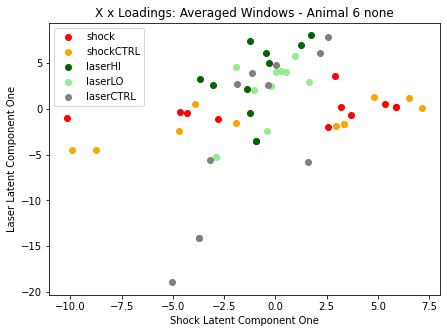

Pearson Correlation: x axis vs y axis - Shocks: r =  0.98
Pearson Correlation: x axis vs y axis - Lasers: r =   0.98
Wilcoxon Signed-rank: Shock vs ShockCTRL on Laser Axis: p =  0.43
Wilcoxon Signed-rank: LaserHI vs LaserCTRL on Shock Axis: p =  0.02


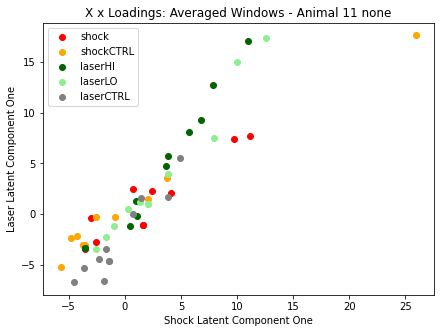

Pearson Correlation: x axis vs y axis - Shocks: r =  -0.90
Pearson Correlation: x axis vs y axis - Lasers: r =   -0.83
Wilcoxon Signed-rank: Shock vs ShockCTRL on Laser Axis: p =  1.00
Wilcoxon Signed-rank: LaserHI vs LaserCTRL on Shock Axis: p =  0.49


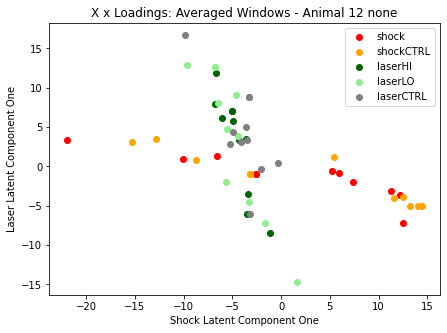

Pearson Correlation: x axis vs y axis - Shocks: r =  0.27
Pearson Correlation: x axis vs y axis - Lasers: r =   0.34
Wilcoxon Signed-rank: Shock vs ShockCTRL on Laser Axis: p =  0.13
Wilcoxon Signed-rank: LaserHI vs LaserCTRL on Shock Axis: p =  0.28


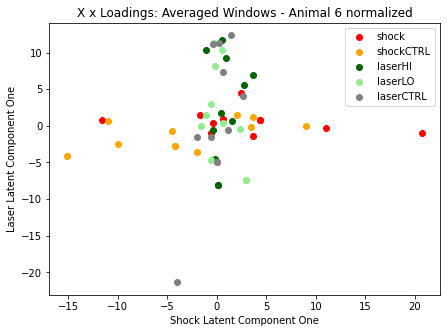

Pearson Correlation: x axis vs y axis - Shocks: r =  0.97
Pearson Correlation: x axis vs y axis - Lasers: r =   0.95
Wilcoxon Signed-rank: Shock vs ShockCTRL on Laser Axis: p =  0.11
Wilcoxon Signed-rank: LaserHI vs LaserCTRL on Shock Axis: p =  0.01


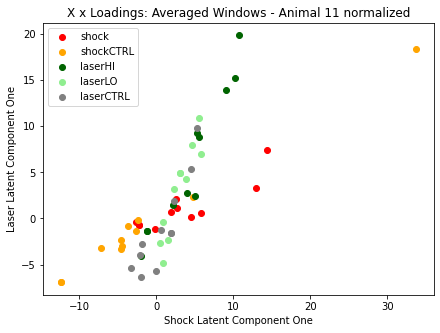

Pearson Correlation: x axis vs y axis - Shocks: r =  -0.31
Pearson Correlation: x axis vs y axis - Lasers: r =   -0.53
Wilcoxon Signed-rank: Shock vs ShockCTRL on Laser Axis: p =  0.16
Wilcoxon Signed-rank: LaserHI vs LaserCTRL on Shock Axis: p =  0.49


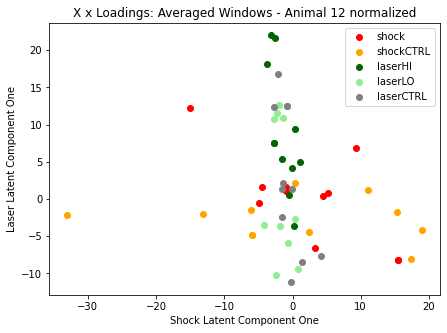

In [18]:
# Cross Modalities - averaged windows
# Testing 
from scipy import stats
comp = 3 # number of components to keep

for typee in ["none","normalized"]: # "normalized"
    for animall in [6,11,12]:#11,12
    
        # here start stop are exactly the windows where it's averaged
        _,LX_window_shock = PLSR_testing_crossmodalities("shock", animall, typee, comp, 38, 49)
        _,LX_window_laser = PLSR_testing_crossmodalities("laserHI", animall, typee, comp, 26, 37)
        
        #Flipping signs of loadings when necessary
        if(LX_window_laser[20:30,0].mean() < 0):
            LX_window_laser = LX_window_laser * -1
        if(LX_window_shock[0:10,0].mean() < 0):
            LX_window_shock = LX_window_shock * -1
        
        plt.figure(figsize = (7,5))
            
        r,_ = pearsonr(LX_window_laser[0:20,0],LX_window_shock[0:20,0])
        print("Pearson Correlation: x axis vs y axis - Shocks: r = ", "{:.2f}".format(r))
        
        r,_ = pearsonr(LX_window_laser[20:50,0],LX_window_shock[20:50,0])
        print("Pearson Correlation: x axis vs y axis - Lasers: r =  ", "{:.2f}".format(r))
        
        #The paired t–test assumes that the differences between pairs are normally distributed???
        #_,p = stats.shapiro(LX_window_laser[0:10,0])
        #print("Shapiro Normality Test Shock on Laser Axis: p = ", "{:.2f}".format(p))
        #_,p = stats.shapiro(LX_window_laser[10:20,0])
        #print("Shapiro Normality Test ShockCTRL on Laser Axis: p = ", "{:.2f}".format(p))
        _,p = stats.wilcoxon(LX_window_laser[0:10,0], LX_window_laser[10:20,0])
        print("Wilcoxon Signed-rank: Shock vs ShockCTRL on Laser Axis: p = ", "{:.2f}".format(p))
        
        #_,p = stats.shapiro(LX_window_shock[20:30,0])
        #print("Shapiro Normality Test LaserHI on Shock Axis: p = ", "{:.2f}".format(p))
        #_,p = stats.shapiro(LX_window_shock[30:40,0])
        #print("Shapiro Normality Test LaserLO on Shock Axis: p = ", "{:.2f}".format(p))
        #_,p = stats.shapiro(LX_window_shock[40:50,0])
        #print("Shapiro Normality Test LaserCTRL on Shock Axis: p = ", "{:.2f}".format(p))
        _,p = stats.wilcoxon(LX_window_shock[20:30,0], LX_window_shock[40:50,0])
        print("Wilcoxon Signed-rank: LaserHI vs LaserCTRL on Shock Axis: p = ", "{:.2f}".format(p))
            
        for trial in range(0,50):
            plt.scatter(LX_window_shock[trial,0],LX_window_laser[trial,0], color = colors.get(order_trials[int(trial/10)]))
            if(trial % 10 == 0):
                plt.scatter(LX_window_shock[trial,0],LX_window_laser[trial,0], label = order_trials[int(trial/10)], color = colors.get(order_trials[int(trial/10)]))
        
        plt.legend()     
        plt.xlabel("Shock Latent Component One")
        plt.ylabel("Laser Latent Component One")
        plt.title("X x Loadings: Averaged Windows - Animal " + str(animall) + " " + str(typee))
        plt.show()
       